# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Filza Rahma Muflihah
- Email: filzarahmamuflihah@gmail.com
- Id Dicoding: filzrahma

## Persiapan

Pada bagian ini, akan dilakukan persiapan yang diperlukan untuk menganalisis dan membangun model prediksi attrition karyawan. Persiapan meliputi penyiapan library yang akan digunakan serta penyiapan dataset yang akan dianalisis.

### Menyiapkan library yang dibutuhkan

Tahap pertama adalah menyiapkan library-library yang akan digunakan dalam analisis dan pemodelan. Beberapa kategori library yang akan digunakan antara lain:

1. **Library manipulasi dan analisis data**: pandas dan numpy untuk pengolahan dan manipulasi data
2. **Library visualisasi**: matplotlib dan seaborn untuk membuat visualisasi data
3. **Library untuk penanganan imbalance data**: SMOTE (Synthetic Minority Over-sampling Technique) untuk mengatasi ketidakseimbangan kelas
4. **Library preprocessing**: LabelEncoder untuk mengubah data kategorikal menjadi numerik, StandardScaler untuk normalisasi data
5. **Library machine learning**: untuk membagi data, membangun pipeline, dan membuat model klasifikasi

In [730]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
sns.set_theme()
sns.set_palette('Set2')
%matplotlib inline

Penjelasan library yang digunakan:

- **pandas (pd)** dan **numpy (np)**: Library inti untuk manipulasi data tabular dan operasi numerik.
- **matplotlib.pyplot (plt)** dan **seaborn (sns)**: Library untuk visualisasi data yang akan membantu dalam eksplorasi dan presentasi hasil analisis.
- **SMOTE**: Teknik untuk mengatasi ketidakseimbangan kelas dengan membuat sampel sintetis dari kelas minoritas.
- **LabelEncoder**: Untuk mengubah data kategorikal (seperti 'Ya'/'Tidak') menjadi format numerik yang dapat diproses oleh algoritma ML.
- **MinMaxScaler**: Untuk menstandarisasi fitur numerik agar memiliki rentang 0 hingga 1.
- **train_test_split**: Untuk membagi dataset menjadi data latih dan data uji.
- **Pipeline** dan **ImbPipeline**: Untuk membuat alur kerja preprocessing dan modeling yang terstruktur.
- **ExtraTreesClassifier** dan **BalancedRandomForestClassifier**: Algoritma ensemble learning untuk klasifikasi.
- **metrics**: Berbagai metrik evaluasi untuk mengukur performa model klasifikasi.
- **warnings.filterwarnings('ignore')**: Untuk menyembunyikan peringatan yang tidak perlu agar output notebook lebih rapi.

Setting visualisasi dengan `sns.set_theme()` dan `sns.set_palette('Set2')` digunakan agar grafik yang dihasilkan memiliki tampilan yang konsisten dan menarik.

### Menyiapkan data yang akan digunakan

Pada tahap ini, kita akan memuat dataset karyawan yang akan digunakan untuk analisis dan pemodelan. Dataset ini berisi berbagai informasi tentang karyawan termasuk status attrition mereka.

Dataset yang digunakan adalah data karyawan yang diambil dari repositori Dicoding. Data ini berisi informasi terkait karyawan seperti usia, departemen, gaji, dan berbagai faktor lain yang mungkin mempengaruhi attrition (pengunduran diri) karyawan.

Langkah pertama yang akan dilakukan adalah memuat dataset dan melihat dimensi dataset untuk memahami ukurannya.

In [734]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv"
)
print(f'Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom')

Dataset memiliki 1470 baris dan 35 kolom


Dataset berhasil dimuat dengan `pd.read_csv()` langsung dari URL sumber. Dari output di atas, dapat dilihat bahwa dataset memiliki 1470 baris (record karyawan) dan 35 kolom (variabel/fitur).

Selanjutnya, mari kita melihat beberapa baris pertama dari dataset untuk memahami struktur dan konten data.

In [736]:
# Melihat 5 baris pertama dari dataset
df.head(5)

EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
0           1   38        NaN  Travel_Frequently       1444   
1           2   37        1.0      Travel_Rarely       1141   
2           3   51        1.0      Travel_Rarely       1323   
3           4   42        0.0  Travel_Frequently        555   
4           5   40        NaN      Travel_Rarely       1194   

               Department  DistanceFromHome  Education EducationField  \
0         Human Resources                 1          4          Other   
1  Research & Development                11          2        Medical   
2  Research & Development                 4          4  Life Sciences   
3                   Sales                26          3      Marketing   
4  Research & Development                 2          4        Medical   

   EmployeeCount  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
0              1                        4    Male          88               3   
1              1                        1  Female          61               1   
2              1                        1    Male          34               3   
3              1                        3  Female          77               3   
4              1                        3  Female          98               3   

   JobLevel                    JobRole  JobSatisfaction MaritalStatus  \
0         1            Human Resources                2       Married   
1         2  Healthcare Representative                2       Married   
2         1         Research Scientist                3       Married   
3         4            Sales Executive                2       Married   
4         1         Research Scientist                3       Married   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  \
0           2991         5224                   0      Y      Yes   
1           4777        14382                   5      Y       No   
2           2461        10332                   9      Y      Yes   
3          13525        14864                   5      Y       No   
4           2001        12549                   2      Y       No   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         2   
1                 15                  3                         1   
2                 12                  3                         3   
3                 14                  3                         4   
4                 14                  3                         2   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             80                 1                  7                      2   
1             80                 0                 15                      2   
2             80                 3                 18                      2   
3             80                 1                 23                      2   
4             80                 3                 20                      2   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                3               6                   2   
1                1               1                   0   
2                4              10                   0   
3                4              20                   4   
4                3               5                   3   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        1                     2  
1                        0                     0  
2                        2                     7  
3                        4                     8  
4                        0                     2

Dari tampilan 5 baris pertama dataset, kita dapat melihat berbagai informasi karyawan seperti:

1. **EmployeeId**: ID unik untuk setiap karyawan
2. **Attrition**: Apakah karyawan meninggalkan perusahaan (1) atau tidak (0)
3. **Age**: Usia karyawan
4. **BusinessTravel**: Frekuensi perjalanan bisnis yang dilakukan karyawan
5. Dan berbagai informasi lain seperti departemen, jarak dari rumah, tingkat pendidikan, dll.

Kolom **Attrition** adalah target yang akan kita prediksi, sedangkan kolom-kolom lain akan menjadi fitur yang digunakan untuk memprediksi attrition.

Pada tahap berikutnya (Data Understanding), kita akan mengeksplorasi data ini lebih mendalam untuk memahami pola, distribusi, dan hubungan antar variabel.

## Data Understanding

Pada tahap Data Understanding, kita akan melakukan analisis mendalam terhadap dataset untuk memahami karakteristik data karyawan yang akan digunakan dalam pemodelan prediksi attrition. Tahap ini sangat penting karena pemahaman yang baik tentang data akan mengarahkan proses analisis dan pemodelan yang lebih efektif.

Tujuan dari tahap Data Understanding meliputi:
1. Memahami struktur dataset dan tipe data setiap kolom
2. Mengidentifikasi potensi masalah kualitas data (missing values, outliers, dll)
3. Memahami distribusi nilai dalam variabel kategorikal
4. Menganalisis statistik deskriptif untuk mendapatkan wawasan awal

Kita akan melakukan langkah-langkah ini secara sistematis untuk mendapatkan pemahaman menyeluruh tentang dataset karyawan.

### Analisis Struktur Data

Langkah pertama dalam memahami data adalah memeriksa struktur dataset, termasuk jumlah baris dan kolom, tipe data untuk setiap kolom, dan mengidentifikasi nilai yang hilang (missing values). Fungsi `info()` pada DataFrame pandas akan memberikan gambaran umum tentang dataset.

In [740]:
# Informasi tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [741]:
categorical_columns = df.columns[df.dtypes == 'object']

for column in categorical_columns:
    print(f"Unique values in column {column}:")
    print(df[column].unique())
    print()

Unique values in column BusinessTravel:
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']

Unique values in column Department:
['Human Resources' 'Research & Development' 'Sales']

Unique values in column EducationField:
['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources']

Unique values in column Gender:
['Male' 'Female']

Unique values in column JobRole:
['Human Resources' 'Healthcare Representative' 'Research Scientist'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Sales Representative']

Unique values in column MaritalStatus:
['Married' 'Single' 'Divorced']

Unique values in column Over18:
['Y']

Unique values in column OverTime:
['Yes' 'No']



**Deskripsi Dataset Karyawan**

Dataset ini berisi informasi mengenai 1470 karyawan dengan 35 kolom yang mencakup berbagai aspek informasi karyawan. Berikut penjelasan setiap kolom yang dikelompokkan berdasarkan kategorinya:

**Data Identifikasi**
- **EmployeeId**: Nomor identifikasi unik untuk setiap karyawan (numerik)
- **Attrition**: Status karyawan meninggalkan perusahaan atau tidak (0=tidak, 1=ya) - **Ini adalah variabel target** 

**Data Demografis**
- **Age**: Usia karyawan dalam tahun (numerik)
- **Gender**: Jenis kelamin karyawan (kategorikal: Female/Male)
- **MaritalStatus**: Status pernikahan karyawan (kategorikal: Single/Married/Divorced)
- **Over18**: Apakah karyawan berusia di atas 18 tahun? (kategorikal: Y/N)
- **DistanceFromHome**: Jarak tempat tinggal karyawan dari kantor dalam kilometer (numerik)

**Pendidikan dan Pengalaman**
- **Education**: Level pendidikan karyawan (ordinal: 1-5)
  - 1: Di bawah kuliah (under college)
  - 2: Kuliah (college)
  - 3: Sarjana (bachelor)
  - 4: Master (master)
  - 5: Doktor (doctor)
- **EducationField**: Bidang studi karyawan (kategorikal: Life Sciences, Medical, Marketing, dll)
- **NumCompaniesWorked**: Jumlah perusahaan tempat karyawan pernah bekerja sebelumnya (numerik)
- **TotalWorkingYears**: Total pengalaman kerja karyawan dalam tahun (numerik)
- **TrainingTimesLastYear**: Jumlah pelatihan yang diikuti karyawan tahun lalu (numerik)

**Informasi Pekerjaan**
- **Department**: Departemen tempat karyawan bekerja (kategorikal: HR, R&D, Sales)
- **EmployeeCount**: Jumlah karyawan (selalu bernilai 1 - konstanta)
- **JobLevel**: Level jabatan karyawan dari 1-5 (ordinal)
- **JobRole**: Peran/posisi karyawan di perusahaan (kategorikal)
- **BusinessTravel**: Frekuensi perjalanan bisnis (kategorikal: Non-Travel/Travel_Rarely/Travel_Frequently)
- **StandardHours**: Jam kerja standar (konstanta = 80 jam)
- **OverTime**: Apakah karyawan melakukan lembur? (kategorikal: Yes/No)

**Kompensasi dan Benefit**
- **DailyRate**: Tarif gaji harian (numerik)
- **HourlyRate**: Tarif gaji per jam (numerik)
- **MonthlyIncome**: Pendapatan bulanan karyawan (numerik)
- **MonthlyRate**: Tarif bulanan (numerik)
- **PercentSalaryHike**: Persentase kenaikan gaji terakhir (numerik)
- **StockOptionLevel**: Level kepemilikan saham perusahaan (ordinal: 0-3)

**Pengalaman di Perusahaan Saat Ini**
- **YearsAtCompany**: Lama bekerja di perusahaan saat ini (numerik)
- **YearsInCurrentRole**: Lama bekerja di posisi saat ini (numerik)
- **YearsSinceLastPromotion**: Waktu yang telah berlalu sejak promosi terakhir (numerik)
- **YearsWithCurrManager**: Lama bekerja dengan manajer saat ini (numerik)

**Indeks Kepuasan dan Kinerja**
- **JobSatisfaction**: Tingkat kepuasan terhadap pekerjaan (ordinal: 1-4)
  - 1: Rendah (Low)
  - 2: Menengah (Medium)
  - 3: Tinggi (High)
  - 4: Sangat tinggi (Very High)
- **EnvironmentSatisfaction**: Tingkat kepuasan terhadap lingkungan kerja (ordinal: 1-4, skala sama)
- **JobInvolvement**: Tingkat keterlibatan dalam pekerjaan (ordinal: 1-4, skala sama)
- **WorkLifeBalance**: Keseimbangan antara pekerjaan dan kehidupan pribadi (ordinal: 1-4)
  - 1: Buruk
  - 2: Baik
  - 3: Sangat baik
  - 4: Luar biasa
- **RelationshipSatisfaction**: Tingkat kepuasan dalam relasi di tempat kerja (ordinal: 1-4, skala sama)
- **PerformanceRating**: Penilaian kinerja karyawan (ordinal: 1-4)
  - 1: Rendah (Low)
  - 2: Baik (Good)
  - 3: Sangat Baik (Excellent)
  - 4: Luar Biasa (Outstanding)

Dataset ini akan kita gunakan untuk memprediksi attrition (pengunduran diri) karyawan berdasarkan berbagai faktor di atas.

Dapat kita catat ada kolom kategorikal yang memiliki nilai unik satu, yaitu kolom Over18 yang berisi nilai 'Y' saja. Hal ini tidak begitu berpengaruh pada klasifikasi karena datanya tidak beragam sehingga akan kita hapus pada preprocessing.

In [744]:
# Memeriksa data duplikat
print("Banyaknya data duplikat: ", df.duplicated().sum())

Banyaknya data duplikat:  0


Dataset tidak memiliki data yang duplikat, sehingga tidak perlu melakukan penanganan untuk data duplikat.

In [746]:
# Memeriksa nilai yang hilang
print("Jumlah nilai yang hilang dalam setiap kolom:")
print(df.isnull().sum())

Jumlah nilai yang hilang dalam setiap kolom:
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear      

In [747]:
df['Attrition'].isna().sum()/len(df)

0.2802721088435374

Dataset memiliki missing value sebanyak 412 pada kolom Attrition. Karena banyaknya missing value < 50%, preprocessing yang akan dilakukan adalah menghapus baris yang mengandung missing value. Hal ini dilakukan dengan pertimbangan data yang memiliki missing value dapat dikatakan sedikit sehingga inferensi tidak akan signifikan mempengaruhi data sebenarnya. Penggantian nilai dengan modus juga karena fitur yang mengandung missing value adalah fitur kategorik.

### Exploratory Data Analysis

#### Analisis Deskriptif

In [751]:
# Statistik deskriptif dataset
pd.set_option('display.max_columns', None)
df.describe(include='all')

EmployeeId          Age    Attrition BusinessTravel    DailyRate  \
count   1470.000000  1470.000000  1058.000000           1470  1470.000000   
unique          NaN          NaN          NaN              3          NaN   
top             NaN          NaN          NaN  Travel_Rarely          NaN   
freq            NaN          NaN          NaN           1043          NaN   
mean     735.500000    36.923810     0.169187            NaN   802.485714   
std      424.496761     9.135373     0.375094            NaN   403.509100   
min        1.000000    18.000000     0.000000            NaN   102.000000   
25%      368.250000    30.000000     0.000000            NaN   465.000000   
50%      735.500000    36.000000     0.000000            NaN   802.000000   
75%     1102.750000    43.000000     0.000000            NaN  1157.000000   
max     1470.000000    60.000000     1.000000            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Development               NaN          NaN  Life Sciences   
freq                       961               NaN          NaN            606   
mean                       NaN          9.192517     2.912925            NaN   
std                        NaN          8.106864     1.024165            NaN   
min                        NaN          1.000000     1.000000            NaN   
25%                        NaN          2.000000     2.000000            NaN   
50%                        NaN          7.000000     3.000000            NaN   
75%                        NaN         14.000000     4.000000            NaN   
max                        NaN         29.000000     5.000000            NaN   

        EmployeeCount  EnvironmentSatisfaction Gender   HourlyRate  \
count          1470.0              1470.000000   1470  1470.000000   
unique            NaN                      NaN      2          NaN   
top               NaN                      NaN   Male          NaN   
freq              NaN                      NaN    882          NaN   
mean              1.0                 2.721769    NaN    65.891156   
std               0.0                 1.093082    NaN    20.329428   
min               1.0                 1.000000    NaN    30.000000   
25%               1.0                 2.000000    NaN    48.000000   
50%               1.0                 3.000000    NaN    66.000000   
75%               1.0                 4.000000    NaN    83.750000   
max               1.0                 4.000000    NaN   100.000000   

        JobInvolvement     JobLevel          JobRole  JobSatisfaction  \
count      1470.000000  1470.000000             1470      1470.000000   
unique             NaN          NaN                9              NaN   
top                NaN          NaN  Sales Executive              NaN   
freq               NaN          NaN              326              NaN   
mean          2.729932     2.063946              NaN         2.728571   
std           0.711561     1.106940              NaN         1.102846   
min           1.000000     1.000000              NaN         1.000000   
25%           2.000000     1.000000              NaN         2.000000   
50%           3.000000     2.000000              NaN         3.000000   
75%           3.000000     3.000000              NaN         4.000000   
max           4.000000     5.000000              NaN         4.000000   

       MaritalStatus  MonthlyIncome   MonthlyRate  NumCompaniesWorked Over18  \
count           1470    1470.000000   1470.000000         1470.000000   1470   
unique             3            NaN           NaN                 NaN      1   
top          Married            NaN           NaN                 NaN      Y   
freq             673            NaN           NaN                 NaN   1470   
mean 


Berdasarkan statistik deskriptif yang ditampilkan, terdapat beberapa informasi penting yang dapat diambil:
1. **EmployeeId**
    - ID karyawan terdiri dari 1470 data unik dengan rata-rata 735,5.
    - ID karyawan bervariasi dari 1 hingga 1470.
2. **Age**
    - Usia karyawan bekisar antara 18 hingga 60 tahun dengan rata-rata 36,92 tahun.
    - Sebagian besar karyawan berada pada rentang usia 30 hingga 43 tahun (kuartil ke-1 hingga ke-3).
3. **Attrition**
    - Status pengurangan karyawan beragam antara 0 dan 1.
    - Kolom ini merupakan variabel target.
4. **BusinessTravel**
    - Travel bisnis beragam antara sering, jarang, dan tidak.
    - Mayoritas karyawan jarang bepergian untuk bisnis.
5. **DailyRate**
    - Upah harian karyawan bervariasi antara 102 hingga 1499, dengan rata-rata 802,49 dolar.
    - Sebagian besar karyawan memiliki upah harian antara 465 hingga 1157 dolar.
6. **Department**
    - Perusahaan memiliki 3 departemen, yaitu Human Resources, Research & Development, dan Sales.
    - Sebagian besar karyawan berada pada Departemen Research & Development.
7. **DistanceFromHome**
    - Jarak kantor dari rumah karyawan berkisar antara 1 hingga 29 kilometer, dengan rata-rata 9.19 kilometer.
    - Sebagian besar karyawan memiliki rumah yang berjarak dari kantor pada rentang 2 hingga 14 kilometer.
8. **Education**
    - Tingkat pendidikan karyawan beragam antara 1 hingga 5, dengan rata-rata 2,91.
    - Sebagian besar karyawan memiliki tingkat pendidikan antara 2 (kuliah) hingga 4 (master/S2).
9. **EducationField**
    - Karyawan perusahaan berasal dari 6 jurusan pendidikan, yaitu Medical, Life Sciences, Marketing, Technical Degree, Human Resources, dan lainnya.
    - Sebagian besar karyawan berasal dari jurusan pendidikan Life Sciences.
10. **EmployeeCount**
    - Jumlah karyawan tidak beragam, hanya bernilai 1.
11.	**EnvironmentSatisfaction**
    - Tingkat kepuasan karyawan terhadap lingkungan perusahaan beragam antara 1 hingga 4, dengan rata-rata 2,72.
    - Sebagian besar karyawan memiliki tingkat kepuasan terhadap lingkungan perusahaan pada rentang 2 hingga 4.
12. **Gender**
    - Jenis kelamin karyawan beragam antara perempuan dan laki-laki.
    - Sebagian besar karyawan adalah laki-laki.
13.	**HourlyRate**
    - Upah per jam karyawan bervariasi antara 30 hingga 100, dengan rata-rata 65,89.
    - Sebagian besar karyawan memiliki upah per jam pada rentang 48 dan 83,75.
14. **JobInvolvement**
    - Tingkat keterlibatan kerja karyawan bervariasi antara 1 hingga 4, dengan rata-rata 2,72.
    - Sebagian besar karyawan memiliki tingkat keterlibatan kerja pada rentang 2 dan 3.
15. **JobLevel**
    - Level kerja karyawan bervariasi antara 1 hingga 5, dengan rata-rata 2,06.
    - Sebagian besar karyawan memiliki level kerja pada rentang 1 dan 3.
16. **JobRole**
    - Terdapat 9 peran kerja pada perusahaan, yaitu Human Resources, Healthcare Representative, Research Scientist, Sales Executive, Manager, Laboratory Technician, Research Director, Manufacturing Director, dan Sales Representative.
    - Sebagian besar karyawan memiliki peran kerja pada Sales Executive.
17. **JobSatisfaction**
    - Tingkat kepuasan kerja karyawan bervariasi antara 1 hingga 4, dengan rata-rata 2,73.
    - Sebagian besar karyawan memiliki tingkat kepuasan kerja pada rentang 2 dan 4.
18.	**MaritalStatus**
    - Terdapat 3 status pernikahan pada perusahaan, yaitu Single, Married, dan Divorced.
    - Sebagian besar karyawan memiliki status pernikahan Married.
19.	**MonthlyIncome**
    - Pendapatan karyawan bervariasi antara 1009 hingga 19999, dengan rata-rata 6502,93.
    - Sebagian besar karyawan memiliki pendapatan pada rentang 2911 dan 8379.
20.	**MonthlyRate**
    - Gaji per bulan karyawan bervariasi antara 2094 hingga 26.999, dengan rata-rata 14.313,10.
    - Sebagian besar karyawan memiliki gaji per bulan pada rentang 8.047 dan 20.461,5.
21.	**NumCompaniesWorked**
    - Banyak perusahaan karyawan bekerja sebelumnya bervariasi antara 0 hingga 9, dengan rata-rata 2,69.
    - Sebagian besar karyawan memiliki banyaknya riwayat perusahaan pada rentang 1 dan 4.
22.	**Over18**
    - Status karyawan memiliki usia lebih dari 18 tidak bervariasi dan memiliki nilai 'Y' yang artinya seluruh karyawan memiliki usia di atas 18 tahun.
23.	**OverTime**
    - Status lembur karyawan terdiri dari 2 nilai, Yes dan No. 
    - Sebagian besar karyawan memiliki status lembur No yang artinya tidak lembur.
24.	**PercentSalaryHike**
    - Persentase kenaikan gaji karyawan bervariasi antara 11% hingga 25%, dengan rata-rata 15,21%.
    - Sebagian besar karyawan memiliki persentase pada rentang 12% dan 18%.
25.	**PerformanceRating**
    - Rating performa karyawan bervariasi antara 3 hingga 4, dengan rata-rata 3,15.
    - Sebagian besar karyawan memiliki rating performa pada nilai 3.
26.	**RelationshipSatisfaction**
    - Tingkat kepuasan relasi karyawan bervariasi antara 1 hingga 4, dengan rata-rata 2,71.
    - Sebagian besar karyawan memiliki tingkat kepuasan relasi pada rentang 2 dan 4.
27.	**StandardHours**
    - Standar jam kerja karyawan tidak bervariasi dan bernilai 80 jam.
28.	**StockOptionLevel**
    - Tingkat opsi saham karyawan bervariasi antara 0 hingga 3, dengan rata-rata 0,79.
    - Sebagian besar karyawan memiliki tingkat opsi saham pada rentang 0 dan 1.
29.	**TotalWorkingYears**
    - Total tahun bekerja karyawan bervariasi antara 0 hingga 40, dengan rata-rata 11,28.
    - Sebagian besar karyawan memiliki total tahun bekerja pada rentang 6 dan 15.
30.	**TrainingTimesLastYear**
    - Jumlah pelatihan yang diikuti oleh karyawan pada tahun lalu bervariasi antara 0 hingga 6, dengan rata-rata 2,79.
    - Sebagian besar karyawan memiliki jumlah pelatihan pada rentang 2 dan 3.
31.	**WorkLifeBalance**
    - Tingkat keseimbangan kehidupan kerja karyawan bervariasi antara 1 hingga 4, dengan rata-rata 2,76.
    - Sebagian besar karyawan memiliki tingkat keseimbangan kehidupan kerja pada rentang 2 dan 3.
32.	**YearsAtCompany**
    - Tahun karyawan pada perusahaan bervariasi antara 0 hingga 40, dengan rata-rata 7,0.
    - Sebagian besar karyawan memiliki tahun bekerja di perusahaan pada rentang 3 dan 9.
33.	**YearsInCurrentRole**
    - Tahun karyawan pada peran saat ini bervariasi antara 0 hingga 18, dengan rata-rata 4,23.
    - Sebagian besar karyawan memiliki tahun peran saat ini pada rentang 2 dan 7.
34.	**YearsSinceLastPromotion**
    - Tahun karyawan sejak promosi terakhir bervariasi antara 0 hingga 15, dengan rata-rata 2,18.
    - Sebagian besar karyawan memiliki tahun sejak promosi terakhir pada rentang 0 dan 3.
35.	**YearsWithCurrManager**
    - Tahun karyawan bersama manajer saat ini bervariasi antara 0 hingga 17, dengan rata-rata 4,12.
    - Sebagian besar karyawan memiliki tahun bersama manajer saat ini pada rentang 2 dan 7.

#### Analisis Univariat

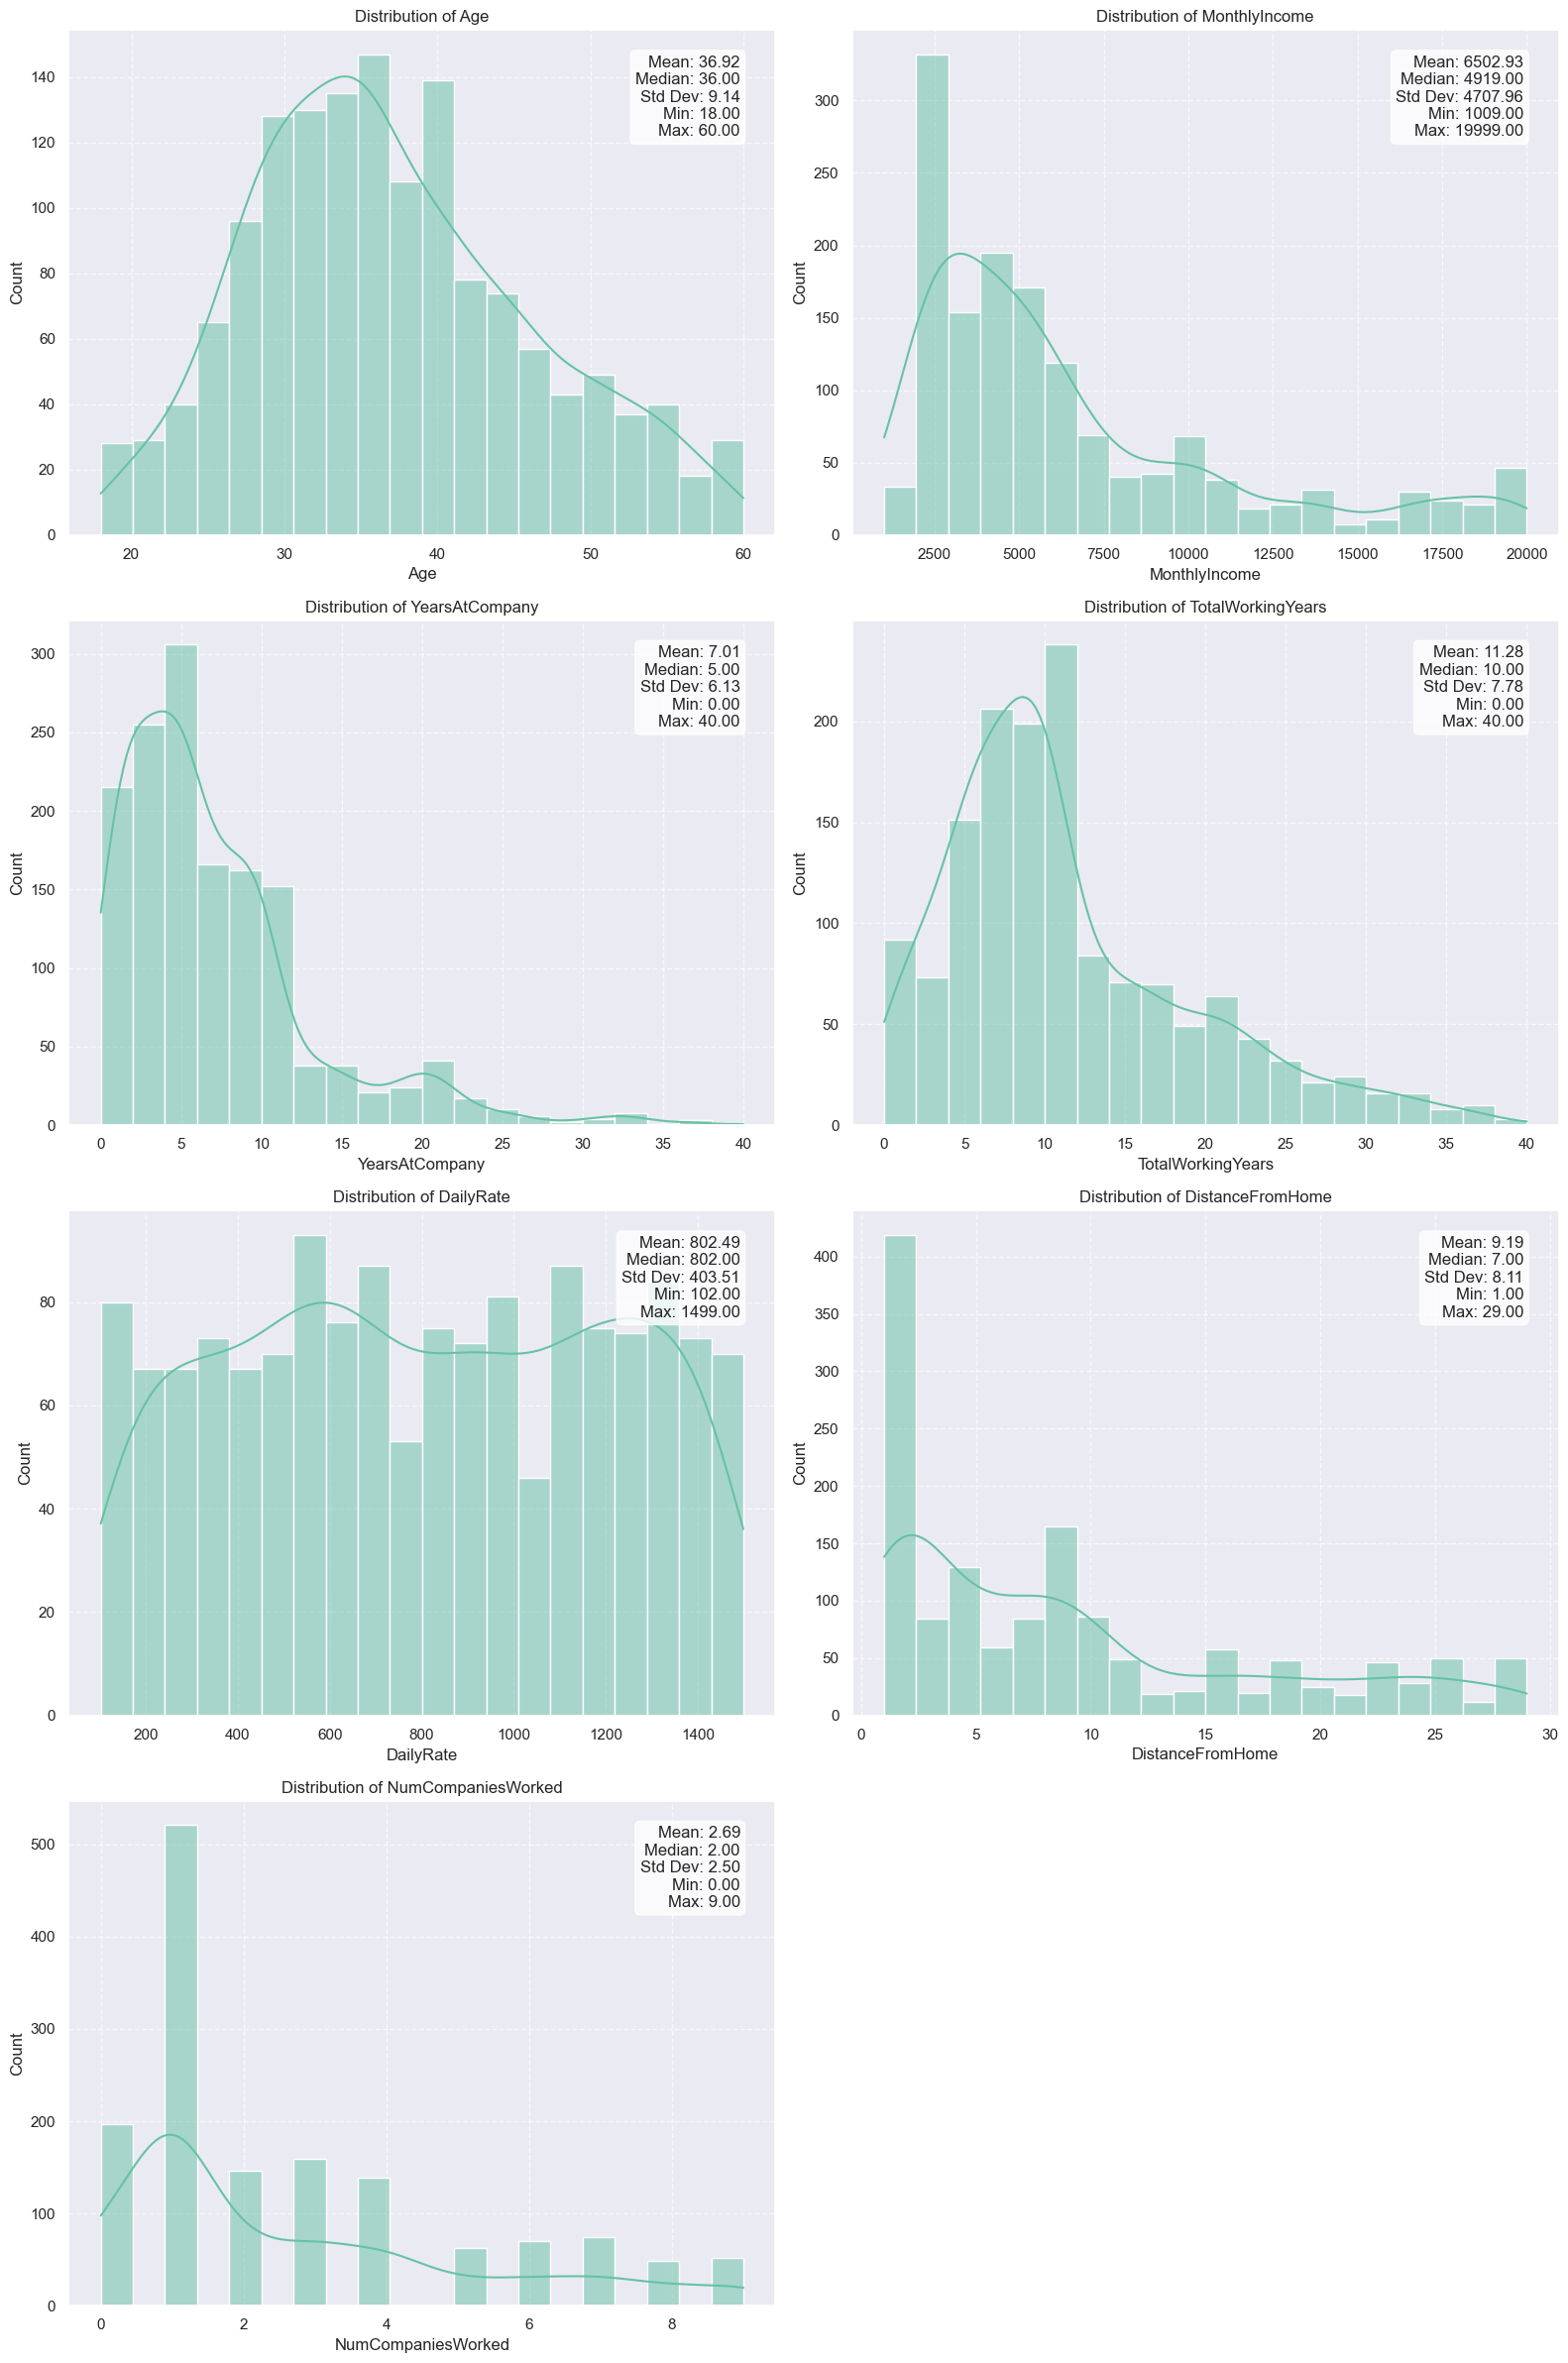

In [754]:
# Numerical Variables Distribution Analysis

# Select important numerical variables to visualize
num_vars_to_plot = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears',
                    'DailyRate', 'DistanceFromHome', 'NumCompaniesWorked']

# Create a figure with subplots for histograms
num_vars_available = [var for var in num_vars_to_plot if var in df.columns]
n_vars = len(num_vars_available)
n_rows = (n_vars + 1) // 2  # Calculate how many rows we need for 2 columns

fig, axes = plt.subplots(n_rows, 2, figsize=(16, n_rows * 6))
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, var in enumerate(num_vars_available):
    # Create histogram with KDE
    sns.histplot(df[var], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Distribution of {var}')
    axes[i].grid(True, linestyle='--', alpha=0.7)
    
    # Add summary statistics as text box
    stats_text = (f"Mean: {df[var].mean():.2f}\n"
                 f"Median: {df[var].median():.2f}\n"
                 f"Std Dev: {df[var].std():.2f}\n"
                 f"Min: {df[var].min():.2f}\n"
                 f"Max: {df[var].max():.2f}")
    axes[i].text(0.95, 0.95, stats_text, transform=axes[i].transAxes,
                 verticalalignment='top', horizontalalignment='right',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**Key Insight**:
1. Usia (Age): Mayoritas karyawan berusia antara 30 hingga 40 tahun, menandakan perusahaan didominasi oleh tenaga kerja usia produktif menengah.
2. Pendapatan Bulanan (MonthlyIncome): Sebagian besar karyawan berpenghasilan di bawah rata-rata, dengan distribusi pendapatan yang sangat timpang karena segelintir karyawan berpenghasilan sangat tinggi.
3. Lama Bekerja di Perusahaan (YearsAtCompany): Banyak karyawan masih relatif baru di perusahaan ini (kurang dari 10 tahun), yang bisa mengindikasikan tingginya mobilitas atau perekrutan baru.
4. Total Tahun Pengalaman Kerja (TotalWorkingYears): Karyawan umumnya memiliki pengalaman kerja sekitar 10 tahun, mencerminkan tenaga kerja dengan pengalaman kerja menengah.
5. Tarif Harian (DailyRate): Tarif harian karyawan tersebar merata tanpa pola dominan, menunjukkan sistem kompensasi yang bervariasi namun tidak ekstrem.
6. Jarak dari Rumah ke Kantor (DistanceFromHome): Mayoritas karyawan tinggal cukup dekat dengan kantor, tetapi terdapat kelompok kecil yang harus menempuh jarak jauh untuk bekerja.
7. Jumlah Perusahaan yang Pernah Dikerjakan (NumCompaniesWorked): Karyawan umumnya pernah bekerja di 1–3 perusahaan sebelumnya, menunjukkan pengalaman yang cukup namun belum terlalu banyak berpindah kerja.

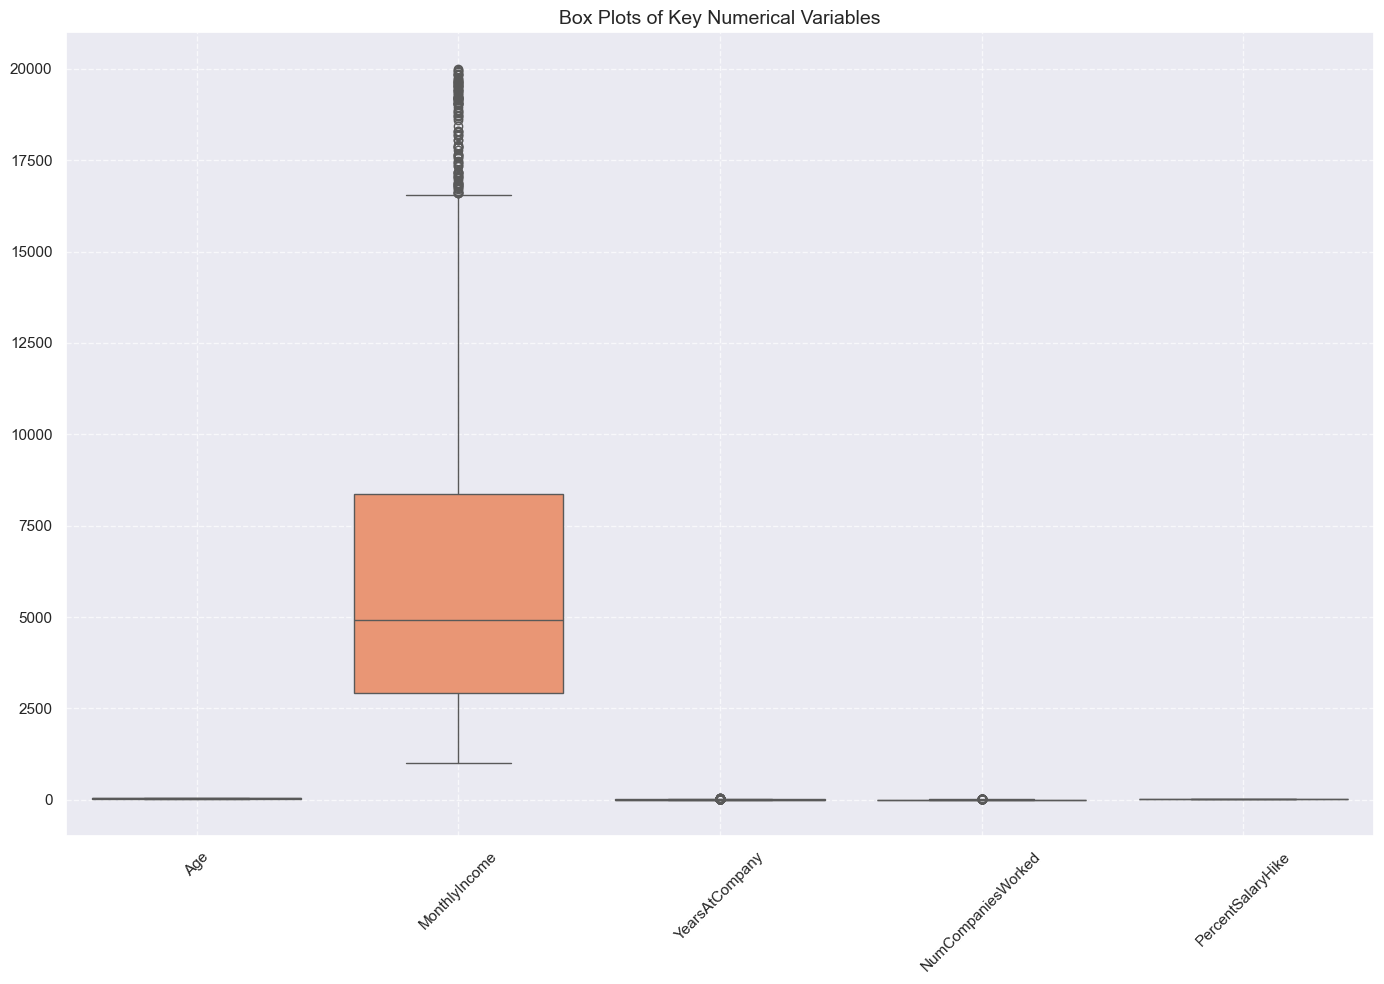

In [756]:
# 2.2 Box plots for numerical variables
plt.figure(figsize=(14, 10))
# Select a subset of important numerical variables to avoid overcrowding
box_vars = [var for var in ['Age', 'MonthlyIncome', 'YearsAtCompany', 'NumCompaniesWorked', 'PercentSalaryHike'] if var in df.columns]
sns.boxplot(data=df[box_vars])
plt.title('Box Plots of Key Numerical Variables', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Key insight:**
- MonthlyIncome adalah satu-satunya variabel dengan outlier yang sangat signifikan, menunjukkan adanya gap penghasilan yang besar.
- Variabel lainnya cenderung stabil, dengan sedikit outlier atau distribusi yang relatif simetris.

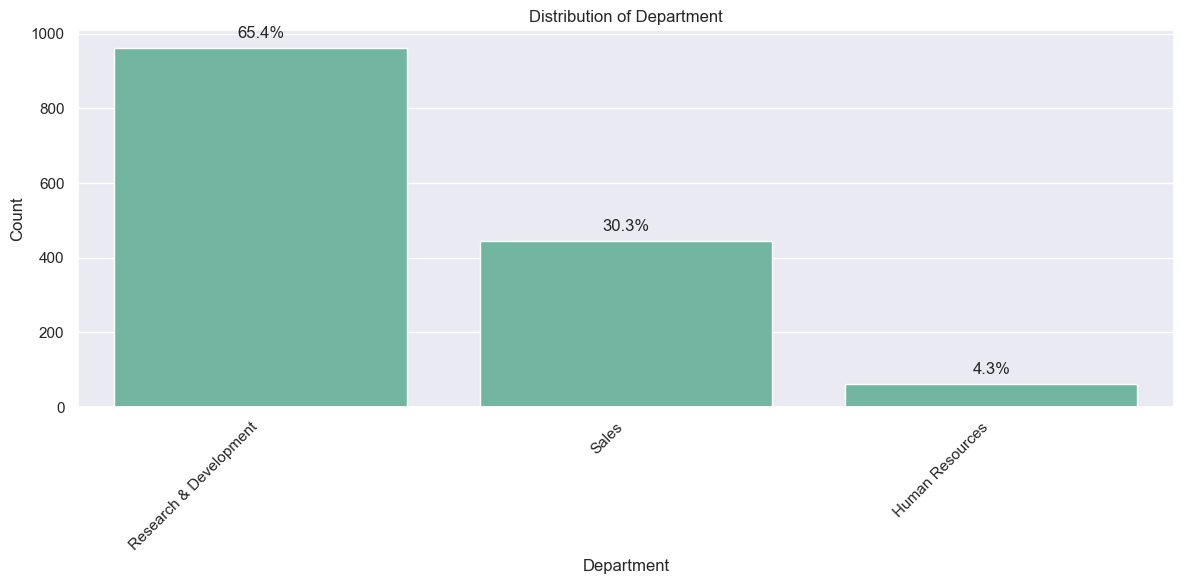

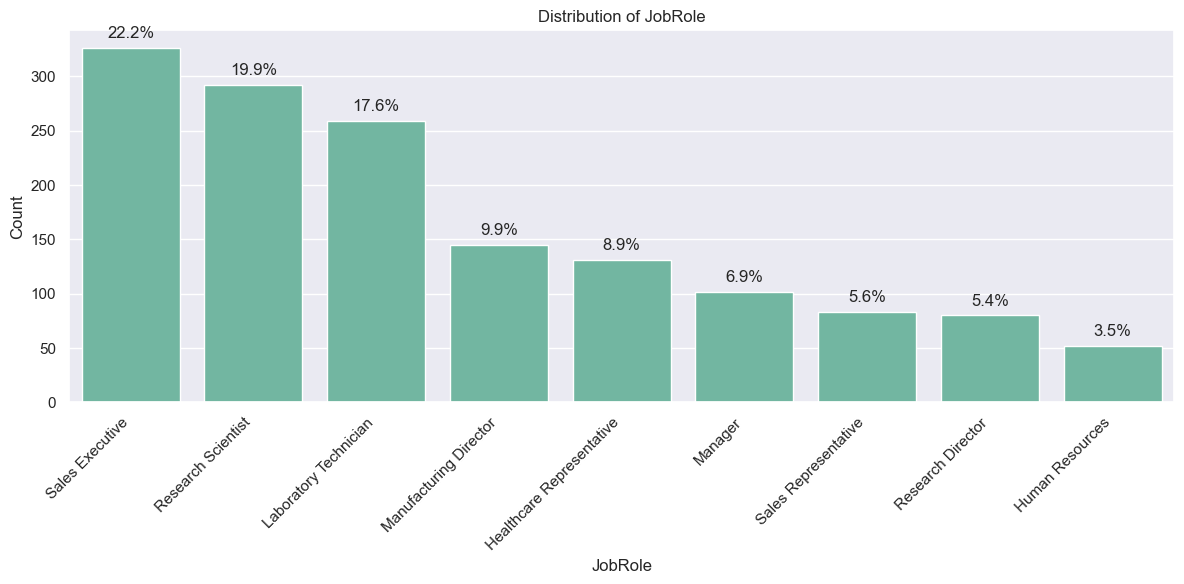

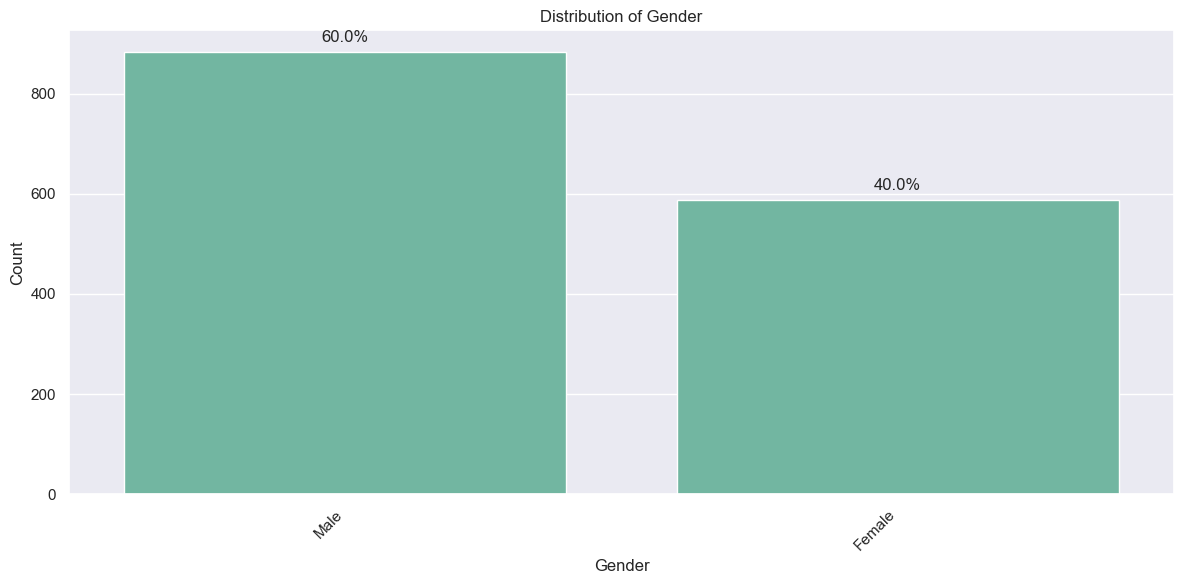

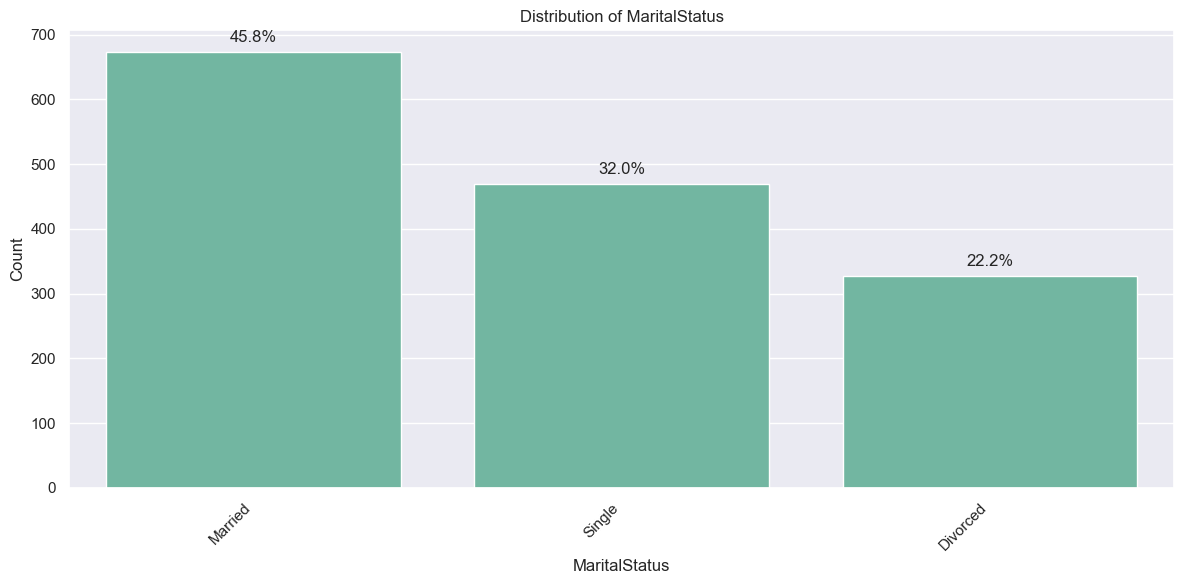

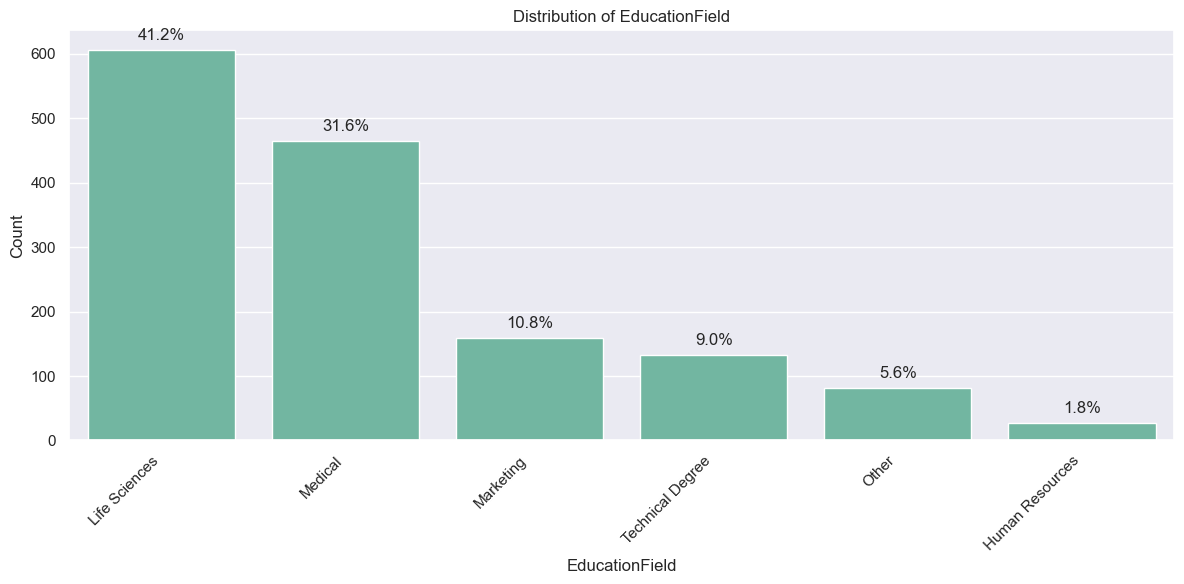

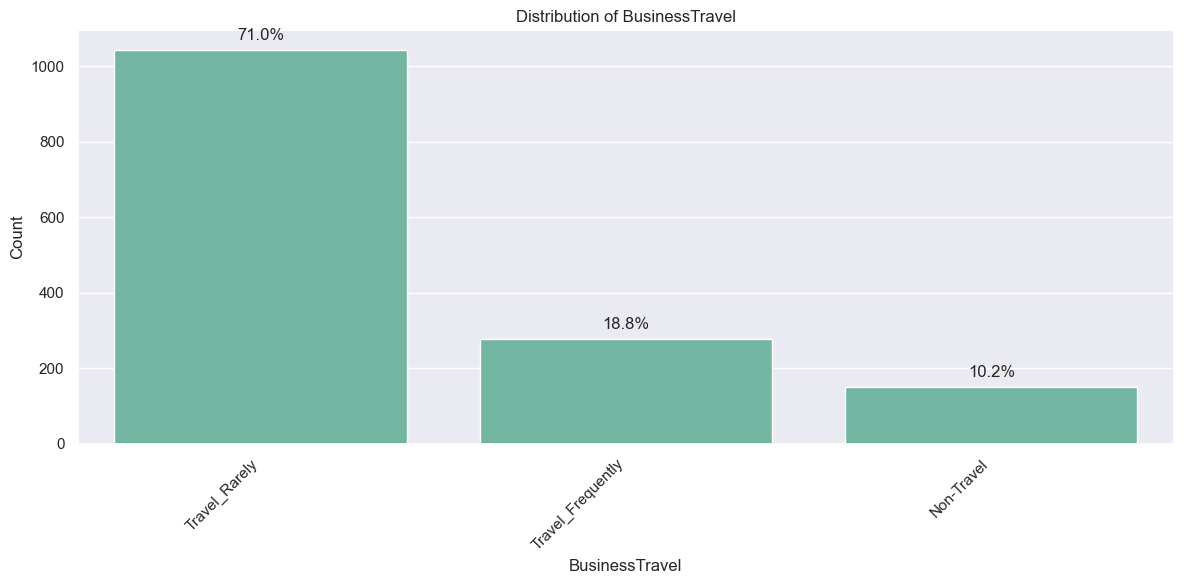

In [758]:
# 2.3 Categorical Variables Analysis

# Select important categorical variables
cat_vars_to_plot = ['Department', 'JobRole', 'Gender', 'MaritalStatus', 'EducationField', 'BusinessTravel']
cat_vars_available = [var for var in cat_vars_to_plot if var in df.columns]

for var in cat_vars_available:
    plt.figure(figsize=(12, 6))
    counts = df[var].value_counts().sort_values(ascending=False)
    
    # Create bar chart
    ax = sns.barplot(x=counts.index, y=counts.values)
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Add percentage labels on bars
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total*100:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha = 'center', va = 'bottom', xytext = (0, 5),
                    textcoords = 'offset points')
    
    plt.tight_layout()
    plt.show()

**Key insight:**
- 65,4% karyawan bekerja di Research & Development, sedangkan departemen dengan persentase karyawan terkecil adalah Human Resources sebesar 4,3%. Hal ini menunjukkan fokus besar perusahaan pada inovasi dan pengembangan produk dengan R&D sebagai pilar utama.
- Tiga posisi terbanyak: Sales Executive (22.2%), Research Scientist (19.9%), dan Laboratory Technician (17.6%). Sementara peran manajerial, direktur, dan HR jauh lebih sedikit. Mayoritas karyawan berada di posisi operasional atau spesialis teknis, bukan manajerial.
- 60% laki-laki, 40% perempuan. Adanya kesenjangan gender yang cukup besar, terutama jika dibandingkan dengan harapan kesetaraan gender di tempat kerja modern.
- 45.8% karyawan sudah menikah, 32.0% lajang, dan 22.2% bercerai. Sebagian besar karyawan adalah individu yang sudah berkeluarga, yang dapat mempengaruhi kebutuhan fleksibilitas kerja atau tunjangan keluarga.
- Mayoritas berasal dari bidang Life Sciences (41.2%) dan Medical (31.6%), sedangkan bidang seperti Marketing dan HR sangat kecil proporsinya. Latar belakang pendidikan karyawan mendukung kebutuhan teknis dan ilmiah perusahaan, konsisten dengan dominasi R&D.
- 71% karyawan hanya melakukan perjalanan bisnis jarang (Travel_Rarely). Hanya 18.8% yang sering bepergian, dan 10.2% tidak pernah bepergian. Mobilitas karyawan umumnya rendah, kemungkinan karena sifat pekerjaan yang berbasis kantor.

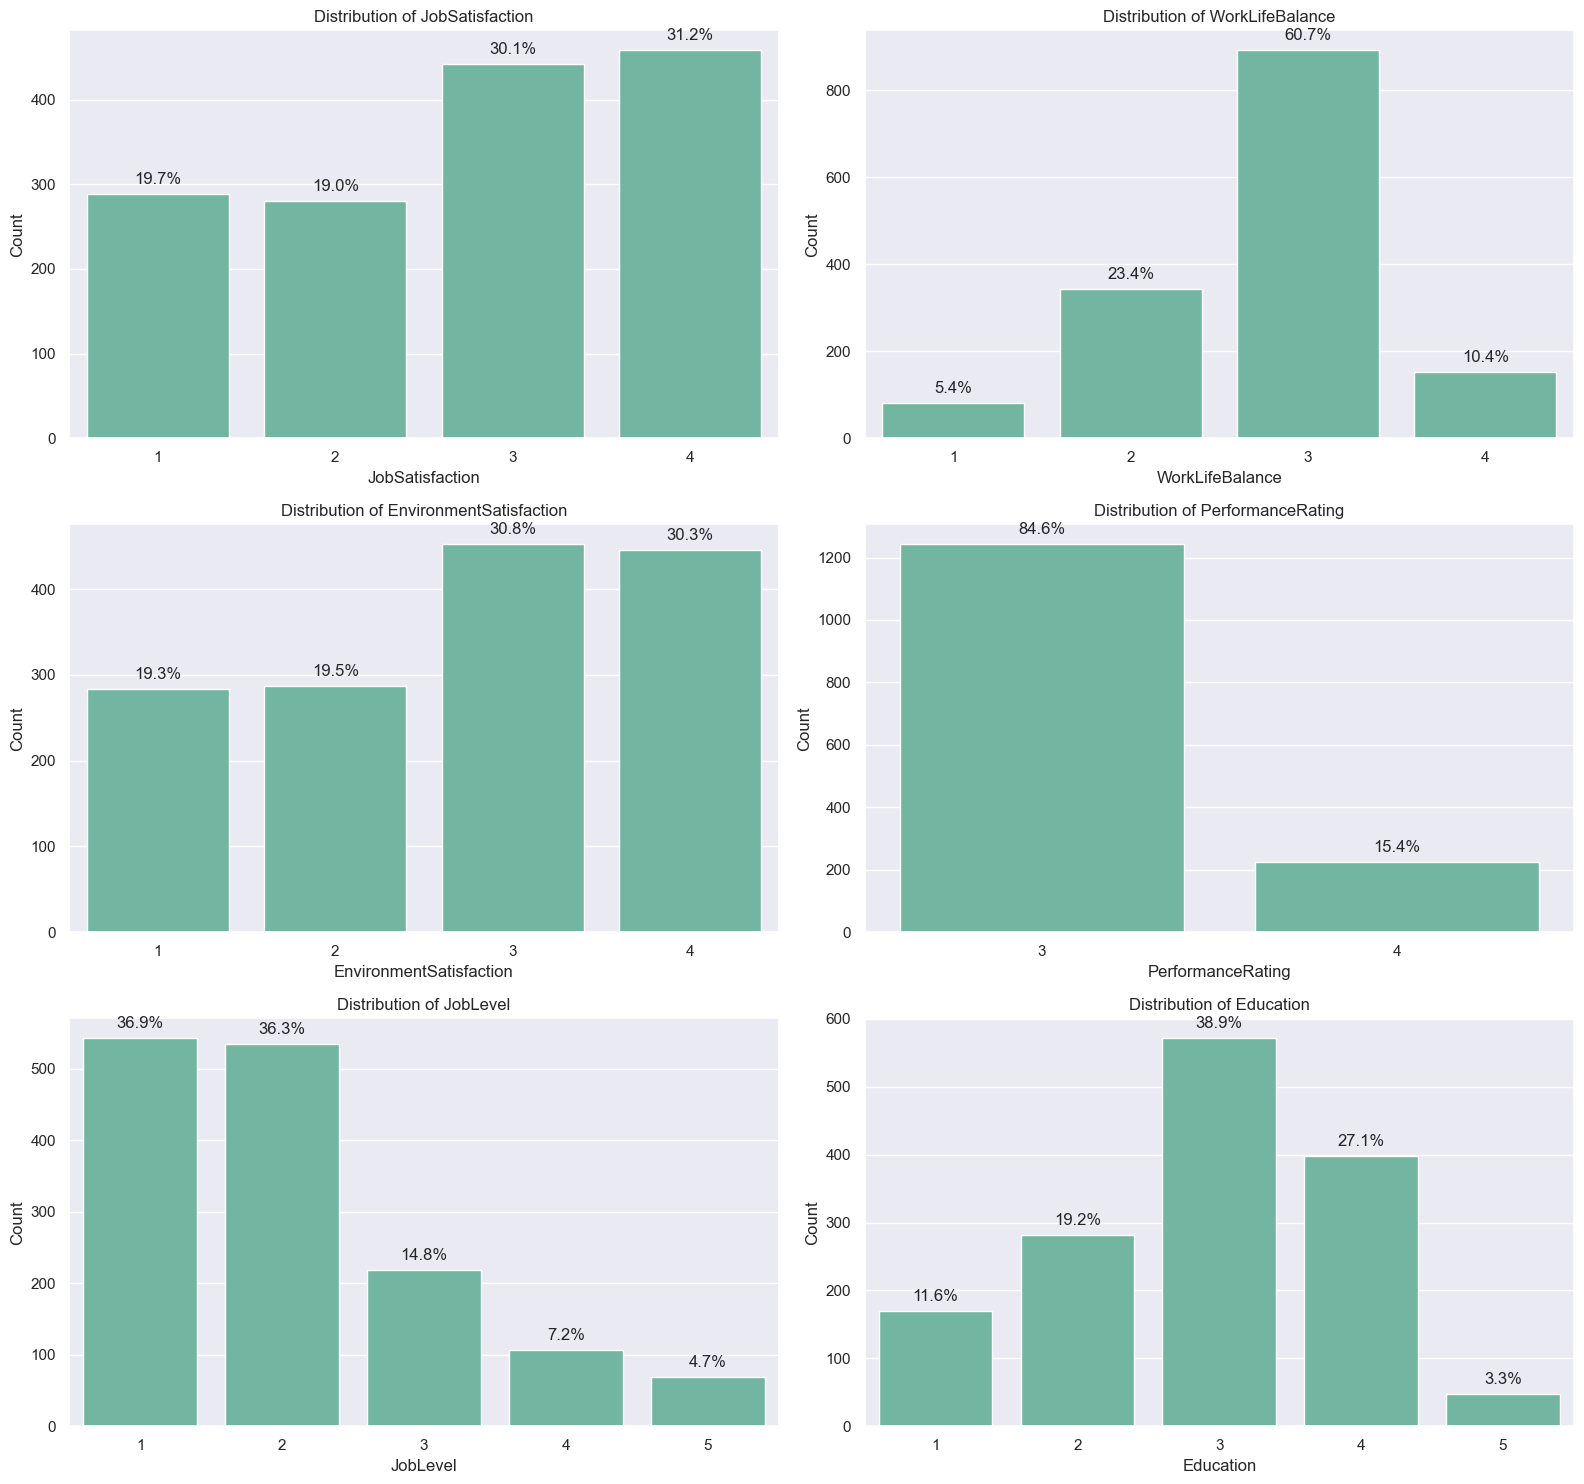

In [760]:
# 2.4 Ordinal Variables Analysis

# Select important ordinal variables
ordinal_vars = ['JobSatisfaction', 'WorkLifeBalance', 'EnvironmentSatisfaction', 'PerformanceRating', 'JobLevel', 'Education']
ordinal_vars_available = [var for var in ordinal_vars if var in df.columns]

n_ord_vars = len(ordinal_vars_available)
n_rows = (n_ord_vars + 1) // 2  # Calculate rows needed for 2 columns

fig, axes = plt.subplots(n_rows, 2, figsize=(16, n_rows * 5))
axes = axes.flatten() if n_rows > 1 else [axes]

for i, var in enumerate(ordinal_vars_available):
    idx = min(i, len(axes) - 1)  # Ensure we don't go out of bounds
    counts = df[var].value_counts().sort_index()
    sns.barplot(x=counts.index, y=counts.values, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {var}')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Count')
    
    # Add percentage labels
    total = len(df)
    for p in axes[idx].patches:
        height = p.get_height()
        axes[idx].annotate(f'{height/total*100:.1f}%',
                       (p.get_x() + p.get_width() / 2., height),
                       ha = 'center', va = 'bottom', xytext = (0, 5),
                       textcoords = 'offset points')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**Key insight:**
- Mayoritas karyawan merasa cukup puas (skor 3: 30.1%, skor 4: 31.2%). Tingkat kepuasan kerja relatif baik, meski masih ada bagian signifikan karyawan yang tidak puas.
- Sebagian besar karyawan (60.7%) memberikan skor 3, menandakan work-life balance yang cukup baik. Hanya 5.4% yang sangat tidak puas (skor 1). Perusahaan cenderung berhasil menyediakan keseimbangan kerja-hidup yang layak bagi karyawan.
- Lebih dari 60% karyawan merasa puas (skor 3 dan 4). Ketidakpuasan juga ada tapi cukup merata pada skor 1 dan 2 (masing-masing sekitar 19%). Lingkungan kerja dinilai positif oleh mayoritas karyawan, meski masih perlu perhatian terhadap kelompok yang tidak puas.
- Hampir seluruh karyawan (84.6%) memiliki skor performa 3, dan sisanya (15.4%) diberi skor 4. Penilaian performa cenderung seragam dan mungkin terlalu moderat, berisiko menciptakan kesan penilaian tidak objektif atau kurang diferensiasi.
- Mayoritas karyawan berada di level 1 dan 2 (lebih dari 73%). Struktur organisasi didominasi oleh karyawan entry-level dan junior, mencerminkan piramida organisasi yang khas.
- 38.9% memiliki tingkat pendidikan 3, dan 27.1% tingkat 4. Sangat sedikit (3.3%) yang mencapai level pendidikan tertinggi (skor 5). Karyawan umumnya memiliki pendidikan kuliah hingga master, namun tidak terlalu banyak yang memiliki latar pendidikan paling tinggi.

#### Bivariate Analysis

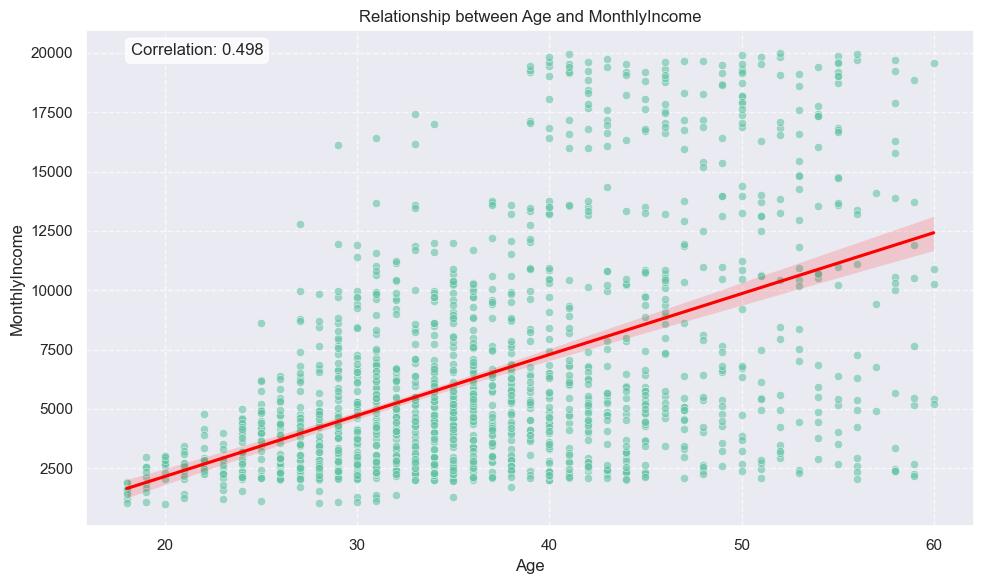

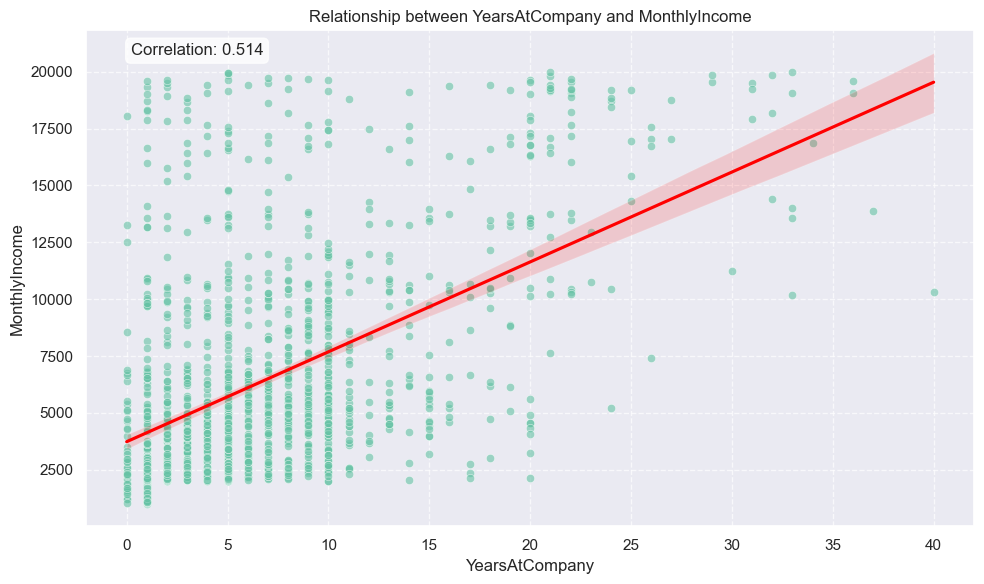

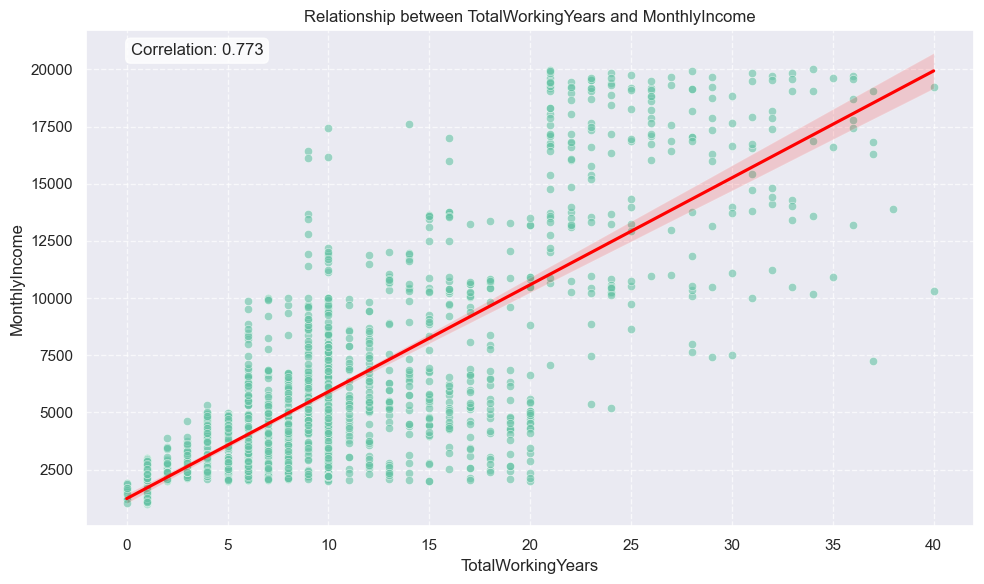

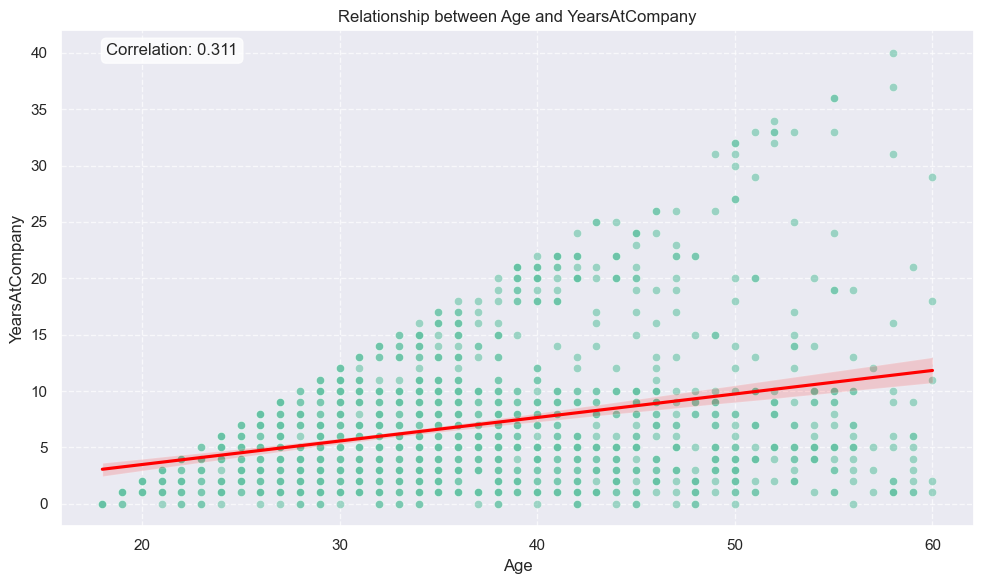

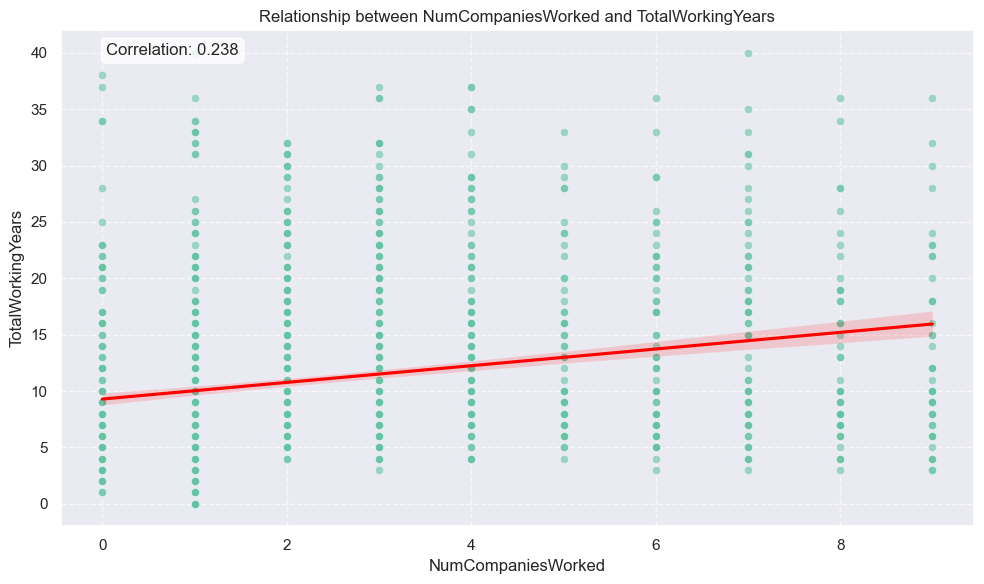

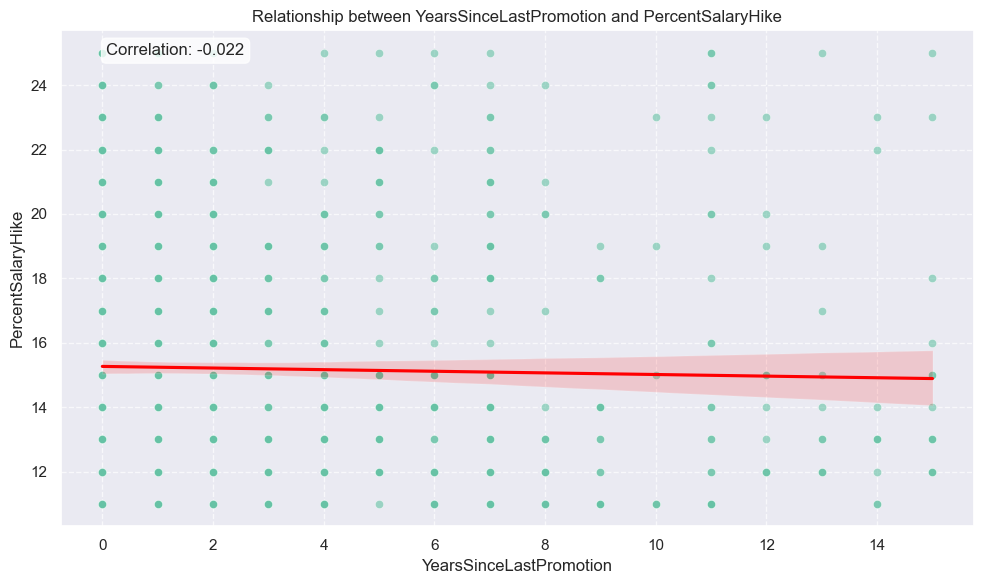

In [763]:
# 3.1 Numerical vs Numerical Analysis

# Select pairs of numerical variables to analyze
num_pairs = [('Age', 'MonthlyIncome'), 
             ('YearsAtCompany', 'MonthlyIncome'),
             ('TotalWorkingYears', 'MonthlyIncome'),
             ('Age', 'YearsAtCompany'),
             ('NumCompaniesWorked', 'TotalWorkingYears'),
             ('YearsSinceLastPromotion', 'PercentSalaryHike')]

# Create scatter plots for each pair
for pair in num_pairs:
    if pair[0] in df.columns and pair[1] in df.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=pair[0], y=pair[1], data=df, alpha=0.6)
        plt.title(f'Relationship between {pair[0]} and {pair[1]}')
        plt.grid(True, linestyle='--', alpha=0.7)
        
        # Add regression line
        sns.regplot(x=pair[0], y=pair[1], data=df, scatter=False, color='red')
        
        # Calculate and display correlation coefficient
        corr = df[list(pair)].corr().iloc[0, 1]
        plt.annotate(f'Correlation: {corr:.3f}',
                    xy=(0.05, 0.95), xycoords='axes fraction',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        plt.tight_layout()
        plt.show()

**Key Insight:**
- Terdapat hubungan positif sedang antara usia dan pendapatan. Semakin tua karyawan, cenderung semakin tinggi penghasilannya, namun banyak variasi di tiap kelompok usia.
- Hubungan positif sedang antara tahun pada perusahaan dengan penghasilan bulanan. Karyawan dengan masa kerja lebih lama cenderung memiliki pendapatan lebih tinggi.
- Total tahun bekerja dan penghasilan bulanan memiliki korelasi yang kuat. Hal ini menunjukkan bahwa total pengalaman kerja sangat berkorelasi dengan pendapatan bulanan.
- Terdapat korelasi lemah hingga sedang antara usia dengan tahun bekerja pada perusahaan. Usia lebih tua cenderung punya masa kerja lebih lama, tapi tidak selalu (banyak orang tua yang baru bergabung).
- Korelasi lemah antara banyaknya riwayat perusahaan dan total waktu bekerja. Jumlah perusahaan yang pernah dikerjakan tidak terlalu berkaitan erat dengan lama total bekerja.
- Lama waktu sejak promosi terakhir tidak berkaitan dengan besaran kenaikan gaji.

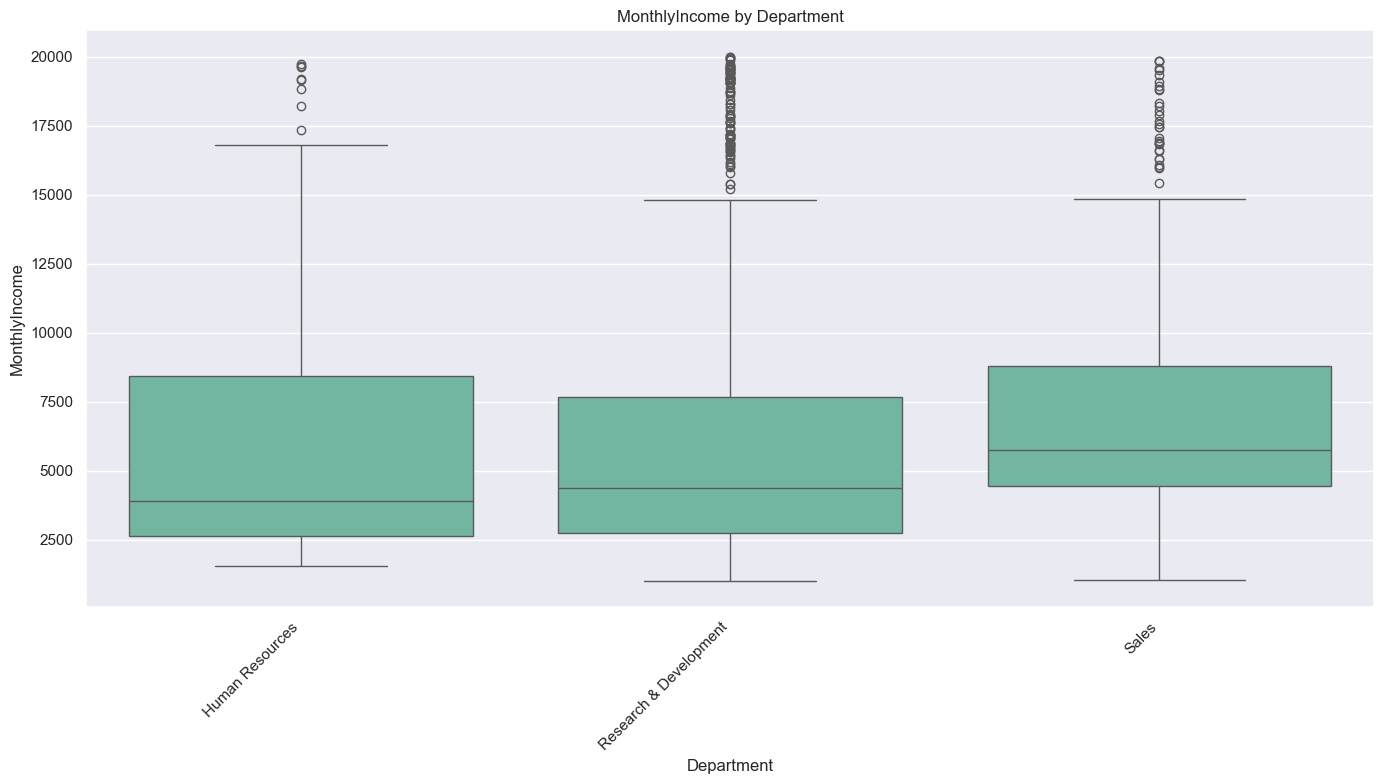


Summary statistics of MonthlyIncome grouped by Department:


count         mean          std     min      25%  \
Department                                                                 
Human Resources          63.0  6654.507937  5788.732921  1555.0  2644.00   
Research & Development  961.0  6281.252862  4895.835087  1009.0  2741.00   
Sales                   446.0  6959.172646  4058.739322  1052.0  4446.25   

                           50%      75%      max  
Department                                        
Human Resources         3886.0  8412.50  19717.0  
Research & Development  4374.0  7655.00  19999.0  
Sales                   5754.5  8776.75  19847.0

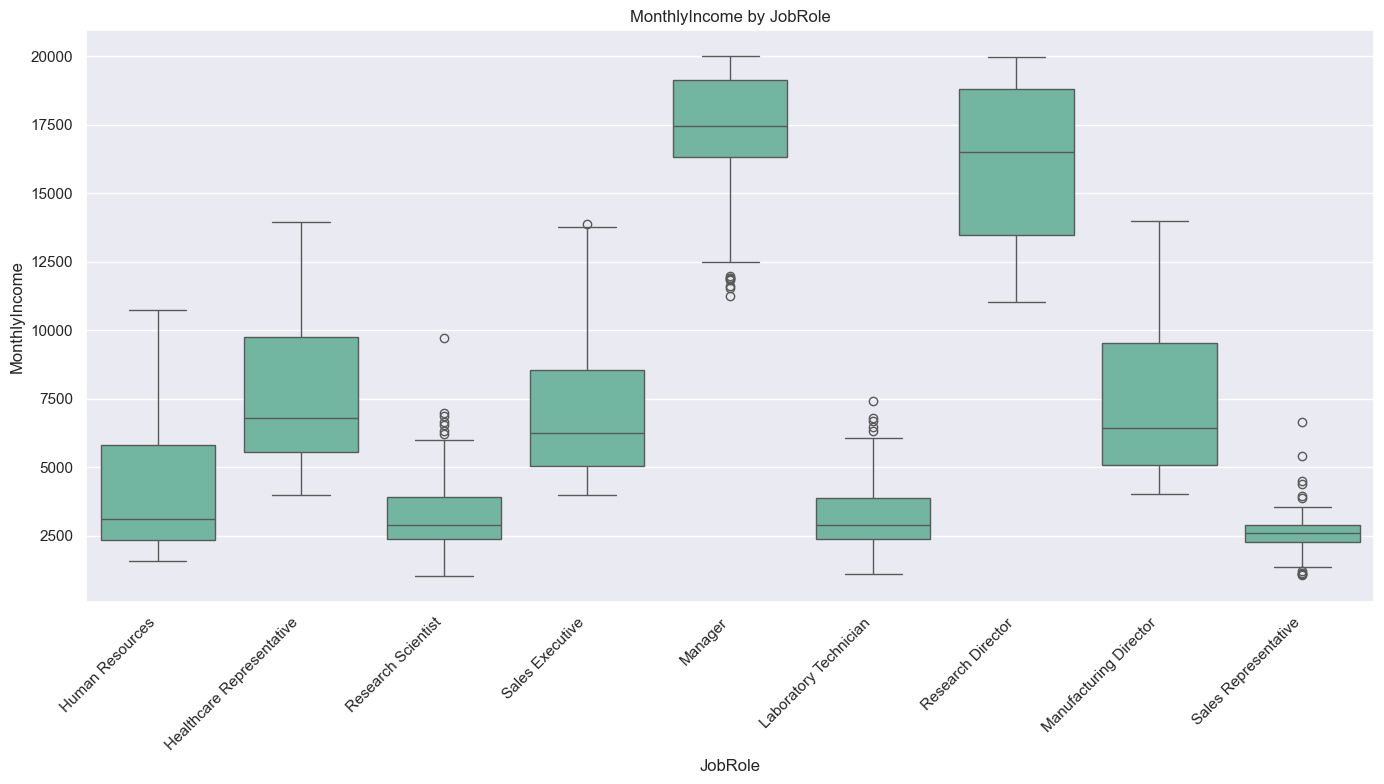


Summary statistics of MonthlyIncome grouped by JobRole:


count          mean          std      min  \
JobRole                                                                
Healthcare Representative  131.0   7528.763359  2542.550170   4000.0   
Human Resources             52.0   4235.750000  2438.849744   1555.0   
Laboratory Technician      259.0   3237.169884  1150.249802   1102.0   
Manager                    102.0  17181.676471  2317.199822  11244.0   
Manufacturing Director     145.0   7295.137931  2676.745753   4011.0   
Research Director           80.0  16033.550000  2827.621369  11031.0   
Research Scientist         292.0   3239.972603  1198.116113   1009.0   
Sales Executive            326.0   6924.279141  2366.943019   4001.0   
Sales Representative        83.0   2626.000000   854.534419   1052.0   

                                25%      50%       75%      max  
JobRole                                                          
Healthcare Representative   5562.00   6811.0   9769.50  13966.0  
Human Resources             2340.25   3093.0   5803.50  10725.0  
Laboratory Technician       2379.50   2886.0   3880.50   7403.0  
Manager                    16339.50  17454.5  19129.25  19999.0  
Manufacturing Director      5070.00   6447.0   9526.00  13973.0  
Research Director          13490.25  16510.0  18814.50  19973.0  
Research Scientist          2386.00   2887.5   3902.50   9724.0  
Sales Executive             5025.25   6231.0   8538.75  13872.0  
Sales Representative        2250.00   2579.0   2878.50   6632.0

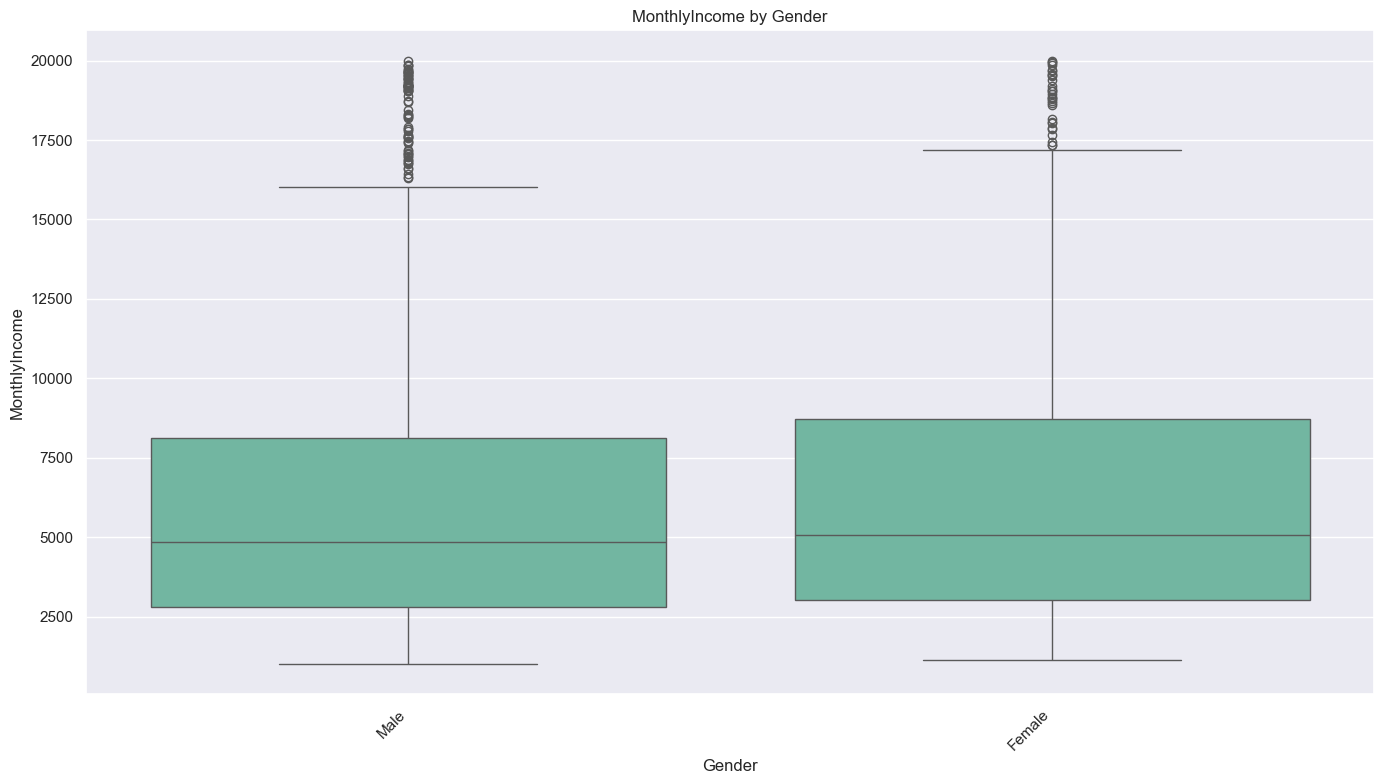


Summary statistics of MonthlyIncome grouped by Gender:


count         mean          std     min     25%     50%      75%  \
Gender                                                                     
Female  588.0  6686.566327  4695.608507  1129.0  3037.0  5081.5  8711.75   
Male    882.0  6380.507937  4714.856577  1009.0  2819.5  4837.5  8113.75   

            max  
Gender           
Female  19973.0  
Male    19999.0

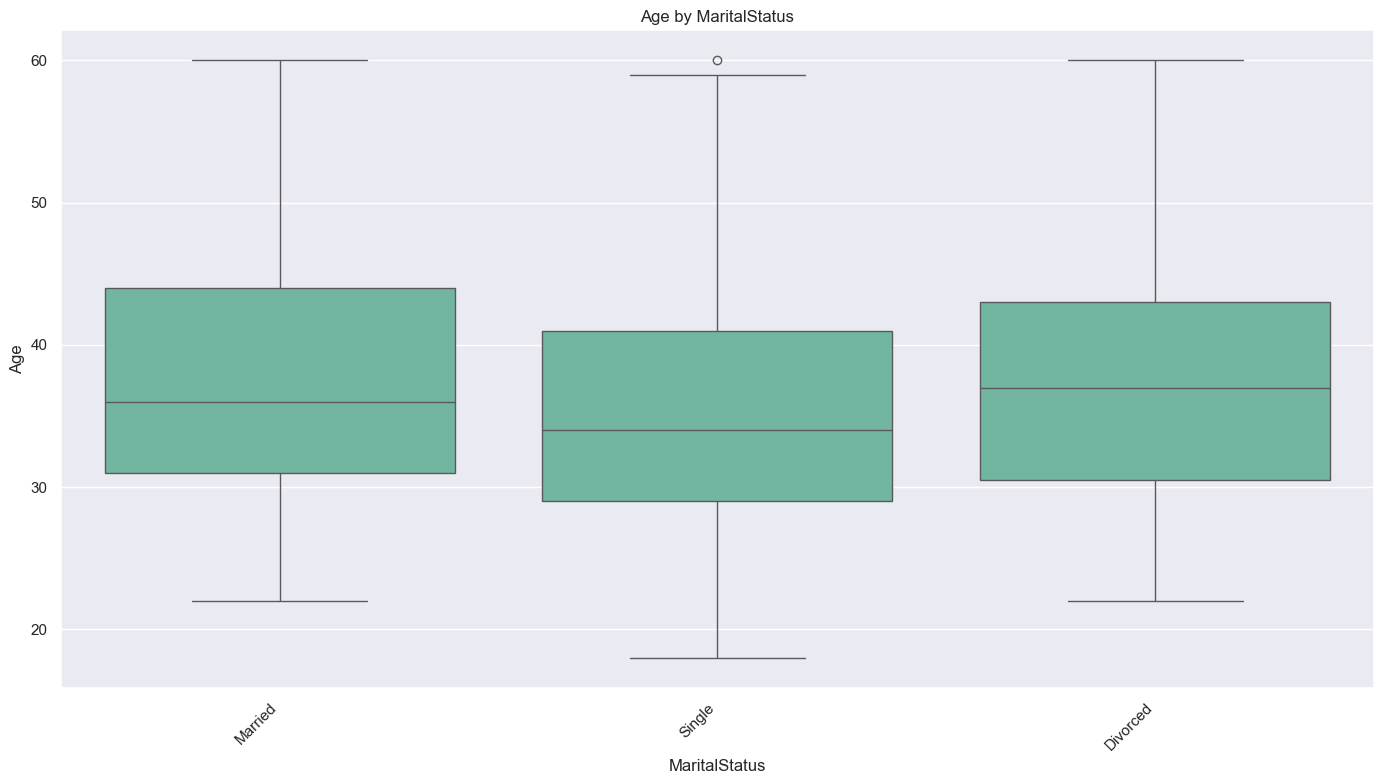


Summary statistics of Age grouped by MaritalStatus:


count       mean       std   min   25%   50%   75%   max
MaritalStatus                                                          
Divorced       327.0  37.489297  8.574415  22.0  30.5  37.0  43.0  60.0
Married        673.0  37.757801  9.002936  22.0  31.0  36.0  44.0  60.0
Single         470.0  35.336170  9.508484  18.0  29.0  34.0  41.0  60.0

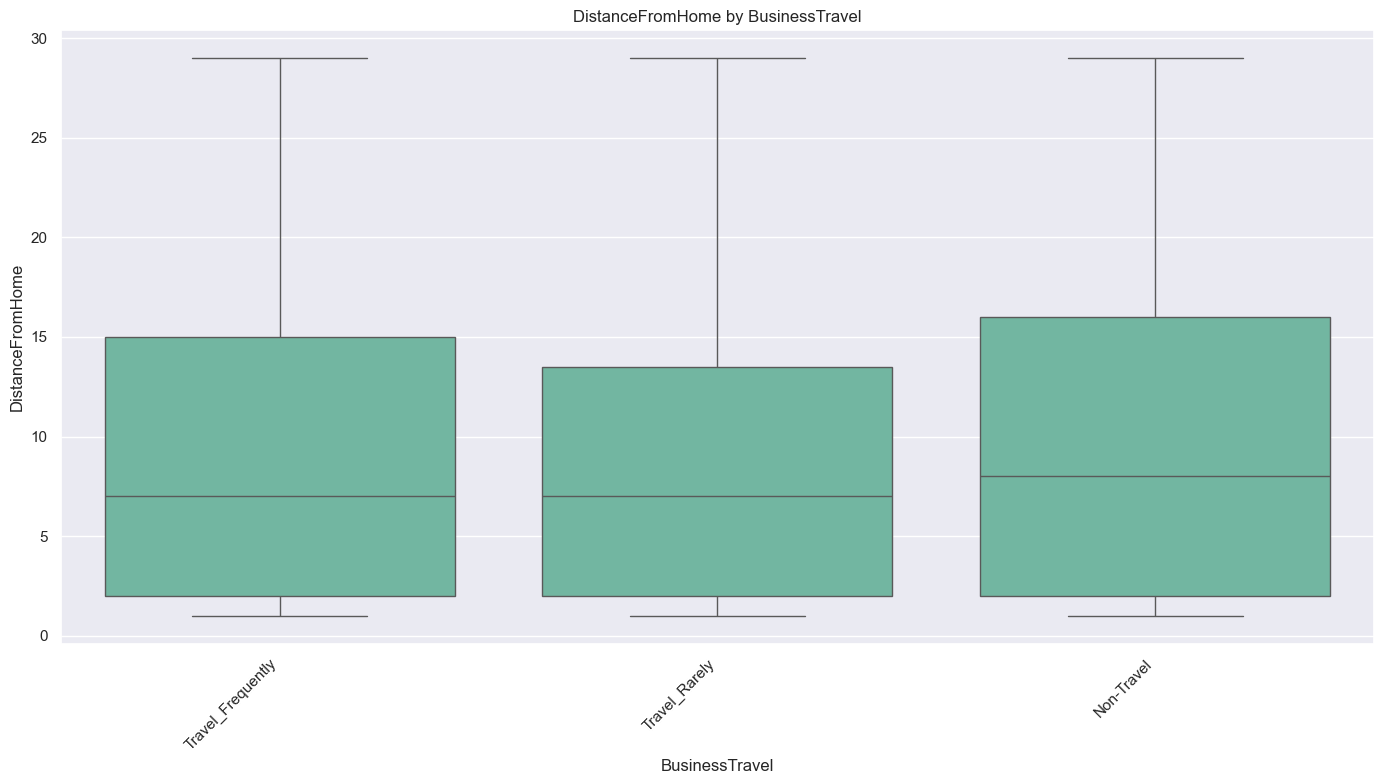


Summary statistics of DistanceFromHome grouped by BusinessTravel:


count      mean       std  min  25%  50%   75%   max
BusinessTravel                                                          
Non-Travel          150.0  9.760000  8.518972  1.0  2.0  8.0  16.0  29.0
Travel_Frequently   277.0  9.277978  8.421332  1.0  2.0  7.0  15.0  29.0
Travel_Rarely      1043.0  9.088207  7.964405  1.0  2.0  7.0  13.5  29.0

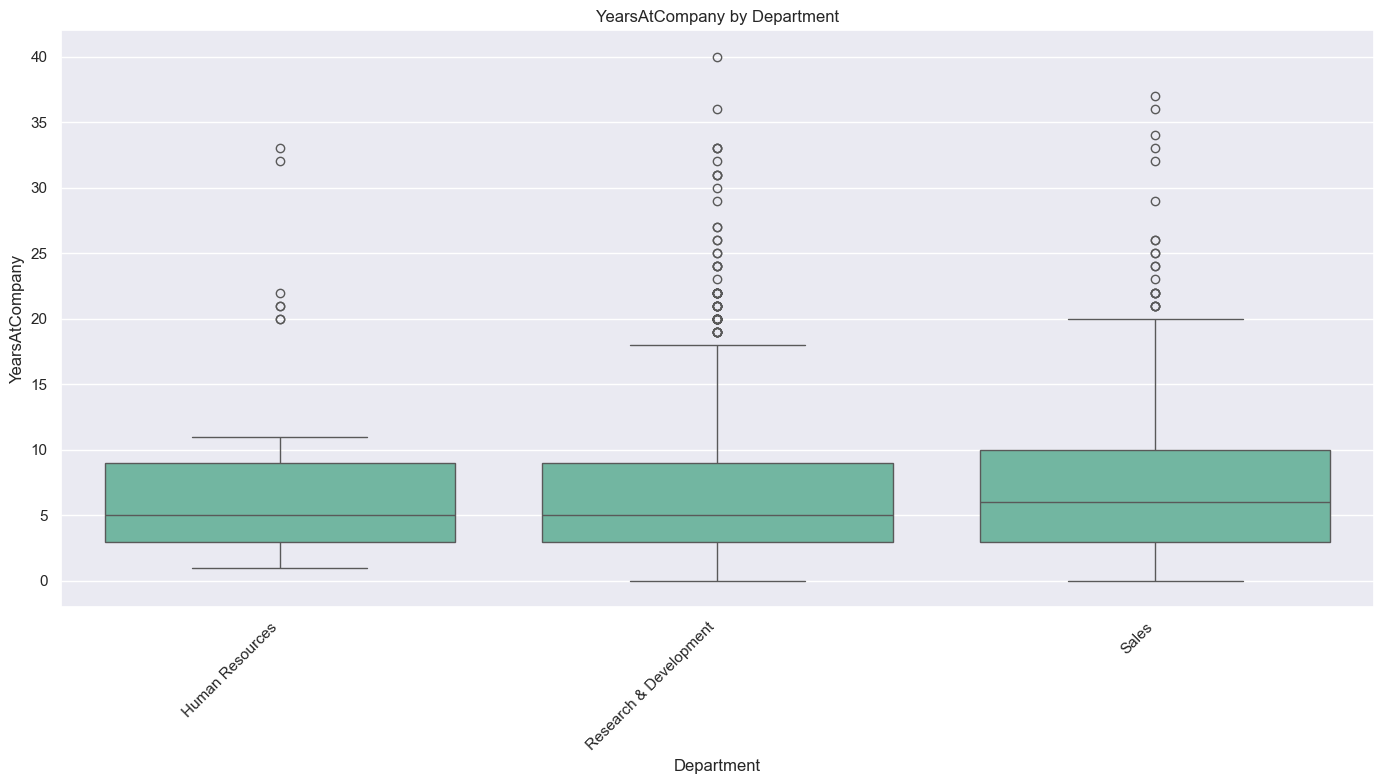


Summary statistics of YearsAtCompany grouped by Department:


count      mean       std  min  25%  50%   75%   max
Department                                                                  
Human Resources          63.0  7.238095  6.890185  1.0  3.0  5.0   9.0  33.0
Research & Development  961.0  6.864724  6.024119  0.0  3.0  5.0   9.0  40.0
Sales                   446.0  7.284753  6.234885  0.0  3.0  6.0  10.0  37.0

In [765]:
# 3.2 Numerical vs Categorical Analysis

# Select pairs of numerical and categorical variables
num_cat_pairs = [('MonthlyIncome', 'Department'),
                 ('MonthlyIncome', 'JobRole'),
                 ('MonthlyIncome', 'Gender'),
                 ('Age', 'MaritalStatus'),
                 ('DistanceFromHome', 'BusinessTravel'),
                 ('YearsAtCompany', 'Department')]

for pair in num_cat_pairs:
    if pair[0] in df.columns and pair[1] in df.columns:
        plt.figure(figsize=(14, 8))
        # Check if categorical variable has many categories
        if df[pair[1]].nunique() > 10:
            # For many categories, show only top ones
            top_cats = df[pair[1]].value_counts().nlargest(10).index
            sns.boxplot(x=pair[1], y=pair[0], data=df[df[pair[1]].isin(top_cats)])
            plt.title(f'{pair[0]} by {pair[1]} (Top 10 categories)')
        else:
            sns.boxplot(x=pair[1], y=pair[0], data=df)
            plt.title(f'{pair[0]} by {pair[1]}')
            
        plt.xlabel(pair[1])
        plt.ylabel(pair[0])
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # Calculate and display group statistics
        print(f"\nSummary statistics of {pair[0]} grouped by {pair[1]}:")
        display(df.groupby(pair[1])[pair[0]].describe())

**Key insight:**
- Sales memiliki median pendapatan tertinggi, diikuti oleh Human Resources, lalu R&D. Departemen Sales umumnya mendapatkan kompensasi lebih tinggi, mungkin karena insentif atau hasil penjualan.
- Research Director dan Manager memiliki pendapatan paling tinggi secara konsisten. Sedangkan, Sales Representative dan Laboratory Technician memiliki pendapatan paling rendah. Jabatan memiliki pengaruh yang jauh lebih besar terhadap pendapatan dibanding departemen, menunjukkan pentingnya level posisi dalam struktur gaji.
- Median pendapatan pria dan wanita hampir identik, dengan distribusi yang juga mirip. Tidak ditemukan indikasi kesenjangan pendapatan berdasarkan gender pada data ini.
- Karyawan yang sudah menikah cenderung lebih tua, sesuai ekspektasi umum.
- Jarak tidak banyak bervariasi antar kelompok, namun penyebaran lebih luas pada Non-Travel. Frekuensi perjalanan dinas tidak terkait erat dengan jarak rumah, mungkin karena faktor pekerjaan spesifik atau fleksibilitas kerja.
- Median masa kerja hampir setara di semua departemen (~5–6 tahun). Namun, R&D dan Sales memiliki lebih banyak outlier dengan masa kerja sangat panjang. Tidak ada perbedaan mencolok dalam loyalitas antar departemen, tetapi R&D dan Sales menunjukkan potensi adanya karyawan-karyawan jangka panjang yang loyal.


Crosstab of Department vs Gender:


Gender                  Female  Male
Department                          
Human Resources             20    43
Research & Development     379   582
Sales                      189   257


Percentage breakdown of Department by Gender:


Gender                  Female   Male
Department                           
Human Resources          31.75  68.25
Research & Development   39.44  60.56
Sales                    42.38  57.62

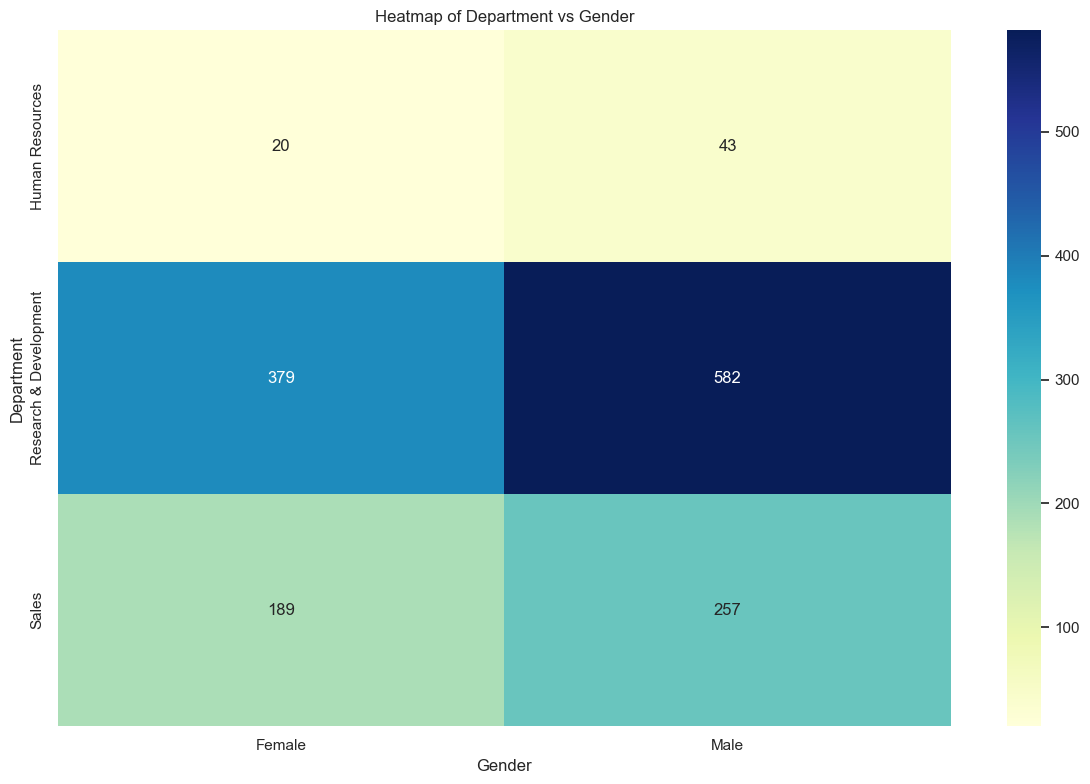

<Figure size 1200x800 with 0 Axes>

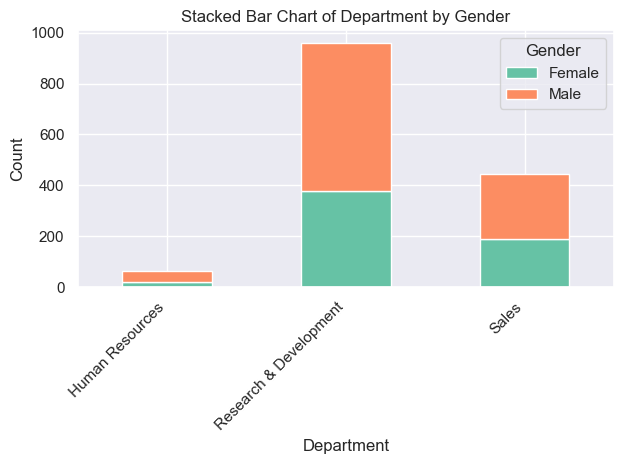


Crosstab of MaritalStatus vs Gender:


Gender         Female  Male
MaritalStatus              
Divorced          117   210
Married           272   401
Single            199   271


Percentage breakdown of MaritalStatus by Gender:


Gender         Female   Male
MaritalStatus               
Divorced        35.78  64.22
Married         40.42  59.58
Single          42.34  57.66

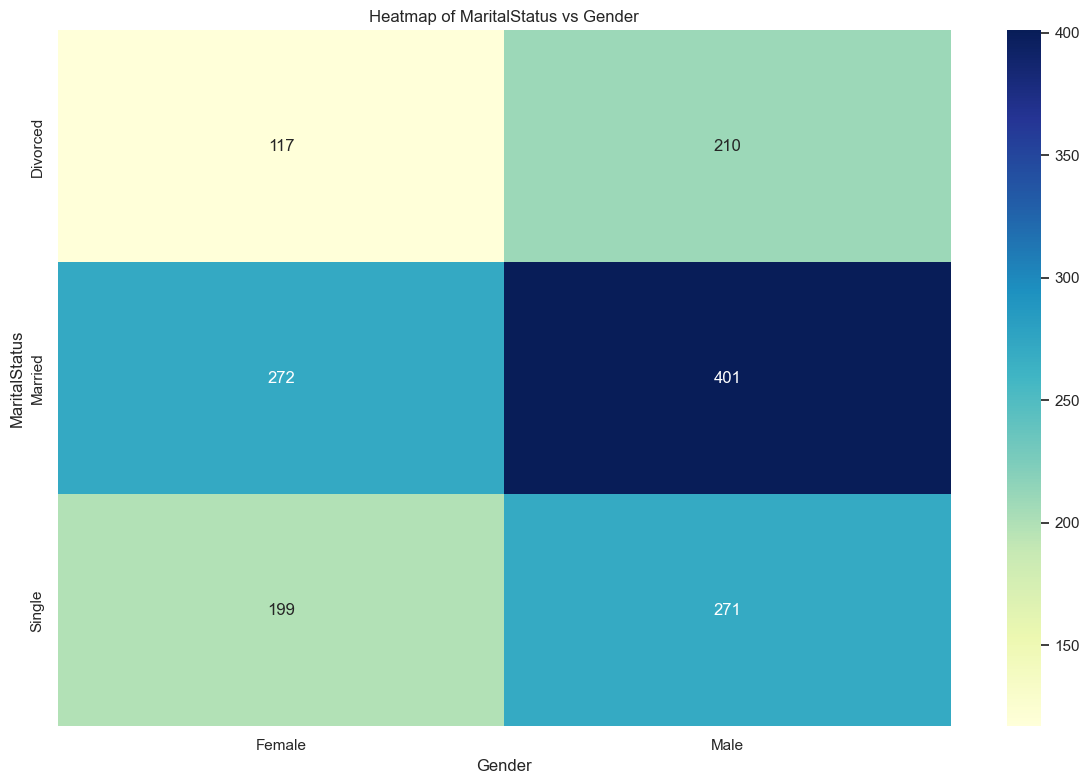

<Figure size 1200x800 with 0 Axes>

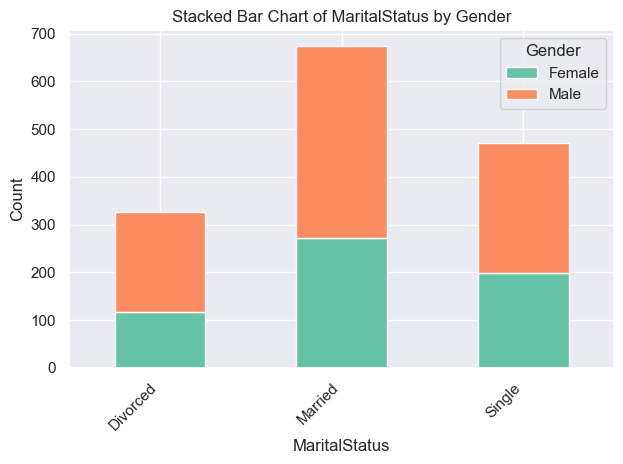


Crosstab of JobRole vs Department:


Department                 Human Resources  Research & Development  Sales
JobRole                                                                  
Healthcare Representative                0                     131      0
Human Resources                         52                       0      0
Laboratory Technician                    0                     259      0
Manager                                 11                      54     37
Manufacturing Director                   0                     145      0
Research Director                        0                      80      0
Research Scientist                       0                     292      0
Sales Executive                          0                       0    326
Sales Representative                     0                       0     83


Percentage breakdown of JobRole by Department:


Department                 Human Resources  Research & Development   Sales
JobRole                                                                   
Healthcare Representative             0.00                  100.00    0.00
Human Resources                     100.00                    0.00    0.00
Laboratory Technician                 0.00                  100.00    0.00
Manager                              10.78                   52.94   36.27
Manufacturing Director                0.00                  100.00    0.00
Research Director                     0.00                  100.00    0.00
Research Scientist                    0.00                  100.00    0.00
Sales Executive                       0.00                    0.00  100.00
Sales Representative                  0.00                    0.00  100.00

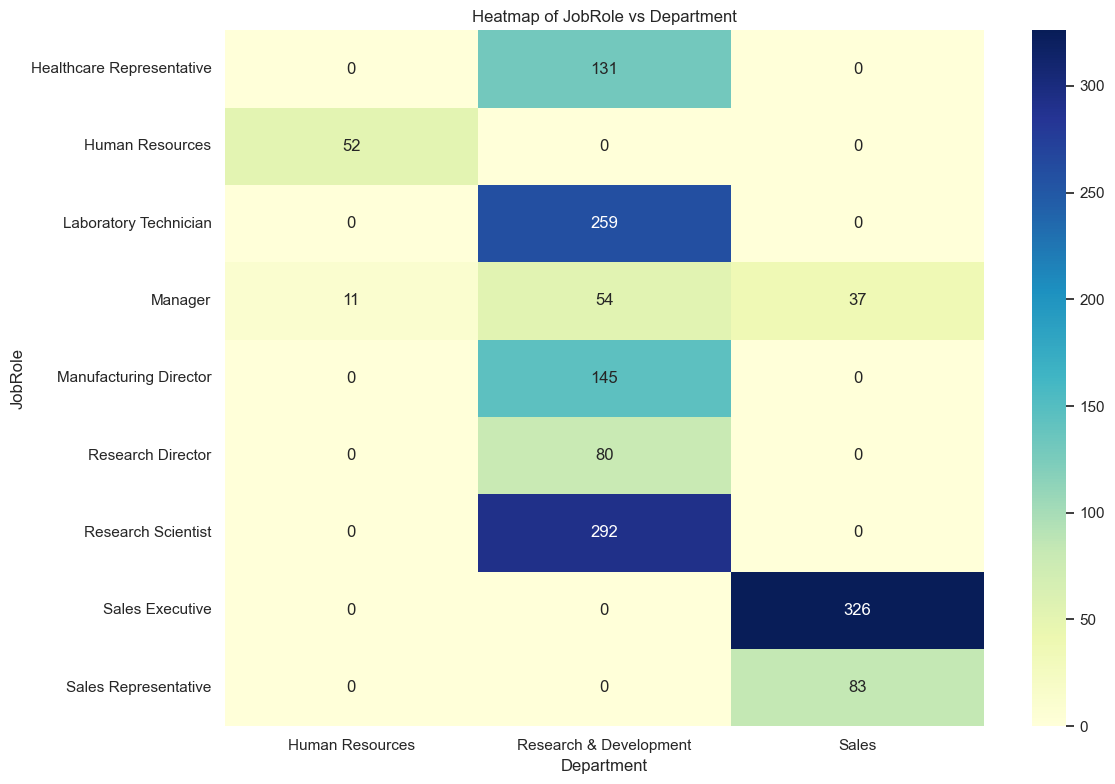

<Figure size 1200x800 with 0 Axes>

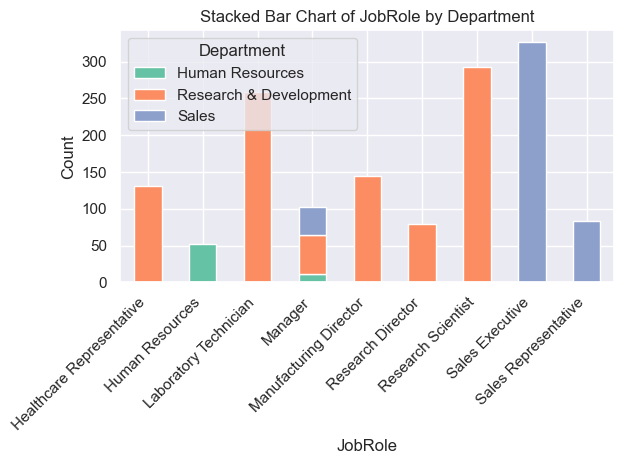


Crosstab of BusinessTravel vs MaritalStatus:


MaritalStatus      Divorced  Married  Single
BusinessTravel                              
Non-Travel               44       59      47
Travel_Frequently        63      118      96
Travel_Rarely           220      496     327


Percentage breakdown of BusinessTravel by MaritalStatus:


MaritalStatus      Divorced  Married  Single
BusinessTravel                              
Non-Travel            29.33    39.33   31.33
Travel_Frequently     22.74    42.60   34.66
Travel_Rarely         21.09    47.56   31.35

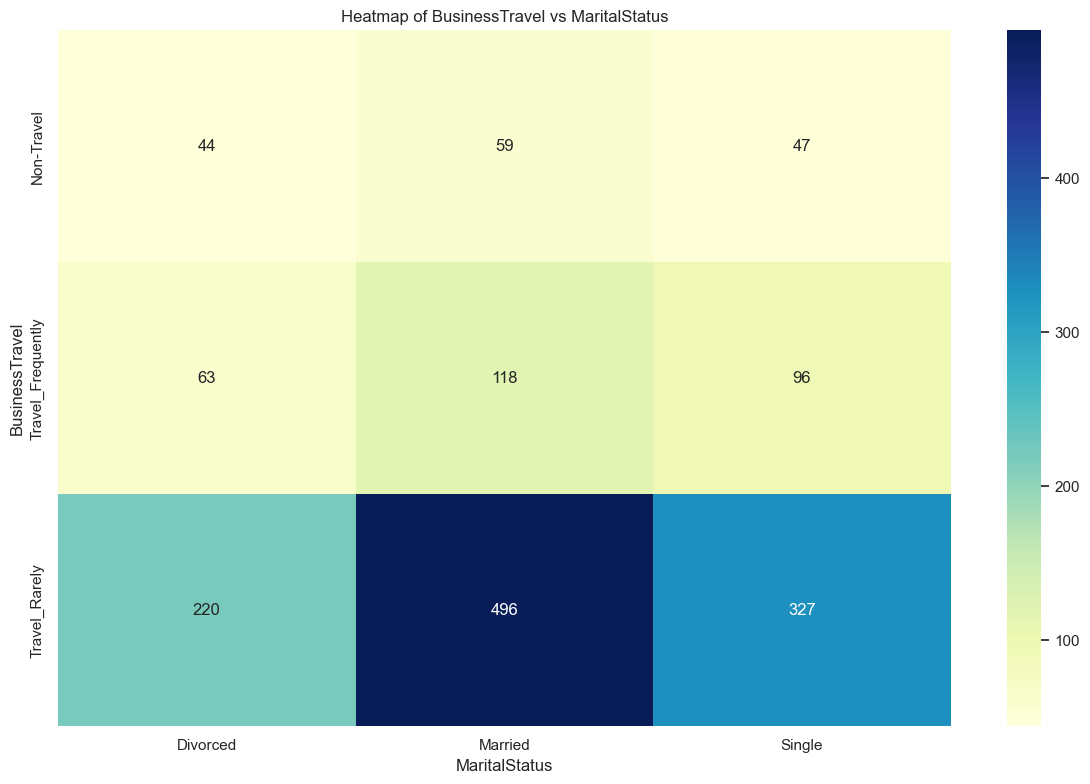

<Figure size 1200x800 with 0 Axes>

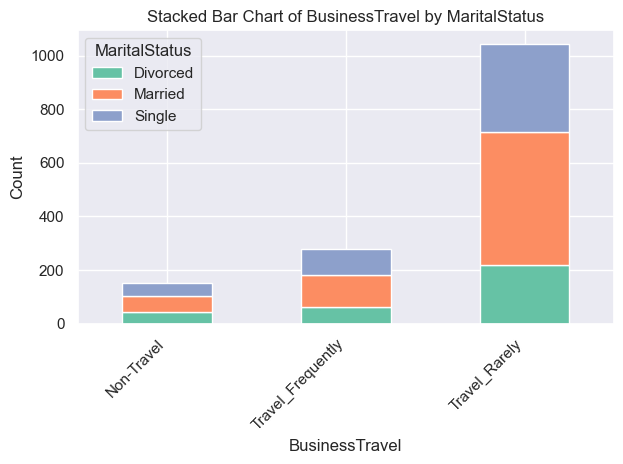

In [767]:
# 3.3 Categorical vs Categorical Analysis

# Select pairs of categorical variables to analyze
cat_pairs = [('Department', 'Gender'),
             ('MaritalStatus', 'Gender'),
             ('JobRole', 'Department'),
             ('BusinessTravel', 'MaritalStatus')]

for pair in cat_pairs:
    if pair[0] in df.columns and pair[1] in df.columns:
        # Create crosstab
        cross_tab = pd.crosstab(df[pair[0]], df[pair[1]])
        print(f"\nCrosstab of {pair[0]} vs {pair[1]}:")
        display(cross_tab)
        
        # Create normalized crosstab (percentages)
        norm_tab = pd.crosstab(df[pair[0]], df[pair[1]], normalize='index')*100
        print(f"\nPercentage breakdown of {pair[0]} by {pair[1]}:")
        display(norm_tab.round(2))
        
        # Visualize with heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")
        plt.title(f'Heatmap of {pair[0]} vs {pair[1]}')
        plt.tight_layout()
        plt.show()

        # Visualize with stacked bar chart
        plt.figure(figsize=(12, 8))
        cross_tab.plot(kind='bar', stacked=True)
        plt.title(f'Stacked Bar Chart of {pair[0]} by {pair[1]}')
        plt.xlabel(pair[0])
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title=pair[1])
        plt.tight_layout()
        plt.show()

**Key insight:**
1. Gender vs Department: Representasi perempuan di semua departemen masih lebih rendah, menunjukkan potensi ketimpangan gender, khususnya di R&D dan Sales.
2. Gender vs Marital Status: Mayoritas karyawan yang menikah adalah pria (401 pria vs 272 wanita). Pola serupa juga terlihat untuk status single dan divorced, di mana pria tetap lebih banyak.
3. Job Role vs Department: 
    - R&D terdiri dari peran teknis seperti: Research Scientist, Laboratory Technician, Manufacturing Director, Research Director.
    - Sales terdiri dari: Sales Executive, Sales Representative.
    - HR sepenuhnya terdiri dari karyawan dengan peran "Human Resources".
4. Job Role Distribution by Department:
    - Posisi dengan jumlah karyawan tertinggi dipegang oleh Sales Executive di Sales dan Research Scientist di R&D.
    - Peran manajerial (Manager) tersebar di semua departemen, tetapi dominan di R&D.
5.  Business Travel vs Marital Status: Karyawan dengan berbagai status pernikahan lebih cenderung melakukan perjalanan bisnis secara jarang, menunjukkan bahwa kebijakan atau kebutuhan perjalanan relatif merata namun tidak intens.

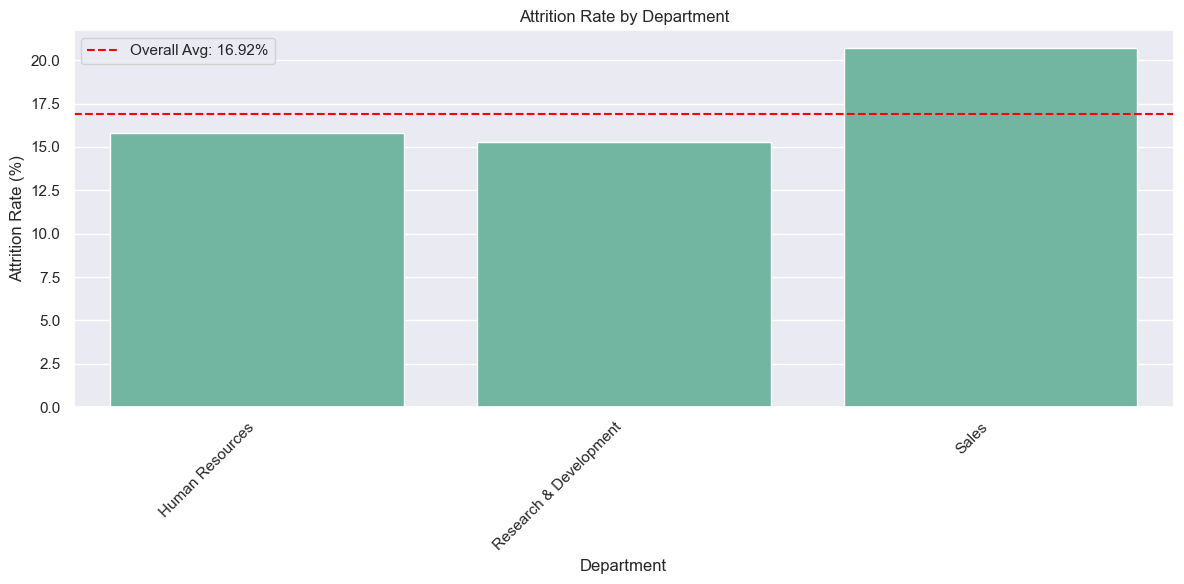


Attrition counts by Department:


Attrition               0.0  1.0
Department                      
Human Resources          32    6
Research & Development  594  107
Sales                   253   66


Attrition percentages by Department:


Attrition                 0.0    1.0
Department                          
Human Resources         84.21  15.79
Research & Development  84.74  15.26
Sales                   79.31  20.69

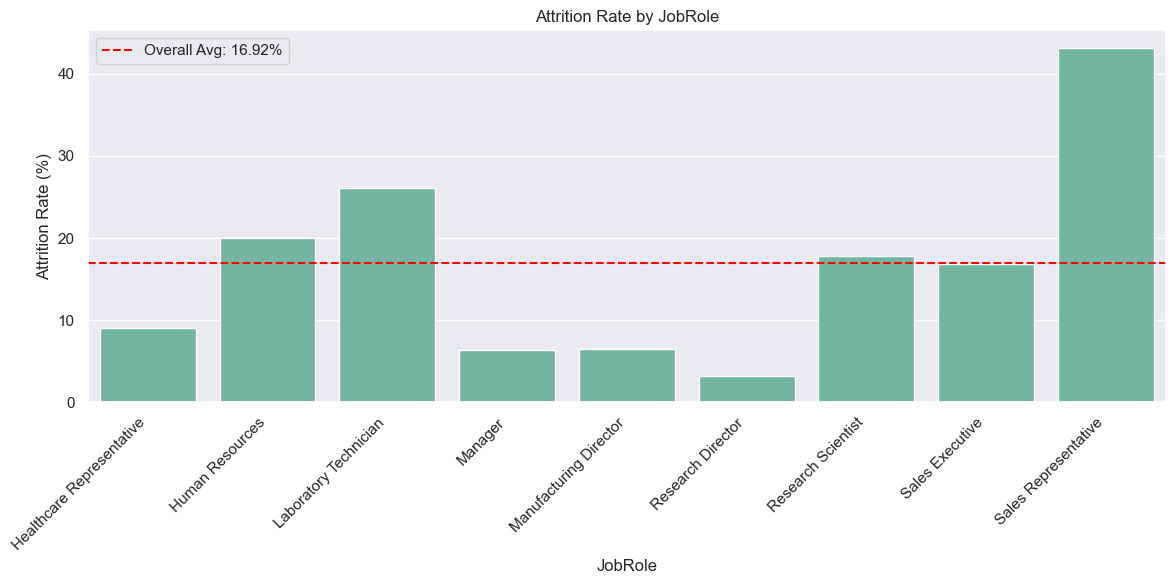


Attrition counts by JobRole:


Attrition                  0.0  1.0
JobRole                            
Healthcare Representative   80    8
Human Resources             24    6
Laboratory Technician      139   49
Manager                     74    5
Manufacturing Director     100    7
Research Director           60    2
Research Scientist         176   38
Sales Executive            193   39
Sales Representative        33   25


Attrition percentages by JobRole:


Attrition                    0.0    1.0
JobRole                                
Healthcare Representative  90.91   9.09
Human Resources            80.00  20.00
Laboratory Technician      73.94  26.06
Manager                    93.67   6.33
Manufacturing Director     93.46   6.54
Research Director          96.77   3.23
Research Scientist         82.24  17.76
Sales Executive            83.19  16.81
Sales Representative       56.90  43.10

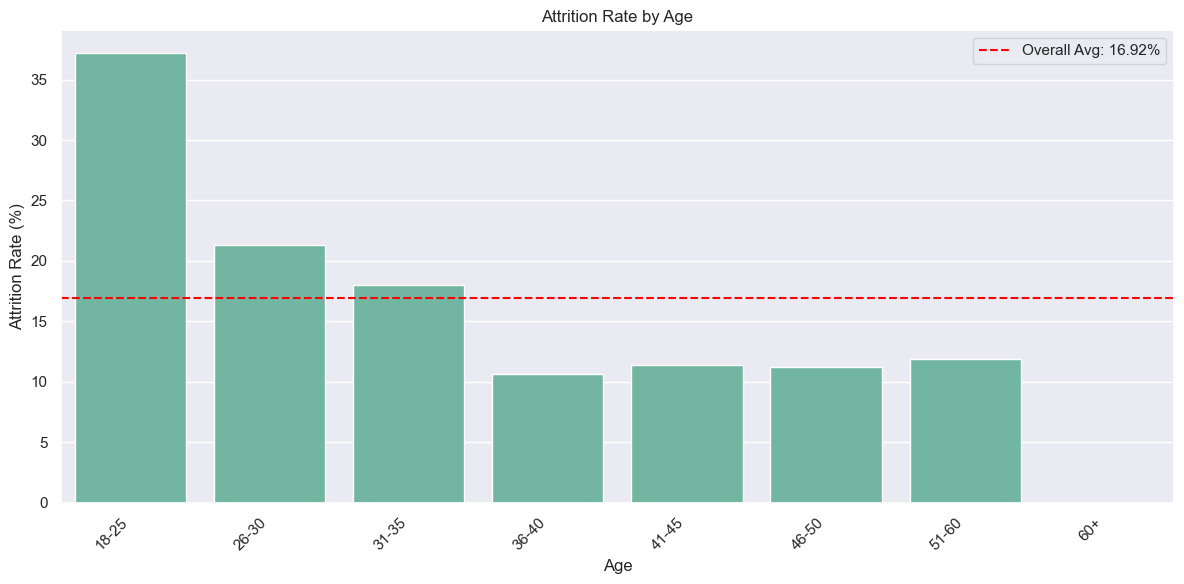

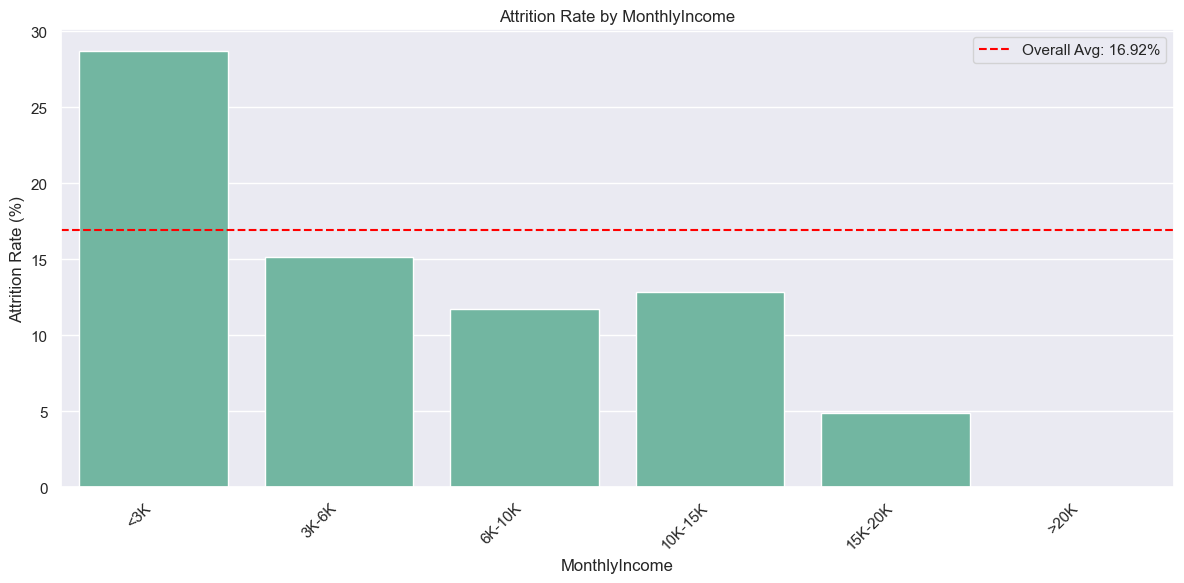

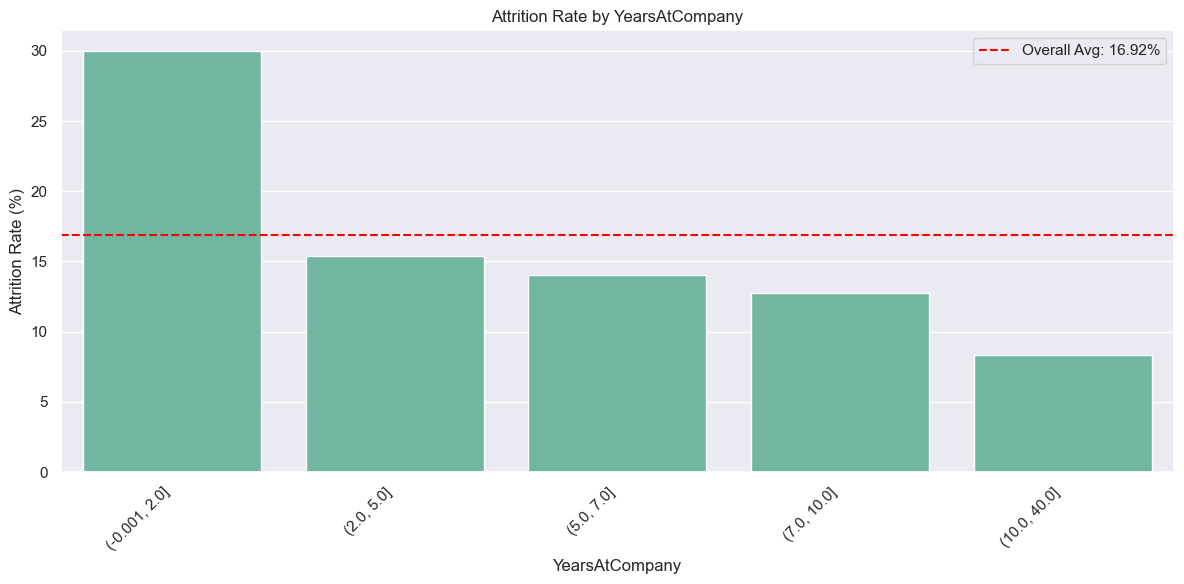

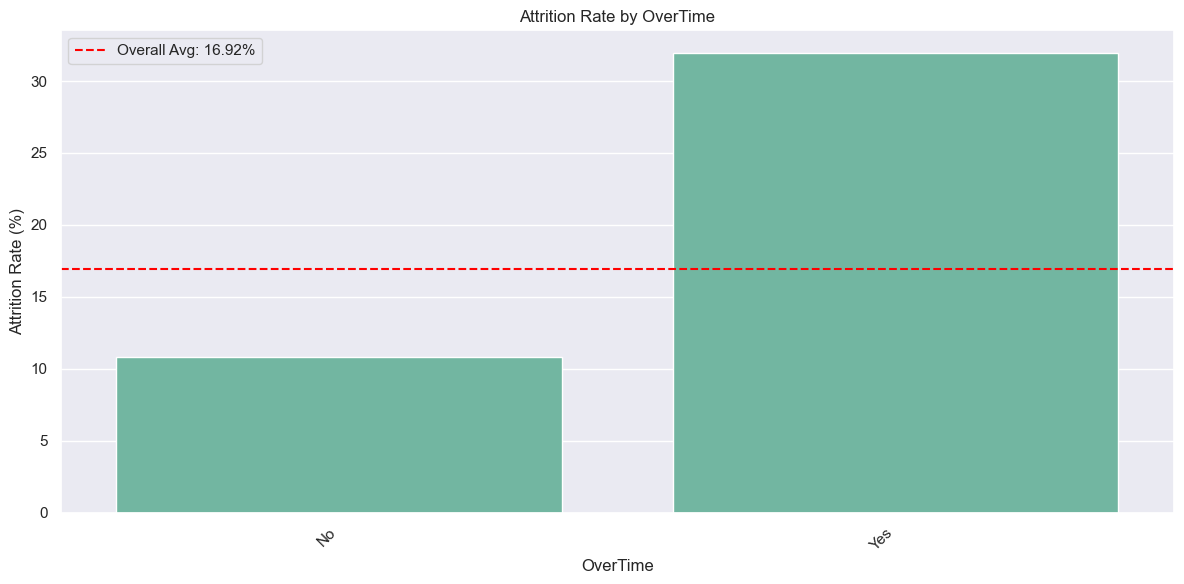


Attrition counts by OverTime:


Attrition  0.0  1.0
OverTime           
No         670   81
Yes        209   98


Attrition percentages by OverTime:


Attrition    0.0    1.0
OverTime               
No         89.21  10.79
Yes        68.08  31.92

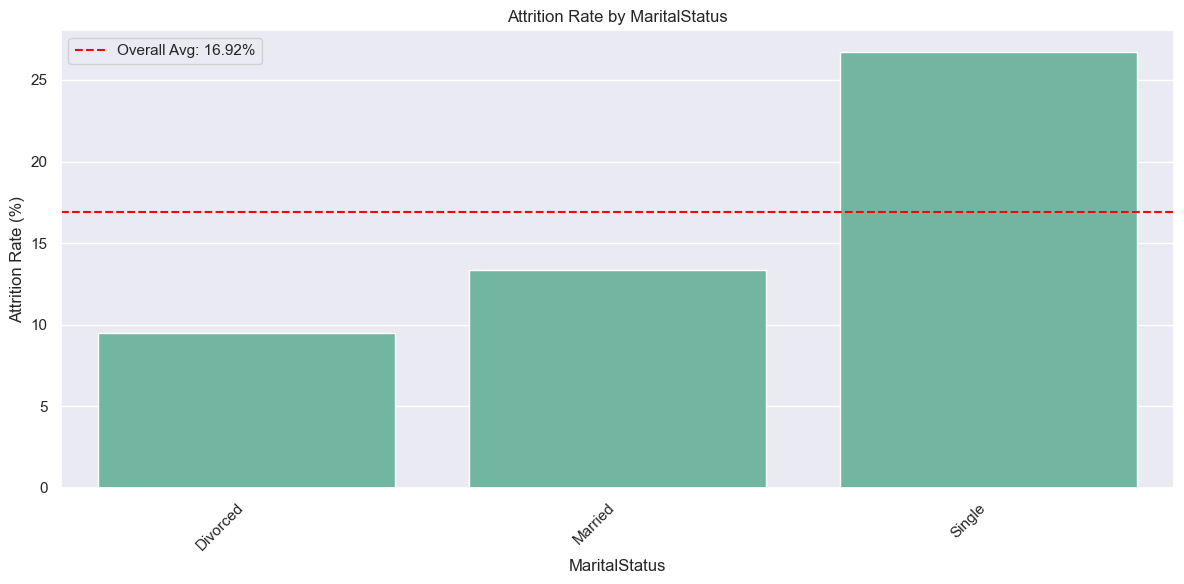


Attrition counts by MaritalStatus:


Attrition      0.0  1.0
MaritalStatus          
Divorced       219   23
Married        402   62
Single         258   94


Attrition percentages by MaritalStatus:


Attrition        0.0    1.0
MaritalStatus              
Divorced       90.50   9.50
Married        86.64  13.36
Single         73.30  26.70

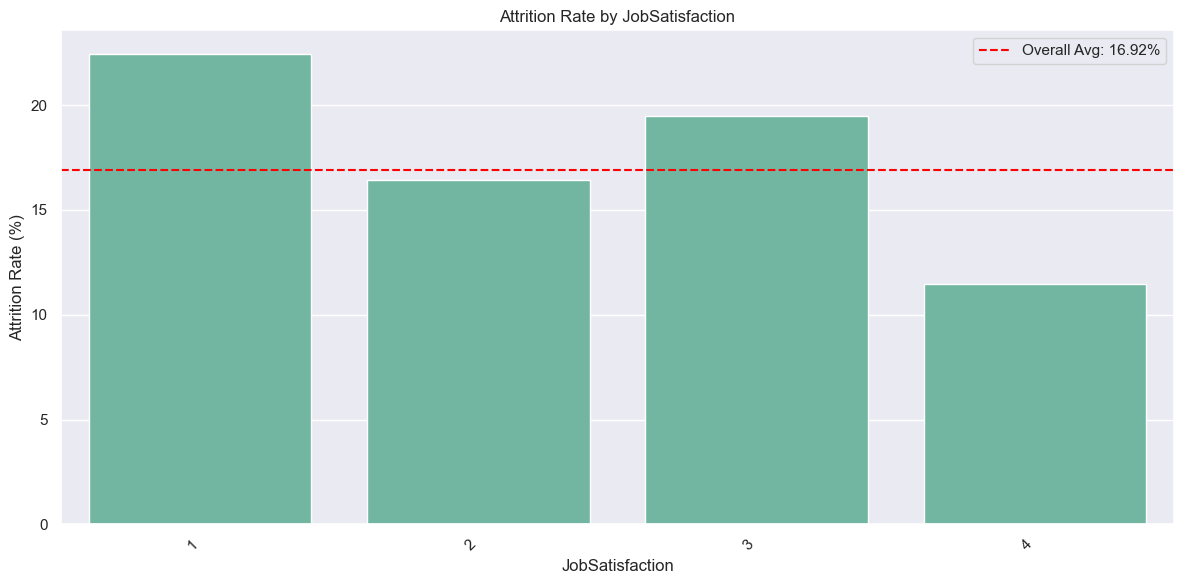


Attrition counts by JobSatisfaction:


Attrition        0.0  1.0
JobSatisfaction          
1                159   46
2                163   32
3                256   62
4                301   39


Attrition percentages by JobSatisfaction:


Attrition          0.0    1.0
JobSatisfaction              
1                77.56  22.44
2                83.59  16.41
3                80.50  19.50
4                88.53  11.47

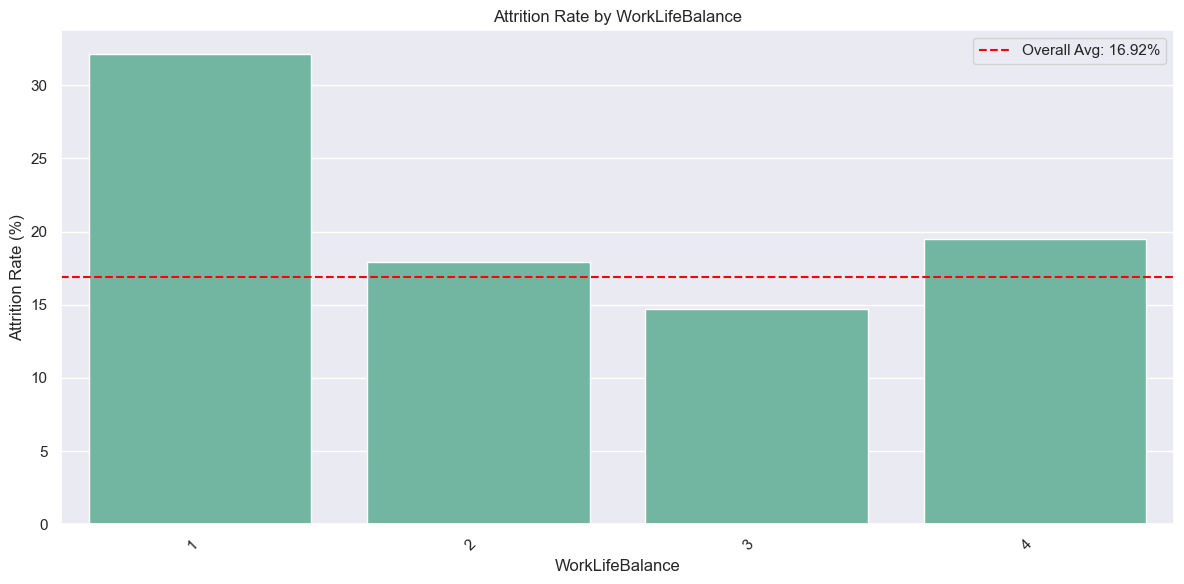


Attrition counts by WorkLifeBalance:


Attrition        0.0  1.0
WorkLifeBalance          
1                 38   18
2                206   45
3                544   94
4                 91   22


Attrition percentages by WorkLifeBalance:


Attrition          0.0    1.0
WorkLifeBalance              
1                67.86  32.14
2                82.07  17.93
3                85.27  14.73
4                80.53  19.47

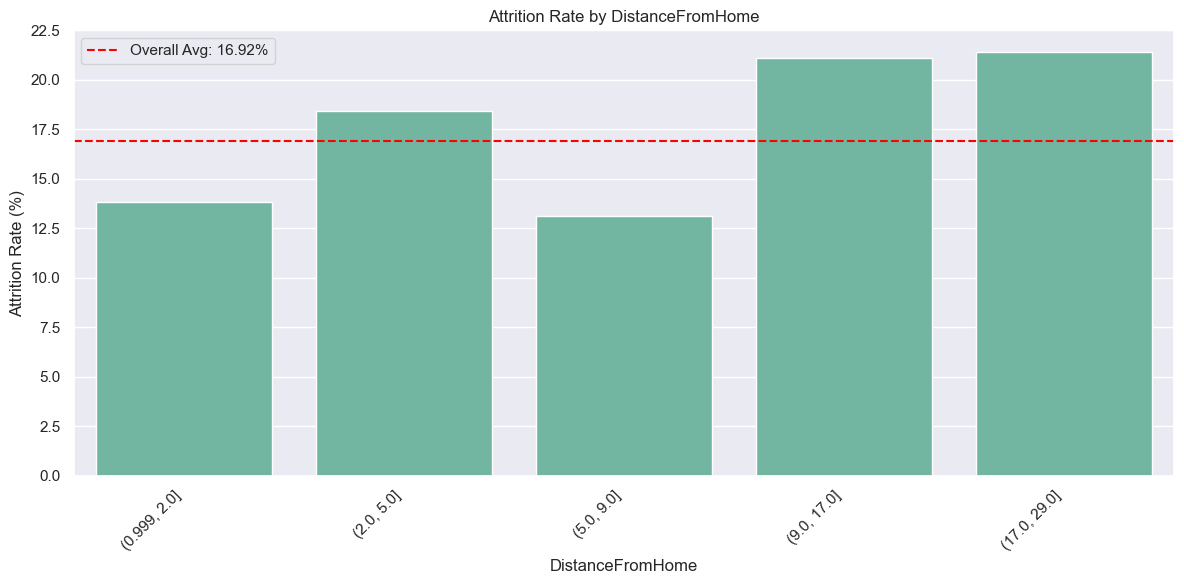

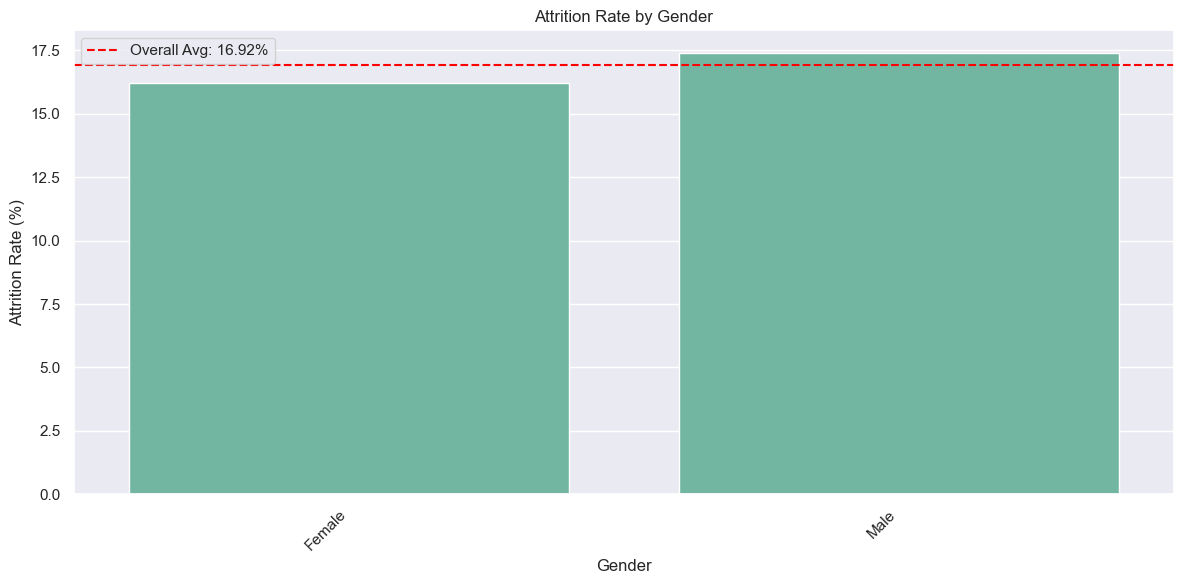


Attrition counts by Gender:


Attrition  0.0  1.0
Gender             
Female     367   71
Male       512  108


Attrition percentages by Gender:


Attrition    0.0    1.0
Gender                 
Female     83.79  16.21
Male       82.58  17.42

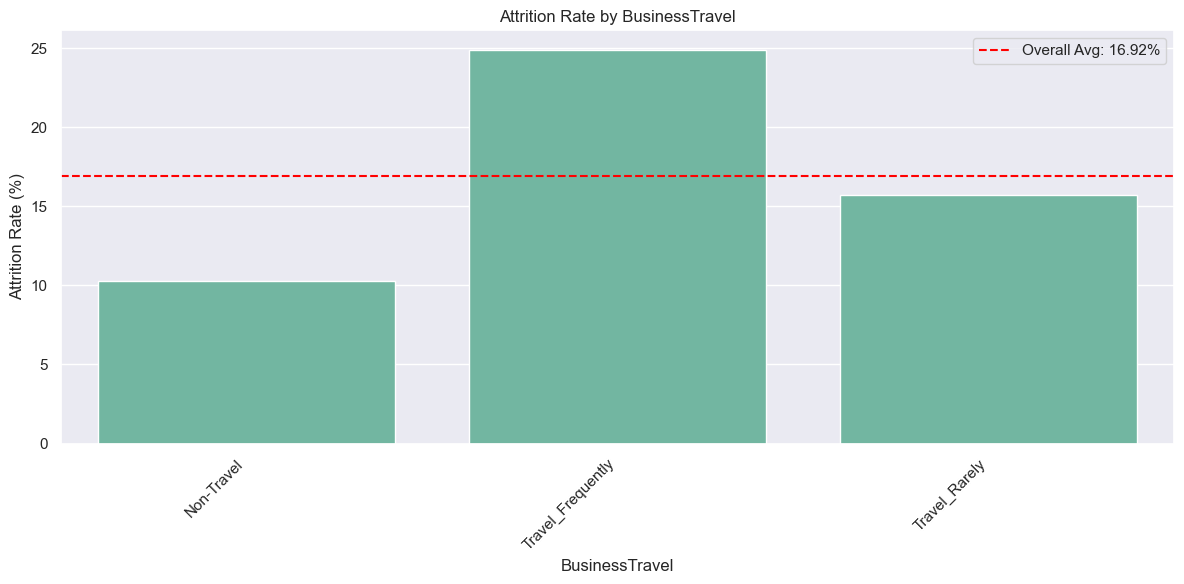


Attrition counts by BusinessTravel:


Attrition          0.0  1.0
BusinessTravel             
Non-Travel          96   11
Travel_Frequently  154   51
Travel_Rarely      629  117


Attrition percentages by BusinessTravel:


Attrition            0.0    1.0
BusinessTravel                 
Non-Travel         89.72  10.28
Travel_Frequently  75.12  24.88
Travel_Rarely      84.32  15.68

In [769]:
# 3.4 Attrition-focused analysis
    
# Create a function to analyze attrition by a specific variable
def analyze_attrition_by_var(var_name):
    if var_name in df.columns:
        # For numerical variables, create bins
        if df[var_name].dtype in ['int64', 'float64'] and df[var_name].nunique() > 10:
            # Create bins for the variable
            if var_name == 'Age':
                bins = [18, 25, 30, 35, 40, 45, 50, 60, 100]
                labels = ['18-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-60', '60+']
                binned_var = pd.cut(df[var_name], bins=bins, labels=labels)
            elif var_name == 'MonthlyIncome':
                bins = [0, 3000, 6000, 10000, 15000, 20000, 100000]
                labels = ['<3K', '3K-6K', '6K-10K', '10K-15K', '15K-20K', '>20K']
                binned_var = pd.cut(df[var_name], bins=bins, labels=labels)
            else:
                binned_var = pd.qcut(df[var_name], 5, duplicates='drop')
                
            # Calculate attrition rate by bins
            attrition_rate = df.groupby(binned_var)['Attrition'].mean() * 100
            
            # Plot
            plt.figure(figsize=(12, 6))
            sns.barplot(x=attrition_rate.index, y=attrition_rate.values)
            plt.title(f'Attrition Rate by {var_name}')
            plt.ylabel('Attrition Rate (%)')
            plt.xlabel(var_name)
            plt.axhline(df['Attrition'].mean()*100, color='red', linestyle='--', 
                      label=f'Overall Avg: {df["Attrition"].mean()*100:.2f}%')
            plt.legend()
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:  # For categorical variables
            # Calculate attrition rate by category
            attrition_by_cat = df.groupby(var_name)['Attrition'].mean() * 100
            
            # Plot
            plt.figure(figsize=(12, 6))
            sns.barplot(x=attrition_by_cat.index, y=attrition_by_cat.values)
            plt.title(f'Attrition Rate by {var_name}')
            plt.ylabel('Attrition Rate (%)')
            plt.xlabel(var_name)
            plt.axhline(df['Attrition'].mean()*100, color='red', linestyle='--', 
                      label=f'Overall Avg: {df["Attrition"].mean()*100:.2f}%')
            plt.legend()
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
            
            # Display counts and percentages
            attrition_counts = pd.crosstab(df[var_name], df['Attrition'])
            attrition_pcts = pd.crosstab(df[var_name], df['Attrition'], normalize='index')*100
            
            print(f"\nAttrition counts by {var_name}:")
            display(attrition_counts)
            
            print(f"\nAttrition percentages by {var_name}:")
            display(attrition_pcts.round(2))

# Analyze attrition by various important variables
important_vars = ['Department', 'JobRole', 'Age', 'MonthlyIncome', 'YearsAtCompany',
                  'OverTime', 'MaritalStatus', 'JobSatisfaction', 'WorkLifeBalance',
                  'DistanceFromHome', 'Gender', 'BusinessTravel']

for var in important_vars:
    if var in df.columns:
        analyze_attrition_by_var(var)

**Key insight:**
- Departemen Sales memiliki attrition tertinggi (20.7%), di atas rata-rata.
- Job Role dengan attrition tertinggi adalah Sales Representative (43.4%) dan Laboratory Technician (26.3%).
- Karyawan usia muda (18–25) memiliki tingkat attrition paling tinggi (37%), menurun seiring bertambahnya usia.
- Karyawan dengan pendapatan rendah (<3K) memiliki risiko resign paling tinggi (~29%), yang turun drastis pada pendapatan >15K.
- Tingkat attrition tinggi terjadi pada karyawan dengan masa kerja <2 tahun (~30%), yang kemudian stabil dan menurun.
- Karyawan yang bekerja lembur (OverTime) memiliki attrition rate lebih tinggi (32%) dibanding yang tidak lembur (11%).
- Single memiliki attrition rate tertinggi (27%), jauh di atas married (13%) dan divorced (9%).
- Karyawan dengan satisfaction terendah (1) memiliki attrition rate tertinggi (~22.6%). Semakin tinggi kepuasan kerja, semakin rendah attrition rate.
- Work-life balance terburuk (1) berkaitan dengan attrition tertinggi (~32%).
- Attrition meningkat ketika jarak dari rumah ke tempat kerja >9 km, dengan puncak pada rentang 17–29 km (~21%).
- Perbedaan antara pria dan wanita tidak signifikan dalam hal attrition (hampir seimbang).
- Karyawan yang sering bepergian (Travel_Frequently) memiliki attrition rate tertinggi (~25%).

#### Multivariate Analysis

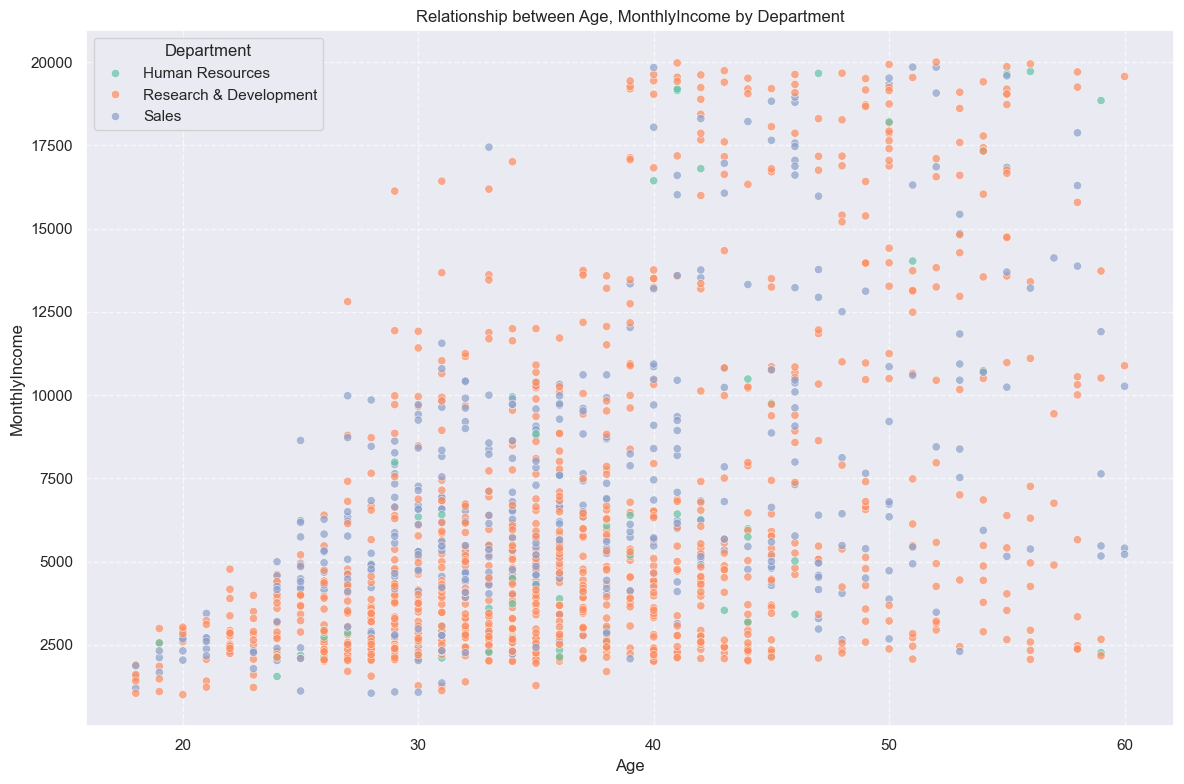

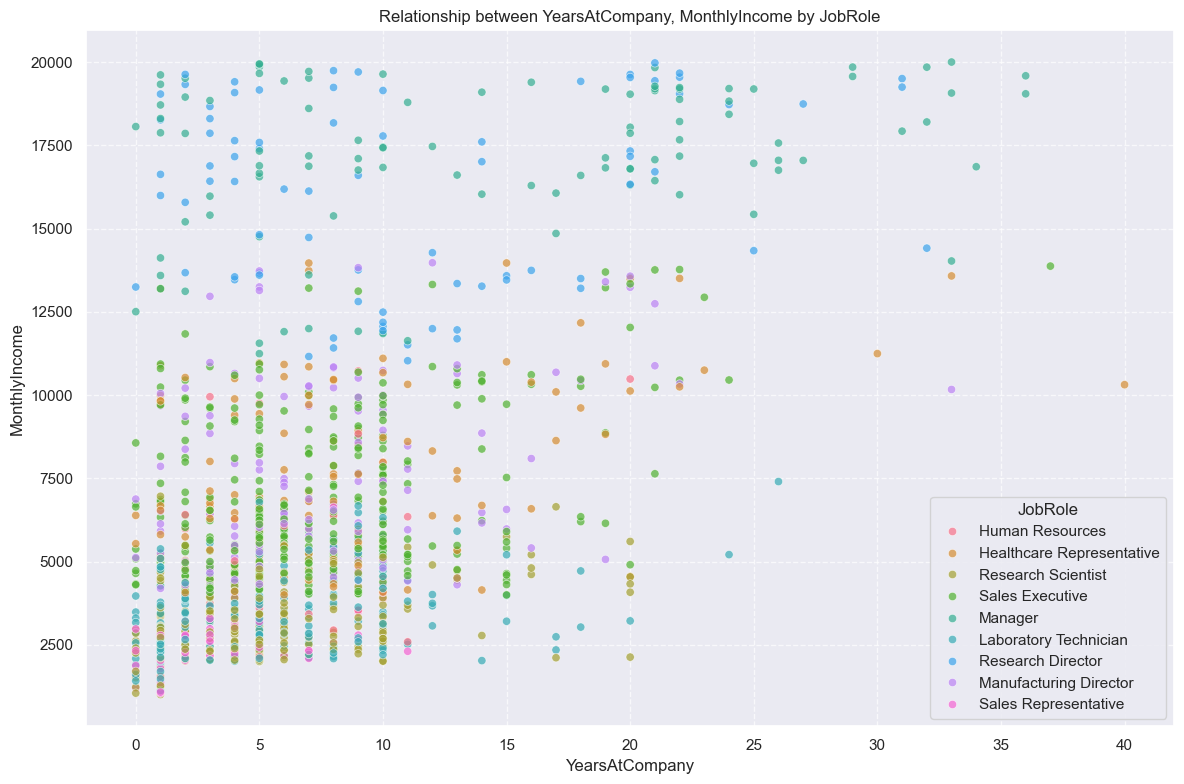

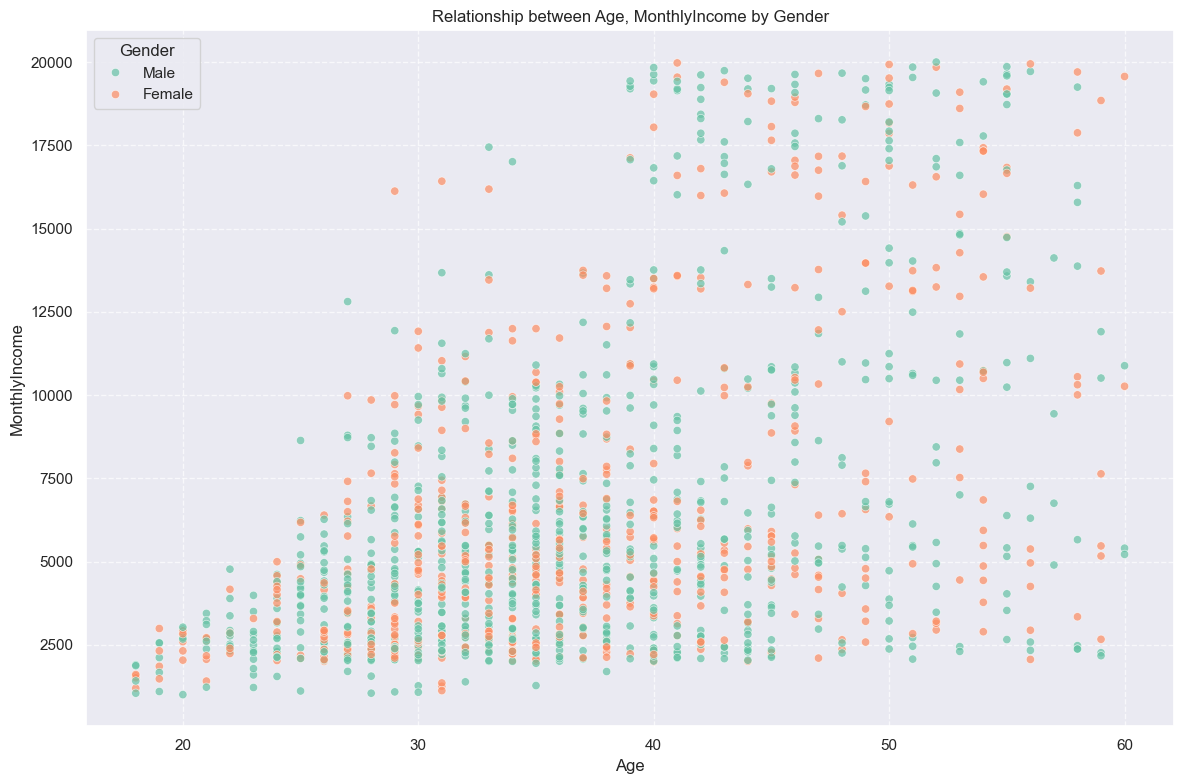

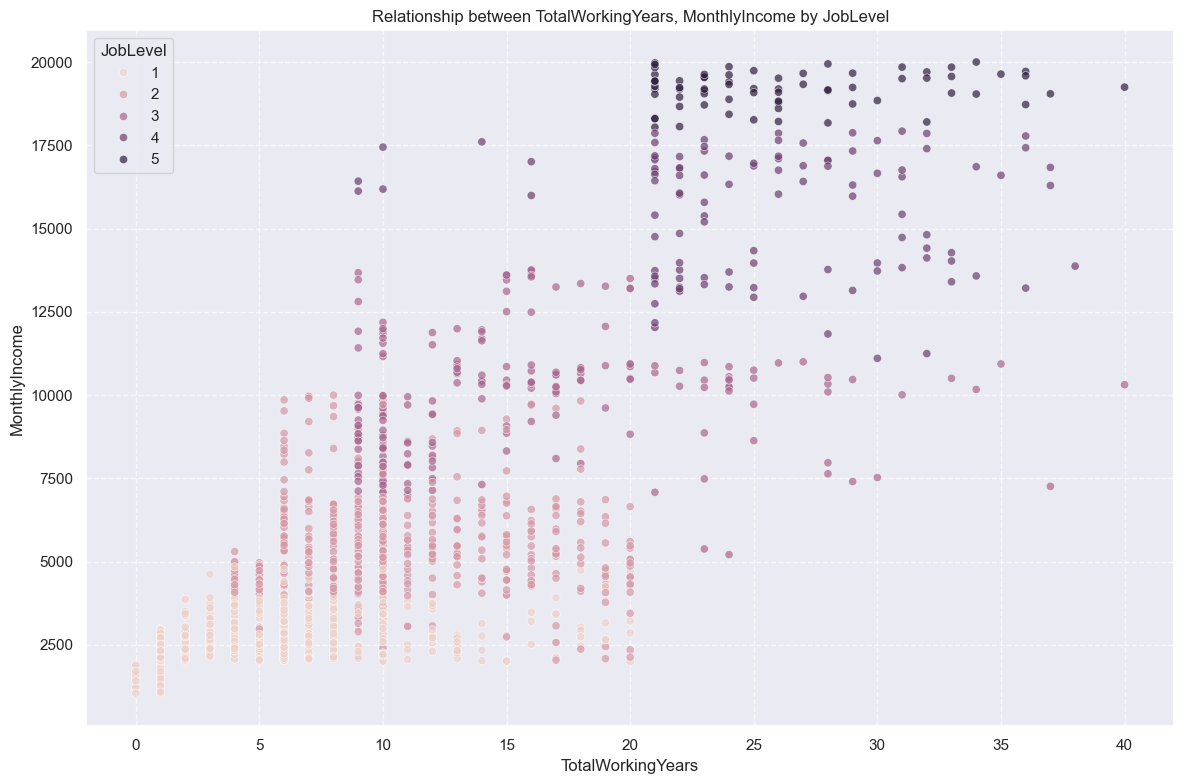

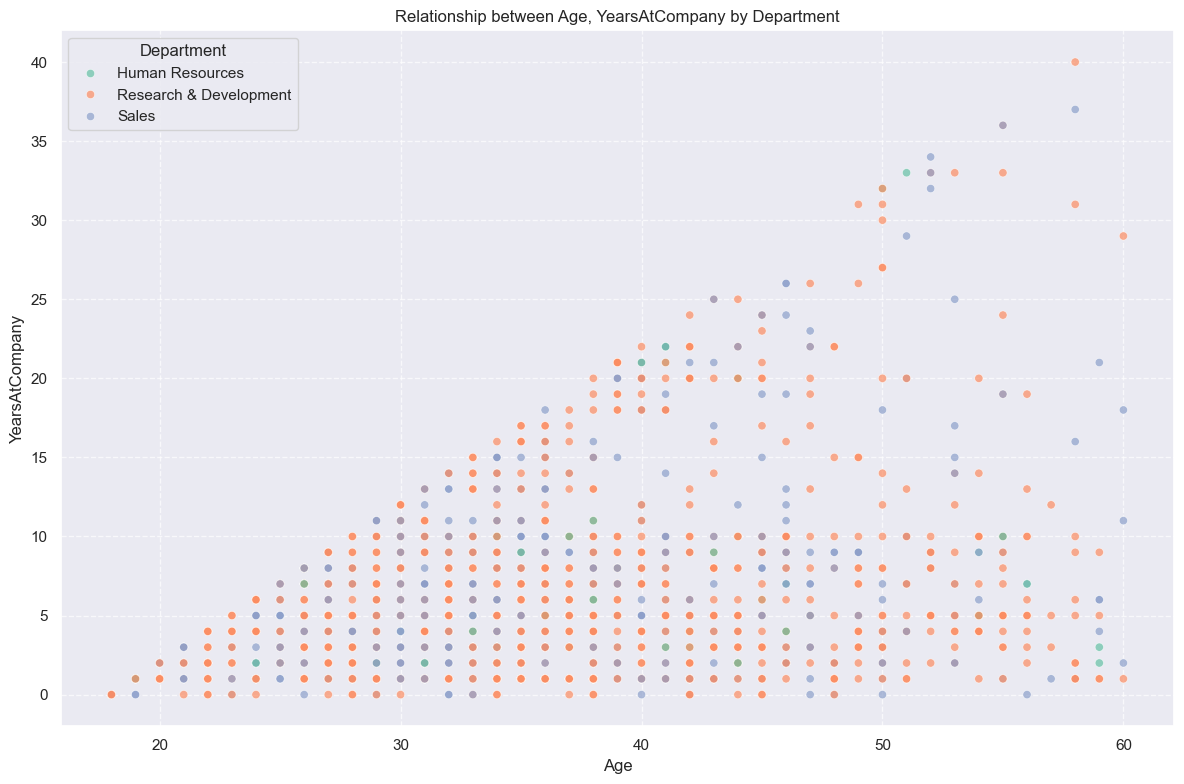

In [772]:
# 4.1 Three-Variable Analysis with Scatter Plots

# Define variable combinations to analyze
three_var_combinations = [
    ('Age', 'MonthlyIncome', 'Department'),
    ('YearsAtCompany', 'MonthlyIncome', 'JobRole'),
    ('Age', 'MonthlyIncome', 'Gender'),
    ('TotalWorkingYears', 'MonthlyIncome', 'JobLevel'),
    ('Age', 'YearsAtCompany', 'Department')
]

# Create scatter plots with third variable as hue
for combo in three_var_combinations:
    if all(var in df.columns for var in combo):
        # Check if third variable has too many categories
        if df[combo[2]].nunique() > 10:
            # For many categories, show only top ones
            top_cats = df[combo[2]].value_counts().nlargest(5).index
            plt_df = df[df[combo[2]].isin(top_cats)]
            plt.figure(figsize=(12, 8))
            sns.scatterplot(x=combo[0], y=combo[1], hue=combo[2], data=plt_df, alpha=0.7)
            plt.title(f'Relationship between {combo[0]}, {combo[1]} by {combo[2]} (Top 5 categories)')
        else:
            plt.figure(figsize=(12, 8))
            sns.scatterplot(x=combo[0], y=combo[1], hue=combo[2], data=df, alpha=0.7)
            plt.title(f'Relationship between {combo[0]}, {combo[1]} by {combo[2]}')
        
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

**Key insight:**
1. Age vs MonthlyIncome by Department
    - Income cenderung meningkat seiring bertambahnya usia, yang mengindikasikan hubungan positif antara usia dan pendapatan bulanan.

    - Karyawan Research & Development mendominasi di seluruh rentang usia dan pendapatan.

    - Sales memiliki variasi pendapatan yang luas, dengan sejumlah karyawan muda mendapatkan pendapatan tinggi.

    - Human Resources memiliki distribusi paling sempit, menunjukkan populasi yang lebih kecil dan cenderung berada di rentang pendapatan menengah ke bawah.

2. YearsAtCompany vs MonthlyIncome by JobRole
    - Pendapatan tidak selalu meningkat secara langsung dengan masa kerja; ada banyak variasi tergantung job role.

    - Manager, Research Director, dan Manufacturing Director menempati posisi dengan pendapatan tinggi meskipun beberapa dari mereka belum lama bekerja.

    - Job roles seperti Laboratory Technician dan Sales Representative cenderung memiliki pendapatan yang lebih rendah dan tersebar lebih luas.

3. Age vs MonthlyIncome by Gender
    - Tidak terdapat perbedaan mencolok antara pendapatan pria dan wanita dalam setiap rentang usia.

    - Distribusi menunjukkan kesetaraan gender dalam pendapatan bulanan di perusahaan ini.

    - Keduanya menunjukkan tren pendapatan meningkat seiring bertambahnya usia.

4. TotalWorkingYears vs MonthlyIncome by JobLevel
    - Ada hubungan yang sangat jelas bahwa semakin tinggi total pengalaman kerja, dan level pekerjaan (JobLevel), maka semakin tinggi pendapatan.

    - JobLevel 5 mendominasi pendapatan tinggi, terutama pada mereka dengan pengalaman kerja lebih dari 20 tahun.

    - JobLevel 1 dan 2 terbatas di rentang pendapatan rendah hingga menengah dan umumnya pengalaman kerja <10 tahun.

5. Age vs YearsAtCompany by Department
    - Ada korelasi kuat antara usia dan masa kerja di perusahaan, meskipun ada juga outlier yang berusia tua tetapi baru bergabung.

    - Research & Development menunjukkan keberagaman masa kerja di setiap kelompok usia, mencerminkan departemen yang besar dan beragam.

    - Sales dan Human Resources memiliki pola yang lebih menyebar, tapi umumnya lebih sedikit karyawan dengan masa kerja >20 tahun.


Attrition Rate by Department and JobRole:


JobRole                 Healthcare Representative  Human Resources  \
Department                                                           
Human Resources                              0.00             20.0   
Research & Development                       9.09              0.0   
Sales                                        0.00              0.0   

JobRole                 Laboratory Technician  Manager  \
Department                                               
Human Resources                          0.00     0.00   
Research & Development                  26.06     7.14   
Sales                                    0.00     6.90   

JobRole                 Manufacturing Director  Research Director  \
Department                                                          
Human Resources                           0.00               0.00   
Research & Development                    6.54               3.23   
Sales                                     0.00               0.00   

JobRole                 Research Scientist  Sales Executive  \
Department                                                    
Human Resources                       0.00             0.00   
Research & Development               17.76             0.00   
Sales                                 0.00            16.81   

JobRole                 Sales Representative  
Department                                    
Human Resources                          0.0  
Research & Development                   0.0  
Sales                                   43.1

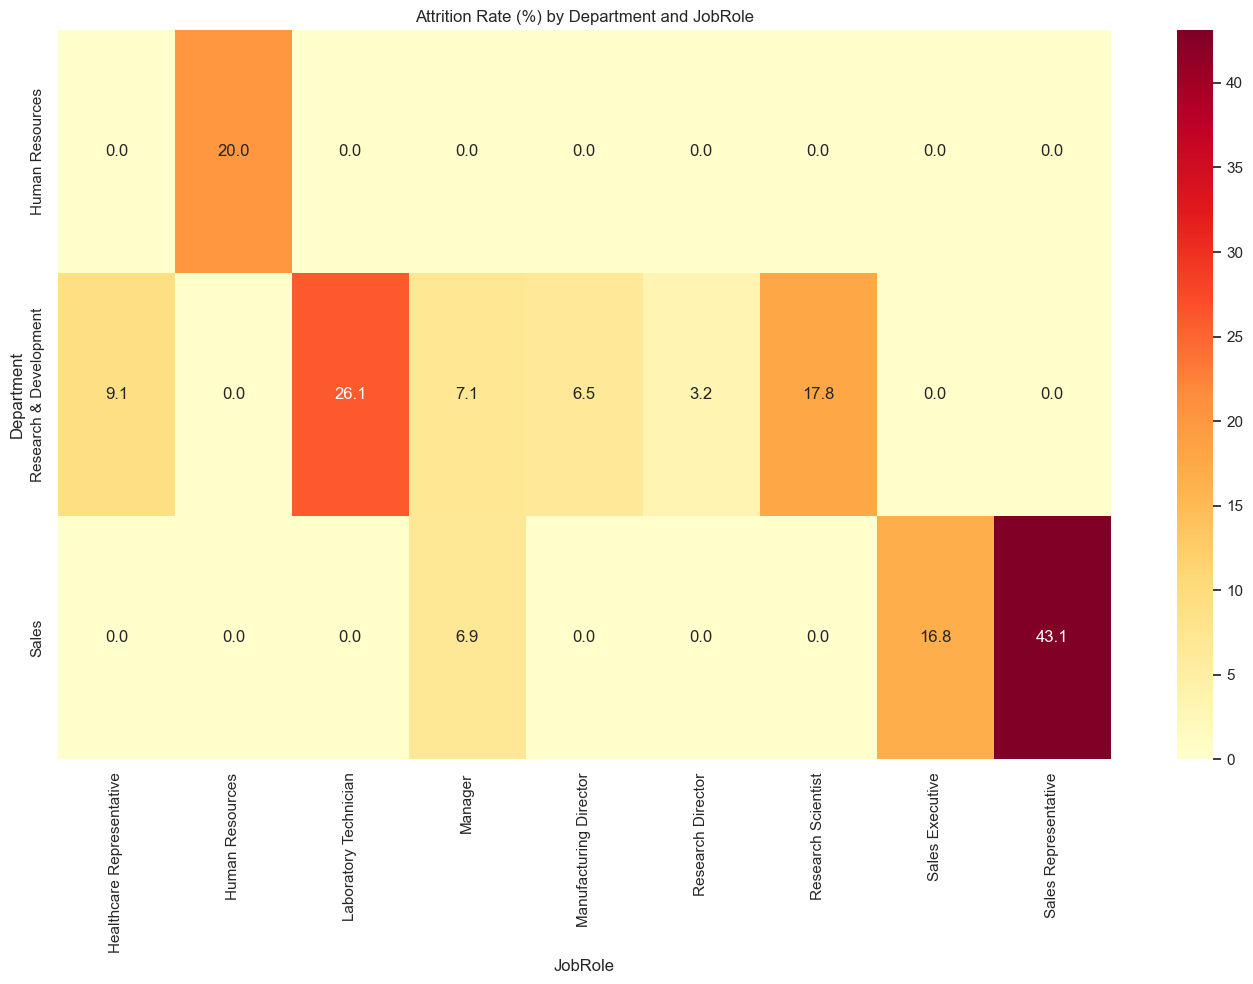


Attrition Rate by OverTime and MaritalStatus:


MaritalStatus  Divorced  Married  Single
OverTime                                
No                 6.51     8.21   17.00
Yes               16.44    25.93   51.52

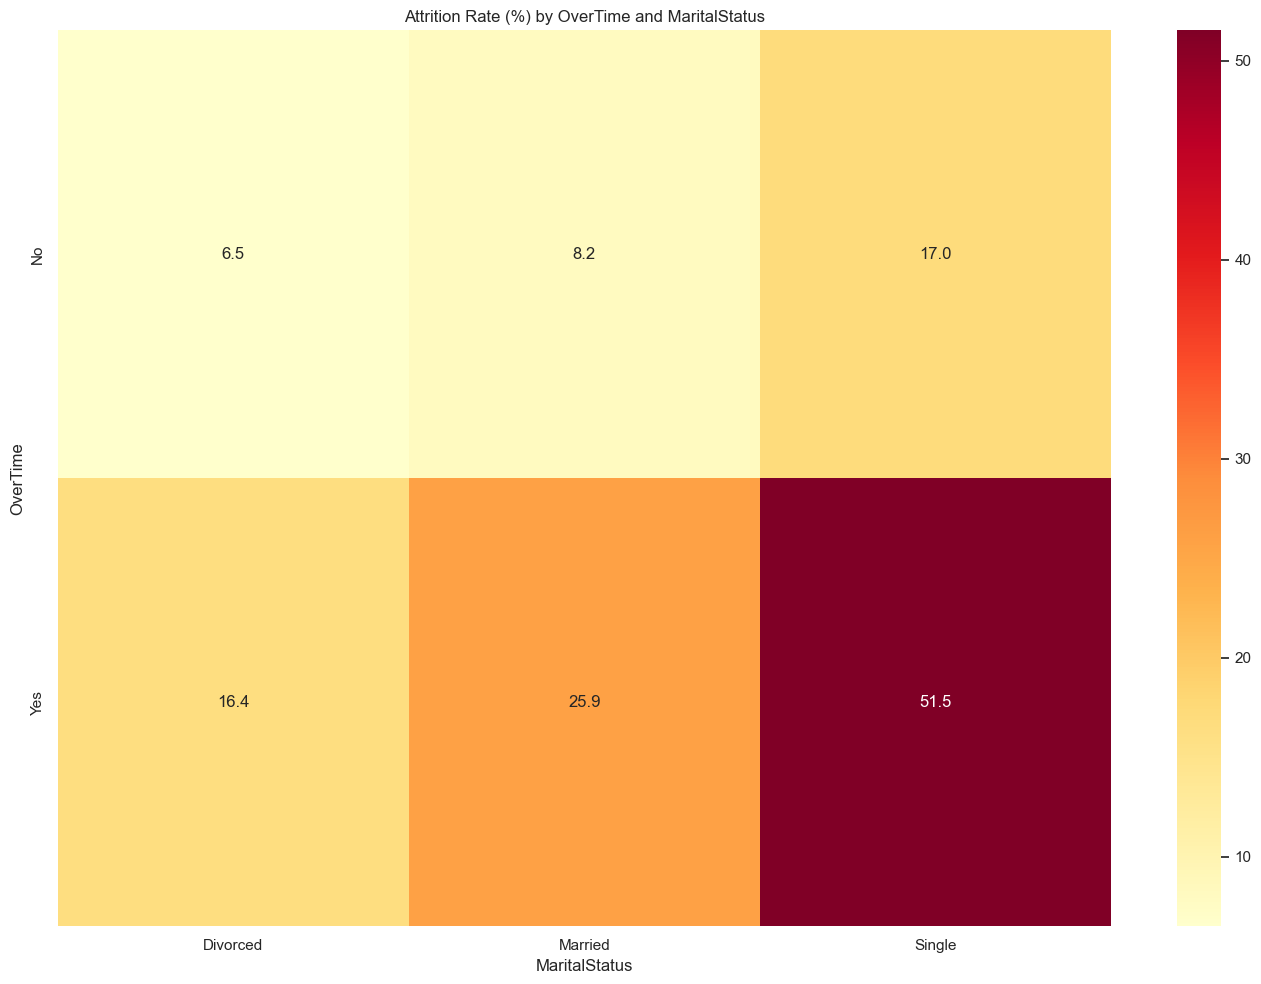


Attrition Rate by JobSatisfaction and WorkLifeBalance:


WorkLifeBalance      1      2      3      4
JobSatisfaction                            
1                44.44  16.28  22.48  25.00
2                36.36  14.29  13.56  25.00
3                35.71  24.32  17.77  12.12
4                22.73  15.22   7.22  18.75

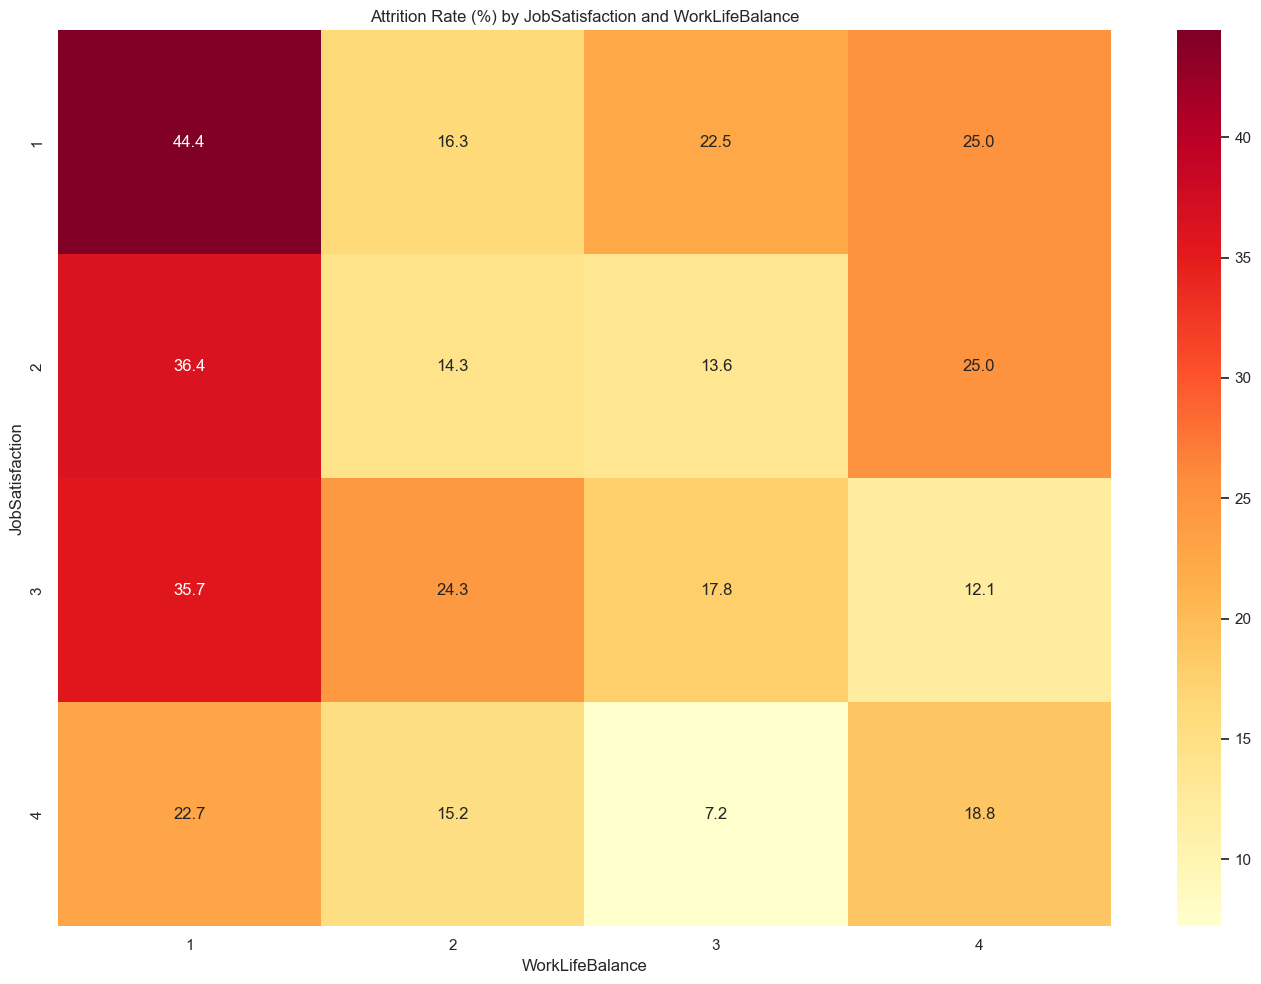


Attrition Rate by JobLevel and JobSatisfaction:


JobSatisfaction      1      2      3      4
JobLevel                                   
1                40.85  28.00  29.75  17.32
2                12.86   6.56  16.96   4.13
3                15.38  13.33  11.36  19.23
4                 6.25   6.25   5.00   3.57
5                11.11  15.38   4.76   8.33

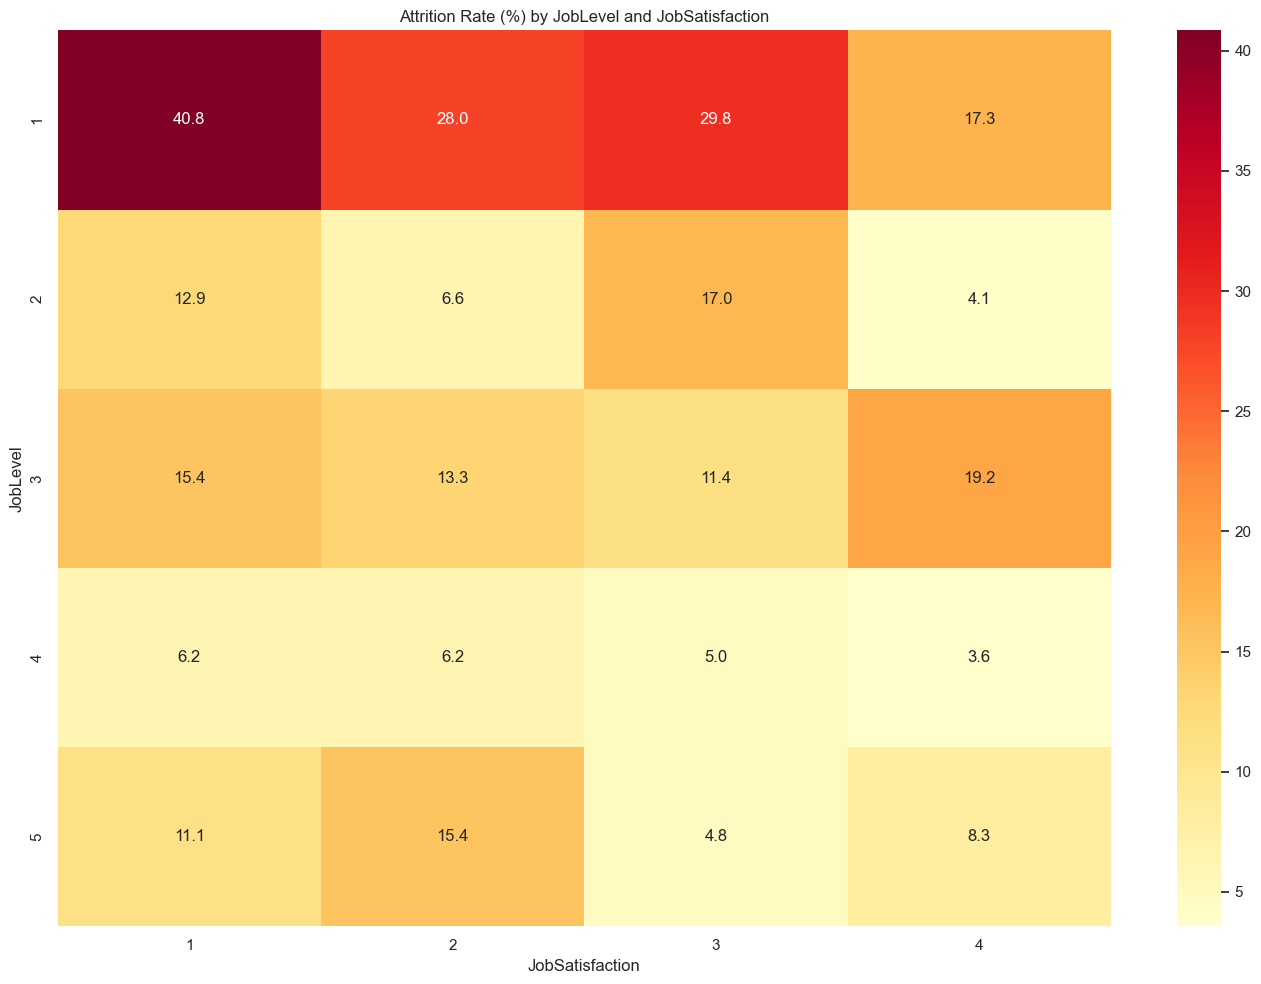


Attrition Rate by Age_Bin and YearsAtCompany_Bin:


YearsAtCompany_Bin    0-2    3-5   6-10    10+
Age_Bin                                       
18-30               43.42  17.53  19.51  10.00
31-40               28.40  17.54   8.97   7.32
41-50               11.90  11.67  14.52   6.90
50+                 11.76   8.57  13.89  13.33

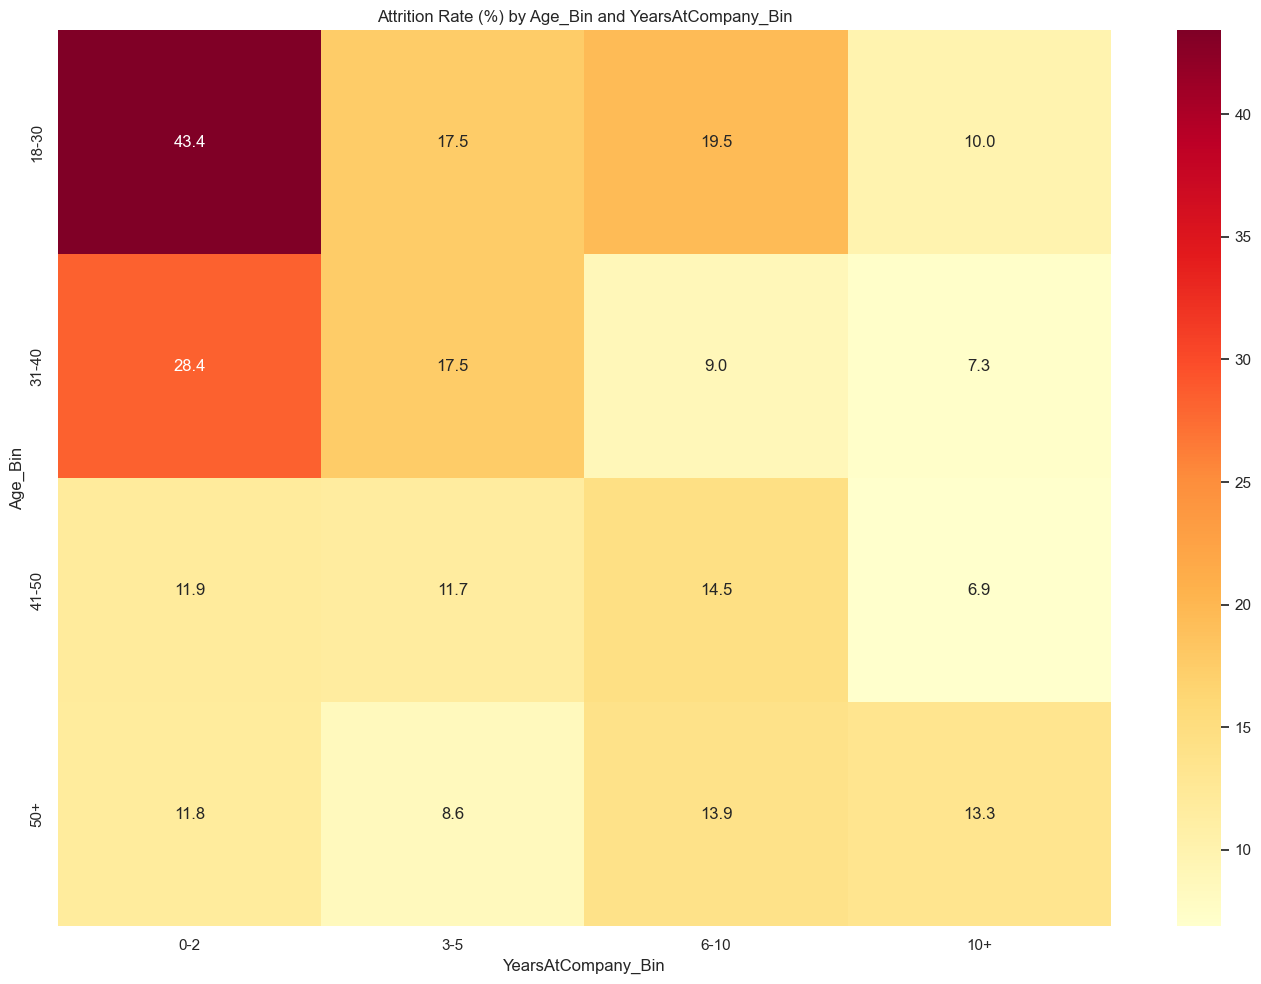

In [774]:
# 4.2 Multi-factor Analysis of Attrition

# Various multi-factor combinations for attrition
attrition_combos = [
    ('Department', 'JobRole'),
    ('OverTime', 'MaritalStatus'),
    ('JobSatisfaction', 'WorkLifeBalance'),
    ('JobLevel', 'JobSatisfaction'),
    ('Age', 'YearsAtCompany')  # Will be binned
]

for combo in attrition_combos:
    if all(var in df.columns for var in combo):
        # Handle numerical variables by binning them
        factors = list(combo)  # Create a copy to possibly modify
        
        for i, var in enumerate(combo):
            if df[var].dtype in ['int64', 'float64'] and df[var].nunique() > 10:
                # Create bins for the variable
                if var == 'Age':
                    bins = [18, 30, 40, 50, 100]
                    labels = ['18-30', '31-40', '41-50', '50+']
                    df[f'{var}_Bin'] = pd.cut(df[var], bins=bins, labels=labels)
                elif var == 'YearsAtCompany':
                    bins = [0, 2, 5, 10, 40]
                    labels = ['0-2', '3-5', '6-10', '10+']
                    df[f'{var}_Bin'] = pd.cut(df[var], bins=bins, labels=labels)
                else:
                    df[f'{var}_Bin'] = pd.qcut(df[var], 4, duplicates='drop')
                
                factors[i] = f'{var}_Bin'  # Replace original var with binned var
        
        # Create contingency table
        contingency_table = pd.crosstab([df[factors[0]], df[factors[1]]], df['Attrition'])
        
        # Calculate attrition rate
        attrition_rate = contingency_table[1] / (contingency_table[0] + contingency_table[1]) * 100
        
        print(f"\nAttrition Rate by {factors[0]} and {factors[1]}:")
        display(attrition_rate.unstack().fillna(0).round(2))
        
        # Visualize with heatmap
        plt.figure(figsize=(14, 10))
        sns.heatmap(attrition_rate.unstack().fillna(0), annot=True, cmap='YlOrRd', fmt='.1f')
        plt.title(f'Attrition Rate (%) by {factors[0]} and {factors[1]}')
        plt.tight_layout()
        plt.show()

**Key insight:**
1. Attrition Rate by Department and Job Role
    - Sales Representative memiliki attrition rate tertinggi (43.1%), menunjukkan potensi masalah dalam peran ini.

    - Di Research & Development, posisi Laboratory Technician menunjukkan attrition tinggi (26.1%).

    - Peran manajerial (Manager) memiliki attrition relatif rendah (~6-7%) di seluruh departemen.

2. Attrition Rate by OverTime and Marital Status
    - Karyawan lajang (Single) yang bekerja lembur (OverTime) mengalami attrition sangat tinggi (51.5%).

    - Karyawan tanpa lembur memiliki attrition yang jauh lebih rendah, menunjukkan pentingnya keseimbangan kerja-hidup.

3. Attrition Rate by Job Satisfaction and Work-Life Balance
    - Karyawan dengan Job Satisfaction rendah (1) dan Work-Life Balance buruk (1) menunjukkan attrition tertinggi (44.4%).

    - Attrition turun signifikan seiring meningkatnya kepuasan kerja dan keseimbangan hidup.

4. Attrition Rate by Job Level and Job Satisfaction
    - Job Level 1 (entry level) mengalami attrition tertinggi, terutama bila digabung dengan Job Satisfaction rendah.

    - Attrition cenderung menurun pada level manajerial (Job Level 4-5) terlepas dari kepuasan kerja.

5. Attrition Rate by Age Bin and Years At Company
    - Kelompok usia 18–30 tahun dan masa kerja 0–2 tahun menunjukkan attrition sangat tinggi (43.4%).

    - Semakin lama masa kerja, semakin rendah tingkat attrition di semua kelompok usia.

<Figure size 1400x1200 with 0 Axes>

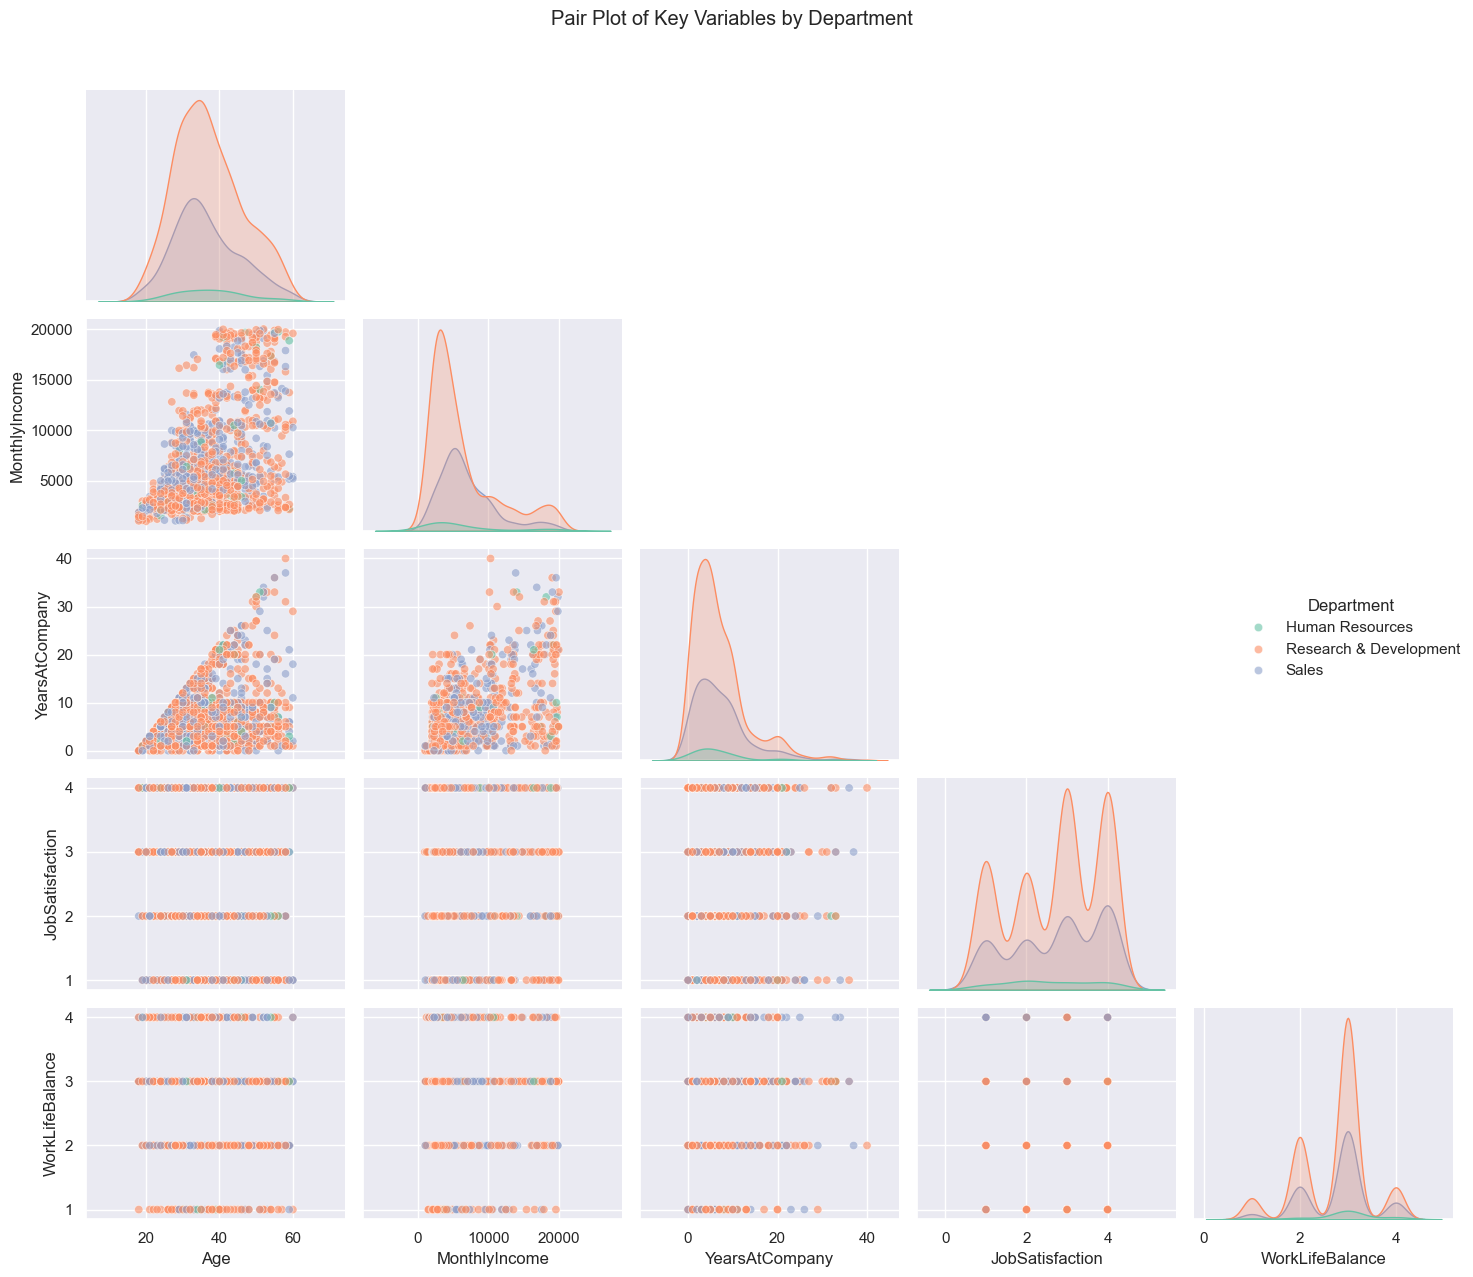

<Figure size 1400x1200 with 0 Axes>

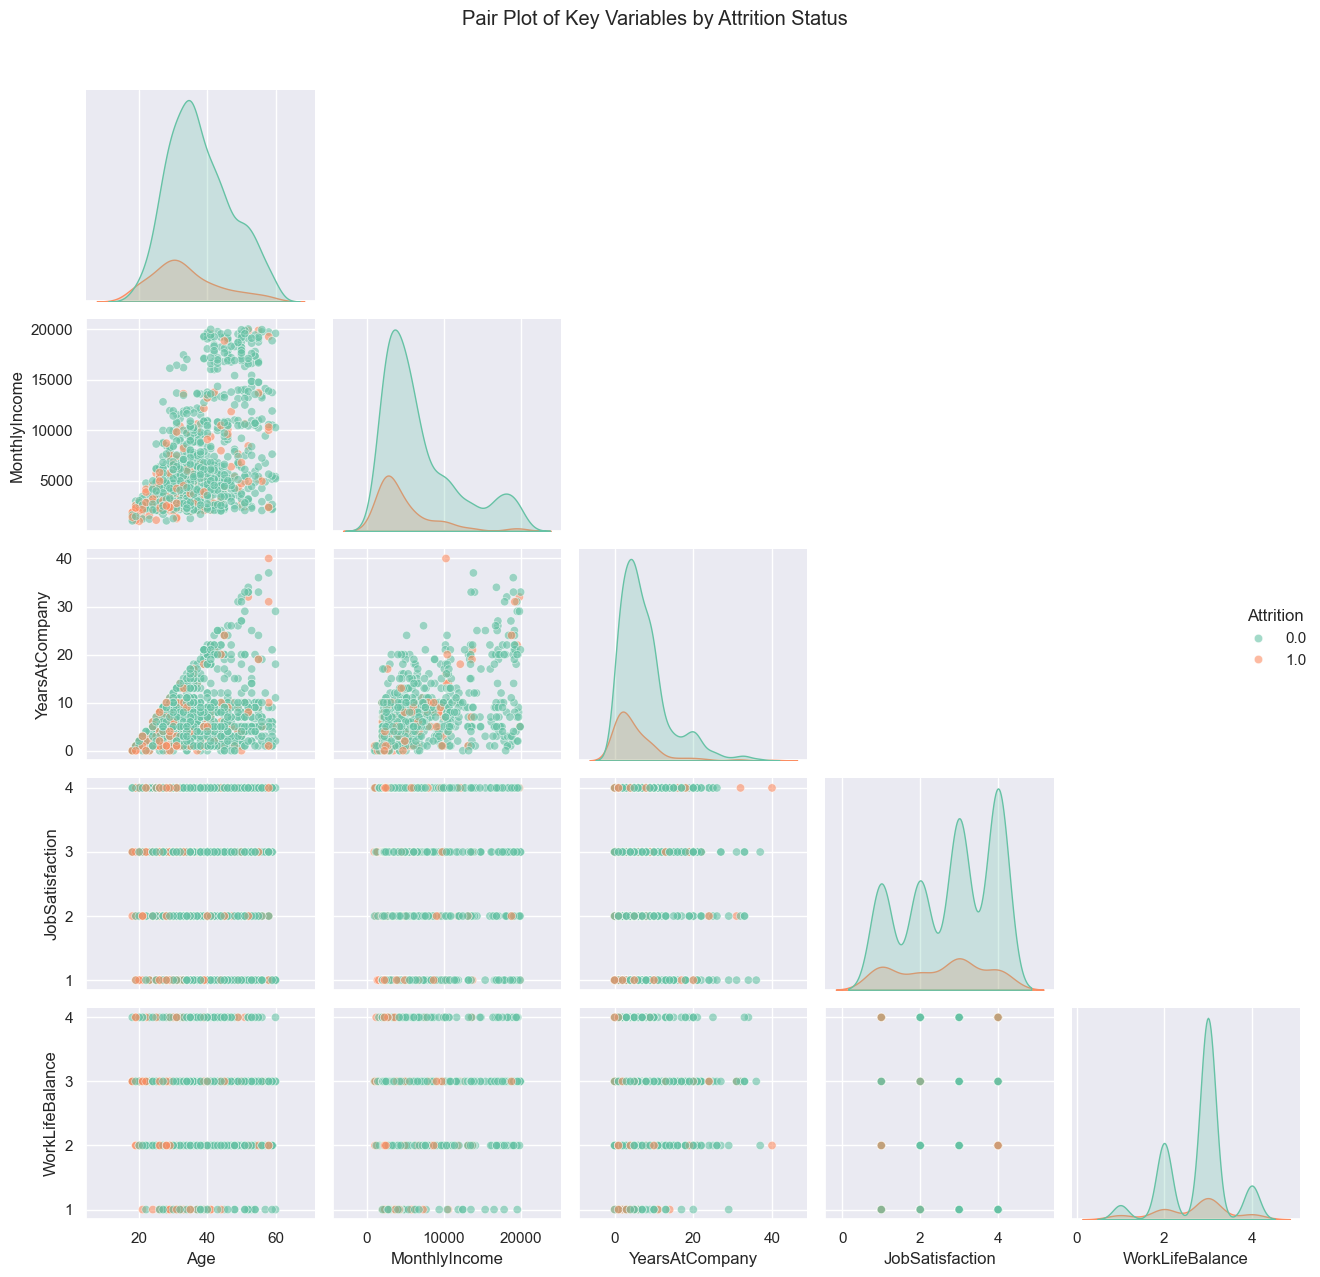

In [776]:
# 4.3 Advanced Multivariate Analysis: Pair Plots

# Select a subset of important variables for pair plots
pair_vars = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance']
pair_vars_available = [var for var in pair_vars if var in df.columns]

if len(pair_vars_available) >= 3:
    # Create pair plot with Department as hue if available
    if 'Department' in df.columns:
        # If Department has few categories
        if df['Department'].nunique() <= 5:
            plt.figure(figsize=(14, 12))
            sns.pairplot(df[pair_vars_available + ['Department']], hue='Department', 
                        corner=True, diag_kind='kde', plot_kws={'alpha': 0.6})
            plt.suptitle('Pair Plot of Key Variables by Department', y=1.02)
            plt.tight_layout()
            plt.show()
    
    # Create pair plot with Attrition as hue if available
    if 'Attrition' in df.columns:
        plt.figure(figsize=(14, 12))
        sns.pairplot(df[pair_vars_available + ['Attrition']], hue='Attrition', 
                    corner=True, diag_kind='kde', plot_kws={'alpha': 0.6})
        plt.suptitle('Pair Plot of Key Variables by Attrition Status', y=1.02)
        plt.tight_layout()
        plt.show()

#### Correlation Analysis

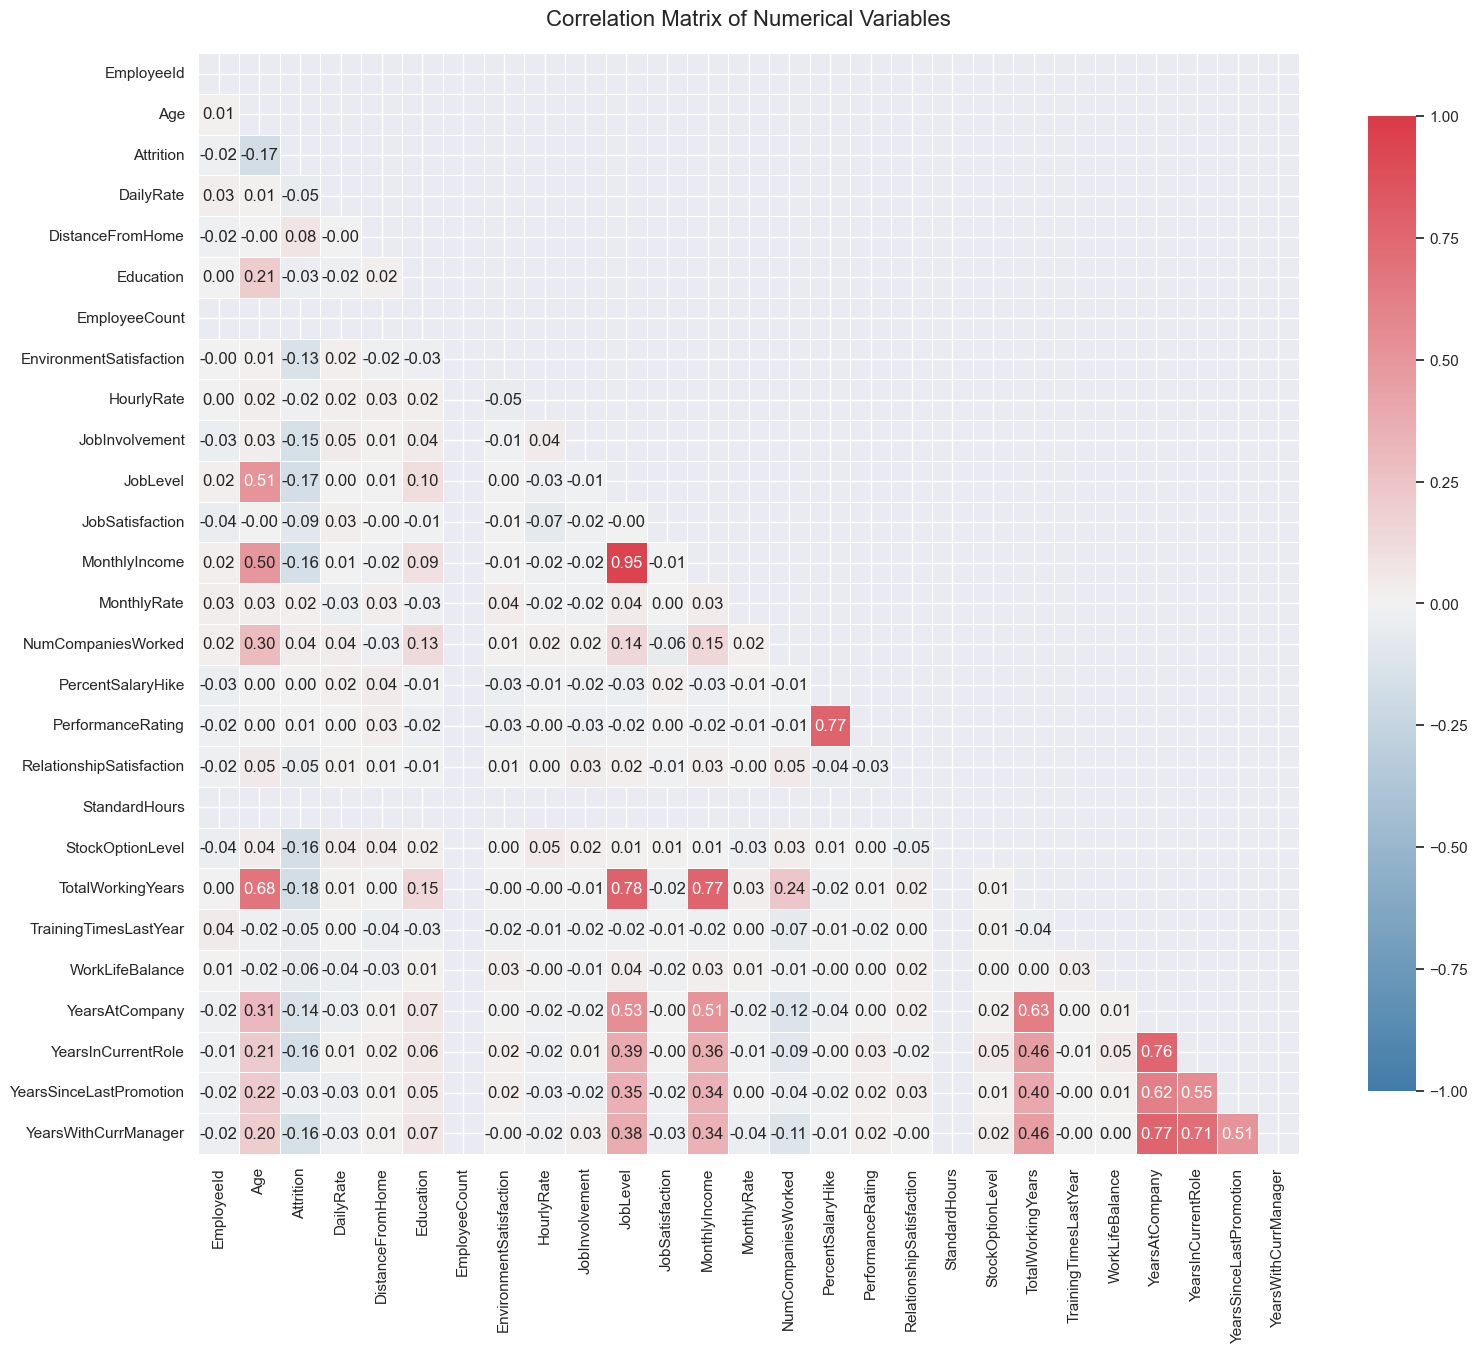

In [778]:
# 5.1 Correlation Matrix

# Select only numerical columns for correlation analysis
num_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = num_df.corr()

# Create a heatmap with improved aesthetics
plt.figure(figsize=(16, 14))
mask = np.triu(correlation_matrix)
cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix of Numerical Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

**Key insight:**
1. Korelasi dengan Attrition (Pengunduran Diri):
    - Attrition & MonthlyIncome: -0.17 → Korelasi negatif moderat. Karyawan dengan gaji lebih rendah lebih cenderung resign.

    - Attrition & JobLevel: -0.17 → Job level lebih rendah berhubungan dengan tingkat resign lebih tinggi.

    - Attrition & TotalWorkingYears: -0.18 → Karyawan dengan pengalaman kerja lebih sedikit lebih rentan mengundurkan diri.

    - Korelasi lainnya dengan attrition (misal: YearsAtCompany, YearsInCurrentRole, dll) juga sedikit negatif.
    
    Kesimpulan: Attrition berkorelasi negatif paling signifikan dengan income, job level, dan pengalaman kerja.

2. Hubungan Internal Variabel Pendapatan:
    - MonthlyIncome & JobLevel: +0.95 → Sangat kuat. Semakin tinggi jabatan, semakin tinggi penghasilan.

    - MonthlyIncome & TotalWorkingYears: +0.78, MonthlyIncome & YearsAtCompany: +0.53

    - PerformanceRating & PercentSalaryHike: +0.77 → Logis, karena kenaikan gaji sering bergantung pada rating kinerja.

    Kesimpulan: Pendapatan sangat dipengaruhi oleh level jabatan dan pengalaman kerja.

3. Korelasi Durasi Kerja Internal

    YearsAtCompany sangat berkorelasi dengan:

    - YearsInCurrentRole: +0.76

    - YearsWithCurrManager: +0.71

    - YearsSinceLastPromotion: +0.60
    
    Kesimpulan: Masa kerja di perusahaan secara umum memengaruhi masa kerja dalam peran saat ini, masa sejak promosi terakhir, dan lama bersama manajer.

4. Variabel yang Tidak Signifikan Secara Korelasi

EmployeeCount dan StandardHours memiliki korelasi nol dengan semua variabel lain — bisa jadi kandidat untuk dihapus dalam model prediktif (low information value).

## Data Preparation / Preprocessing

Pada tahap preprocessing, kita akan mempersiapkan data agar siap digunakan untuk pemodelan. Tujuan utama dari tahap ini adalah untuk membersihkan data, menangani nilai yang hilang, menghapus fitur yang tidak relevan, mengubah data kategorikal menjadi bentuk numerik, dan melakukan feature engineering.

Berdasarkan analisis yang telah kita lakukan pada tahap Data Understanding, terdapat beberapa langkah preprocessing yang perlu dilakukan:

1. **Penanganan Missing Value**: Khususnya pada kolom Attrition (target variable) yang memiliki 412 nilai hilang
2. **Penghapusan Fitur Tidak Relevan**: Menghapus kolom yang tidak memiliki variasi atau tidak memberikan informasi yang berguna
3. **Penyimpanan Data ke Database**: Menyimpan data yang telah dibersihkan ke Supabase untuk keperluan visualisasi dashboard
4. **Encoding Data Kategorikal**: Mengubah data kategorikal menjadi numerik agar dapat diproses oleh algoritma machine learning
5. **Feature Engineering**: Membuat fitur baru yang dapat meningkatkan performa model

Mari kita lakukan langkah-langkah tersebut secara berurutan.

### Handling Missing Value

Pada tahap exploratory data analysis, kita menemukan bahwa kolom Attrition memiliki 412 nilai yang hilang (missing value), atau sekitar 28% dari total data. Karena Attrition adalah variabel target yang akan kita prediksi, kita perlu menangani missing value ini dengan tepat.

Ada beberapa pendekatan dalam menangani missing value:
1. **Drop rows**: Menghapus baris yang mengandung missing value
2. **Imputasi**: Mengisi missing value dengan nilai tertentu (mean, median, modus, dll)
3. **Prediksi**: Membuat model untuk memprediksi missing value

Untuk kasus ini, kita akan menggunakan pendekatan pertama yaitu menghapus baris dengan missing value pada kolom Attrition. Alasannya:
- Persentase missing value masih di bawah 50%, sehingga masih cukup banyak data valid yang tersisa
- Attrition adalah variabel target, sehingga imputasi nilai dapat menimbulkan bias dalam model
- Menghapus baris dengan missing value lebih baik daripada mengisi nilai sembarangan pada variabel target

Berikut langkah untuk menghapus baris dengan missing value pada kolom Attrition:

In [784]:
# menghapus nama missing value
df = df.dropna(subset=['Attrition'])
print("Jumlah nilai yang hilang pada kolom Attrition:", df["Attrition"].isna().sum())

Jumlah nilai yang hilang pada kolom Attrition: 0


Setelah menghapus baris dengan missing value, kita memeriksa kembali kolom Attrition untuk memastikan tidak ada lagi nilai yang hilang. Hasilnya menunjukkan bahwa semua missing value telah berhasil ditangani. Dataset kita sekarang berisi 1058 baris data yang valid dan siap untuk diproses lebih lanjut.

### Drop Fitur yang Tidak Relevan

Berdasarkan hasil analisis data, terdapat beberapa fitur yang tidak memberikan informasi yang berguna untuk model prediksi attrition. Fitur-fitur ini memiliki karakteristik berikut:

1. **Tidak memiliki variasi (konstan)**: Fitur yang nilainya sama untuk semua karyawan tidak membantu dalam membedakan karyawan yang akan resign dan tidak
2. **Tidak relevan dengan prediksi attrition**: Fitur yang secara logis tidak terkait dengan keputusan karyawan untuk resign

Fitur yang akan kita hapus meliputi:

- **EmployeeCount**: Selalu bernilai 1 untuk semua karyawan (tidak ada variasi)
- **Over18**: Selalu bernilai 'Y' karena semua karyawan berusia di atas 18 tahun (tidak ada variasi)
- **StandardHours**: Selalu bernilai 80 untuk semua karyawan (tidak ada variasi)

Penghapusan fitur yang tidak relevan akan membuat model lebih sederhana, mengurangi dimensi data, dan membantu mencegah overfitting. Mari kita hapus ketiga fitur tersebut:

In [788]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'Age_Bin', 'YearsAtCompany_Bin'], inplace=True)
print('Kolom yang tersisa:', df.columns)

Kolom yang tersisa: Index(['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


Setelah menghapus ketiga kolom yang tidak relevan, dataset kita menjadi lebih ringkas. Parameter `inplace=True` memastikan perubahan langsung diterapkan pada DataFrame asli tanpa perlu membuat salinan baru. Output menampilkan daftar kolom yang tersisa, yang akan digunakan untuk analisis dan pemodelan selanjutnya.

### Import DataFrame to Supabase

Sebagai bagian dari proyek, kita akan menggunakan Supabase (database PostgreSQL berbasis cloud) untuk menyimpan data karyawan. Data ini nantinya akan digunakan untuk membuat dashboard interaktif menggunakan Metabase, yang memungkinkan visualisasi dan eksplorasi data lebih lanjut.

Langkah ini dilakukan sebelum encoding data kategorikal, karena:
1. Data kategorikal dalam format asli lebih mudah dibaca dan dipahami dalam dashboard
2. Pengguna dashboard mungkin tidak familiar dengan bentuk data yang sudah di-encoding

Berikut adalah langkah-langkah untuk mengimpor DataFrame ke Supabase:

1. Membuat koneksi ke database Supabase menggunakan SQLAlchemy
2. Mengonversi DataFrame menjadi tabel SQL
3. Memverifikasi data yang telah disimpan

In [ ]:
from sqlalchemy import create_engine
import os

# Fetch variables
USER = ... #USERNAME
PASSWORD = ... #PASWORD
HOST = ... #HOSTNAME
PORT = ... #PORT 
DBNAME = ... #DBNAME

# Construct the SQLAlchemy connection string
DATABASE_URL = f"postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}?gssencmode=disable"

# Create the SQLAlchemy engine
engine = create_engine(DATABASE_URL)


# Test the connection
try:
    with engine.connect() as connection:
        print("Connection successful!")
except Exception as e:
    print(f"Failed to connect: {e}")

Connection successful!


In [793]:
# import data ke supabase
clean_df = df.copy()
clean_df.to_sql('employees', engine, if_exists='replace', index=False)

58

Kode di atas melakukan beberapa hal:
1. Mengimpor modul `psycopg2` (driver PostgreSQL untuk Python) dan `create_engine` dari SQLAlchemy
2. Membuat salinan dari DataFrame untuk pengamanan data
3. Menyiapkan string koneksi URL ke database Supabase dengan kredensial yang diperlukan
4. Membuat engine koneksi SQLAlchemy
5. Mengonversi DataFrame menjadi tabel SQL bernama 'employees' di database Supabase

Setelah menjalankan kode ini, data karyawan telah berhasil disimpan ke database Supabase dan siap diakses oleh aplikasi dashboard Metabase.

Selanjutnya, mari kita verifikasi data yang telah disimpan dengan mengambil beberapa baris pertama dari tabel di database:

In [795]:
# cek sql tabel pada engine
employees_df = pd.read_sql_table(table_name="employees", con=engine.connect())
employees_df.head(5)

EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
0           2   37        1.0      Travel_Rarely       1141   
1           3   51        1.0      Travel_Rarely       1323   
2           4   42        0.0  Travel_Frequently        555   
3           7   40        0.0      Travel_Rarely       1124   
4           8   55        1.0      Travel_Rarely        725   

               Department  DistanceFromHome  Education EducationField  \
0  Research & Development                11          2        Medical   
1  Research & Development                 4          4  Life Sciences   
2                   Sales                26          3      Marketing   
3                   Sales                 1          2        Medical   
4  Research & Development                 2          3        Medical   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        1  Female          61               1         2   
1                        1    Male          34               3         1   
2                        3  Female          77               3         4   
3                        2    Male          57               1         2   
4                        4    Male          78               3         5   

                     JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0  Healthcare Representative                2       Married           4777   
1         Research Scientist                3       Married           2461   
2            Sales Executive                2       Married          13525   
3            Sales Executive                4       Married           7457   
4                    Manager                1       Married          19859   

   MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
0        14382                   5       No                 15   
1        10332                   9      Yes                 12   
2        14864                   5       No                 14   
3        13273                   2      Yes                 22   
4        21199                   5      Yes                 13   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  3                         3                 3   
2                  3                         4                 1   
3                  4                         3                 3   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 15                      2                1               1   
1                 18                      2                4              10   
2                 23                      2                4              20   
3                  6                      2                2               4   
4                 24                      2                3               5   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   0                        0                     0  
1                   0                        2                     7  
2                   4                        4                     8  
3                   3                        0                     2  
4                   2                        1                     4

Output di atas menampilkan 5 baris pertama dari data yang telah disimpan di database Supabase. Dengan ini, kita memastikan bahwa data telah berhasil disimpan dan dapat diakses untuk keperluan visualisasi dashboard.

Langkah berikutnya dalam proses preprocessing adalah melakukan encoding pada data kategorikal, yang diperlukan untuk pemodelan machine learning.

### Encoding Data Kategorikal

Algoritma machine learning umumnya bekerja dengan data numerik, sehingga kita perlu mengubah (encoding) variabel kategorikal menjadi bentuk numerik. Ada beberapa teknik encoding yang umum digunakan:

1. **Label Encoding**: Mengubah setiap kategori menjadi angka unik (misal: 'Male' → 0, 'Female' → 1)
2. **One-Hot Encoding**: Membuat kolom dummy untuk setiap kategori (1 jika termasuk kategori, 0 jika tidak)
3. **Binary Encoding**: Menggunakan representasi biner untuk mengkodekan kategori
4. **Target Encoding**: Mengganti kategori dengan rata-rata nilai target untuk kategori tersebut

Untuk kasus ini, kita akan menggunakan Label Encoding karena:
- Simpel dan efisien untuk dataset dengan jumlah kategori yang relatif kecil
- Algoritma berbasis pohon (seperti ExtraTreesClassifier dan RandomForest) yang akan kita gunakan tidak terlalu sensitif terhadap ordinalitas yang dihasilkan label encoding

Yang penting, kita akan menyimpan encoder untuk setiap kolom kategorikal, sehingga nantinya kita dapat mengembalikan (inverse transform) nilai numerik ke kategori aslinya jika diperlukan.

Berikut langkah-langkah encoding data kategorikal menggunakan LabelEncoder:

In [799]:
le_dict = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # Simpan encoder untuk inverse transform

Kode di atas melakukan proses encoding untuk setiap kolom kategorikal (tipe data 'object') dalam DataFrame:

1. Membuat dictionary kosong `le_dict` untuk menyimpan encoder
2. Mengiterasi setiap kolom bertipe data 'object' (kategorikal)
3. Untuk setiap kolom, membuat instance LabelEncoder baru
4. Melakukan fit_transform untuk mengubah nilai kategorikal menjadi numerik
5. Menyimpan encoder ke dalam dictionary dengan kunci nama kolom

Mari kita melihat hasil encoding dengan menampilkan beberapa baris pertama dari DataFrame:

In [801]:
df.head()

EmployeeId  Age  Attrition  BusinessTravel  DailyRate  Department  \
1           2   37        1.0               2       1141           1   
2           3   51        1.0               2       1323           1   
3           4   42        0.0               1        555           2   
6           7   40        0.0               2       1124           2   
7           8   55        1.0               2        725           1   

   DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
1                11          2               3                        1   
2                 4          4               1                        1   
3                26          3               2                        3   
6                 1          2               3                        2   
7                 2          3               3                        4   

   Gender  HourlyRate  JobInvolvement  JobLevel  JobRole  JobSatisfaction  \
1       0          61               1         2        0                2   
2       1          34               3         1        6                3   
3       0          77               3         4        7                2   
6       1          57               1         2        7                4   
7       1          78               3         5        3                1   

   MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
1              1           4777        14382                   5         0   
2              1           2461        10332                   9         1   
3              1          13525        14864                   5         0   
6              1           7457        13273                   2         1   
7              1          19859        21199                   5         1   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1                 15                  3                         1   
2                 12                  3                         3   
3                 14                  3                         4   
6                 22                  4                         3   
7                 13                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1                 0                 15                      2   
2                 3                 18                      2   
3                 1                 23                      2   
6                 3                  6                      2   
7                 1                 24                      2   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1                1               1                   0   
2                4              10                   0   
3                4              20                   4   
6                2               4                   3   
7                3               5                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
1                        0                     0  
2                        2                     7  
3                        4                     8  
6                        0                     2  
7                        1                     4

Sekarang semua data kategorikal telah diubah menjadi bentuk numerik. Untuk memahami cara pengkodean yang dilakukan, kita perlu melihat bagaimana setiap nilai kategori dipetakan ke nilai numerik.

In [803]:
for key in le_dict:
    le = le_dict[key]
    # Lihat mapping label → angka
    print(f"Mapping {key} (label -> number):")
    for idx, label in enumerate(le.classes_):
        print(f"{label} -> {idx}")
    print()

Mapping BusinessTravel (label -> number):
Non-Travel -> 0
Travel_Frequently -> 1
Travel_Rarely -> 2

Mapping Department (label -> number):
Human Resources -> 0
Research & Development -> 1
Sales -> 2

Mapping EducationField (label -> number):
Human Resources -> 0
Life Sciences -> 1
Marketing -> 2
Medical -> 3
Other -> 4
Technical Degree -> 5

Mapping Gender (label -> number):
Female -> 0
Male -> 1

Mapping JobRole (label -> number):
Healthcare Representative -> 0
Human Resources -> 1
Laboratory Technician -> 2
Manager -> 3
Manufacturing Director -> 4
Research Director -> 5
Research Scientist -> 6
Sales Executive -> 7
Sales Representative -> 8

Mapping MaritalStatus (label -> number):
Divorced -> 0
Married -> 1
Single -> 2

Mapping OverTime (label -> number):
No -> 0
Yes -> 1



Output di atas menunjukkan mapping (pemetaan) dari setiap nilai kategori ke angka yang sesuai untuk setiap kolom kategorikal. Informasi ini penting untuk:

1. Memahami urutan kategori yang dihasilkan oleh LabelEncoder
2. Menginterpretasikan hasil model dalam konteks nilai kategori asli
3. Melakukan inverse transform jika diperlukan pada tahap prediksi

Penyimpanan `le_dict` akan memudahkan kita untuk mengubah prediksi model kembali ke format yang lebih mudah dipahami oleh pengguna.

Setelah semua data kategorikal telah diubah menjadi numerik, kita dapat melanjutkan dengan standardisasi fitur numerik.

### Feature Engineering

Feature Engineering adalah proses pembuatan fitur baru dari fitur yang sudah ada untuk meningkatkan performa model. Fitur baru yang dibuat biasanya:

1. Lebih informatif daripada fitur asli
2. Menangkap pola atau hubungan yang tidak terlihat pada fitur asli
3. Sesuai dengan domain knowledge/pengetahuan bisnis

Berdasarkan analisis data dan domain knowledge tentang HR Analytics, kita akan membuat fitur baru **PotentialMonthlySalary** (Potensi Gaji Bulanan), yang dihitung dengan mengalikan jam kerja standar (80) dengan tarif per jam karyawan (HourlyRate).

Meskipun kita telah menghapus kolom StandardHours karena nilainya konstan (80 jam), kita tetap dapat menggunakan nilai ini untuk perhitungan yang lebih bermakna.

Fitur ini bisa memberikan wawasan tentang:
1. Perbandingan antara gaji bulanan aktual (MonthlyIncome) dengan potensi gaji berdasarkan tarif per jam
2. Kemungkinan adanya perbedaan kompensasi atau bonus di luar gaji standar
3. Faktor potensial yang dapat mempengaruhi keputusan karyawan untuk resign

Mari kita membuat fitur baru ini:

In [806]:
df['PotentialMonthlySalary'] = 80 * df['HourlyRate']
df.head()

EmployeeId  Age  Attrition  BusinessTravel  DailyRate  Department  \
1           2   37        1.0               2       1141           1   
2           3   51        1.0               2       1323           1   
3           4   42        0.0               1        555           2   
6           7   40        0.0               2       1124           2   
7           8   55        1.0               2        725           1   

   DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
1                11          2               3                        1   
2                 4          4               1                        1   
3                26          3               2                        3   
6                 1          2               3                        2   
7                 2          3               3                        4   

   Gender  HourlyRate  JobInvolvement  JobLevel  JobRole  JobSatisfaction  \
1       0          61               1         2        0                2   
2       1          34               3         1        6                3   
3       0          77               3         4        7                2   
6       1          57               1         2        7                4   
7       1          78               3         5        3                1   

   MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
1              1           4777        14382                   5         0   
2              1           2461        10332                   9         1   
3              1          13525        14864                   5         0   
6              1           7457        13273                   2         1   
7              1          19859        21199                   5         1   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1                 15                  3                         1   
2                 12                  3                         3   
3                 14                  3                         4   
6                 22                  4                         3   
7                 13                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1                 0                 15                      2   
2                 3                 18                      2   
3                 1                 23                      2   
6                 3                  6                      2   
7                 1                 24                      2   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1                1               1                   0   
2                4              10                   0   
3                4              20                   4   
6                2               4                   3   
7                3               5                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  PotentialMonthlySalary  
1                        0                     0                    4880  
2                        2                     7                    2720  
3                        4                     8                    6160  
6                        0                     2                    4560  
7                        1                     4                    6240

Kita telah berhasil membuat fitur baru 'PotentialMonthlySalary' yang merepresentasikan potensi gaji bulanan berdasarkan tarif per jam karyawan. Fitur ini menambah dimensi baru ke dataset kita dan dapat membantu model untuk lebih memahami faktor finansial yang mungkin mempengaruhi attrition karyawan.

Output menampilkan 5 baris pertama dari DataFrame yang sudah termasuk fitur baru ini.

### Standardisasi Fitur Numerik

Standardisasi adalah proses penting dalam machine learning, terutama untuk algoritma yang sensitif terhadap skala fitur. Standardisasi mentransformasi data sehingga memiliki mean 0 dan standar deviasi 1, yang membuat semua fitur berada pada skala yang sama.

Beberapa keuntungan standardisasi adalah:
1. **Konvergensi lebih cepat** untuk algoritma berbasis gradient descent
2. **Perbandingan fitur yang lebih adil**, tidak dipengaruhi oleh perbedaan satuan atau skala
3. **Peningkatan stabilitas numerik** dalam perhitungan 

Untuk kasus prediksi attrition ini, standardisasi penting karena fitur-fitur kita memiliki skala yang sangat berbeda (contoh: Age dalam puluhan, MonthlyIncome dalam ribuan), dan kita menggunakan algoritma yang dapat dipengaruhi oleh perbedaan skala.

Kita akan menggunakan `MinMaxScaler` dari scikit-learn untuk melakukan standardisasi:

In [809]:
# Standardisasi fitur numerik
scaler = MinMaxScaler()
numeric_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 
                   'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PotentialMonthlySalary']

# Terapkan StandardScaler pada kolom numerik
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("Hasil standardisasi (5 baris pertama):")
df.head()

Hasil standardisasi (5 baris pertama):


EmployeeId       Age  Attrition  BusinessTravel  DailyRate  Department  \
1           2  0.452381        1.0               2   0.743737           1   
2           3  0.785714        1.0               2   0.874016           1   
3           4  0.571429        0.0               1   0.324266           2   
6           7  0.523810        0.0               2   0.731568           2   
7           8  0.880952        1.0               2   0.445956           1   

   DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
1          0.357143          2               3                        1   
2          0.107143          4               1                        1   
3          0.892857          3               2                        3   
6          0.000000          2               3                        2   
7          0.035714          3               3                        4   

   Gender  HourlyRate  JobInvolvement  JobLevel  JobRole  JobSatisfaction  \
1       0    0.442857               1         2        0                2   
2       1    0.057143               3         1        6                3   
3       0    0.671429               3         4        7                2   
6       1    0.385714               1         2        7                4   
7       1    0.685714               3         5        3                1   

   MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
1              1       0.198420     0.493395            0.555556         0   
2              1       0.076461     0.330777            1.000000         1   
3              1       0.659084     0.512748            0.555556         0   
6              1       0.339547     0.448866            0.222222         1   
7              1       0.992628     0.767115            0.555556         1   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1           0.285714                  3                         1   
2           0.071429                  3                         3   
3           0.214286                  3                         4   
6           0.785714                  4                         3   
7           0.142857                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1                 0              0.375               0.333333   
2                 3              0.450               0.333333   
3                 1              0.575               0.333333   
6                 3              0.150               0.333333   
7                 1              0.600               0.333333   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1                1           0.025            0.000000   
2                4           0.250            0.000000   
3                4           0.500            0.222222   
6                2           0.100            0.166667   
7                3           0.125            0.111111   

   YearsSinceLastPromotion  YearsWithCurrManager  PotentialMonthlySalary  
1                 0.000000              0.000000                0.442857  
2                 0.133333              0.411765                0.057143  
3                 0.266667              0.470588                0.671429  
6                 0.000000              0.117647                0.385714  
7                 0.066667              0.235294                0.685714

Kode di atas melakukan standardisasi pada semua fitur numerik dalam dataset:

1. Membuat instance `StandardScaler()` yang akan mentransformasi data numerik sehingga memiliki mean 0 dan standar deviasi 1
2. Mengidentifikasi kolom-kolom numerik (tipe data int64 dan float64) dalam DataFrame
3. Menerapkan transformasi standardisasi pada kolom-kolom numerik dengan metode `fit_transform()`
4. Menampilkan hasil standardisasi (5 baris pertama)

Perhatikan bahwa setelah standardisasi, nilai-nilai dalam kolom numerik telah berubah menjadi nilai z-score yang umumnya berkisar antara -3 dan +3. Nilai yang lebih besar atau kecil dari rentang ini menunjukkan outlier potensial.

StandardScaler akan disimpan nanti bersama dengan model dan label encoder, sehingga saat melakukan prediksi pada data baru, kita dapat menerapkan transformasi yang sama.

### Ringkasan Preprocessing

Setelah melakukan semua langkah preprocessing di atas, dataset kita sekarang:
1. Tidak memiliki missing value pada kolom target (Attrition)
2. Tidak memiliki fitur yang tidak relevan atau tidak bervariasi
3. Memiliki semua data kategorikal yang telah diubah menjadi bentuk numerik dan persebaran fitur numerik distandarisasikan ke dalam range 0-1.
4. Memiliki fitur tambahan dari hasil feature engineering
5. Tersimpan di database Supabase untuk keperluan visualisasi dashboard

Dataset yang telah melalui preprocessing ini siap untuk digunakan dalam tahap pemodelan machine learning.

## Modeling

Pada bagian ini, kita akan membangun model machine learning untuk memprediksi kemungkinan seorang karyawan akan resign (attrition). Pemodelan adalah tahap inti dari proses data science, di mana kita menggunakan data yang telah dipersiapkan untuk membuat model prediktif yang dapat memberikan insight bernilai bagi perusahaan.

Tujuan utama dari pemodelan pada kasus ini adalah untuk:

1. Mengidentifikasi karyawan yang berisiko tinggi untuk resign
2. Memahami faktor-faktor utama yang mempengaruhi keputusan resign karyawan
3. Memberikan dasar bagi tim HR untuk mengembangkan strategi retensi karyawan yang lebih efektif

Proses pemodelan akan dilakukan dalam beberapa langkah sebagai berikut:
1. Memisahkan fitur (variabel independen) dan target (variabel dependen)
2. Membagi data menjadi set pelatihan dan pengujian
3. Melatih dan menguji beberapa model klasifikasi
4. Mengevaluasi performa model berdasarkan metrik yang relevan
5. Mengidentifikasi fitur-fitur penting yang mempengaruhi attrition

Mari kita lakukan langkah-langkah tersebut secara berurutan.

### Inisiasi Variabel Fitur (X) dan Target (y)

Langkah pertama dalam pemodelan adalah memisahkan dataset menjadi variabel fitur (prediktor) dan variabel target. Variabel fitur adalah semua kolom yang akan digunakan untuk memprediksi, sementara variabel target adalah kolom yang nilainya ingin kita prediksi.

Dalam kasus ini:
- **Variabel Fitur (X)**: Semua kolom kecuali 'Attrition', termasuk data demografi karyawan, informasi pekerjaan, kompensasi, kepuasan kerja, dll.
- **Variabel Target (y)**: Kolom 'Attrition' yang berisi informasi apakah karyawan resign (1) atau tidak (0)

Pemisahan ini penting karena algoritma machine learning akan belajar mencari pola antara variabel fitur (X) dan variabel target (y), dengan tujuan membuat model yang dapat memprediksi nilai y berdasarkan nilai X yang diberikan.

Sebelum melakukan pemodelan, langkah pertama yang perlu dilakukan adalah mendefinisikan variabel target untuk klasifikasi dan variabel fitur.

In [816]:
X = df.drop(['EmployeeId', 'Attrition'], axis=1) # independent columns
y = df['Attrition'] # target column

Kode di atas melakukan hal berikut:

1. `X = df.drop(['Attrition'], axis=1)`: Membuat variabel fitur X dengan menghapus kolom 'Attrition' dari DataFrame. Parameter `axis=1` menunjukkan bahwa kita menghapus kolom (bukan baris).

2. `y = df['Attrition']`: Membuat variabel target y yang hanya berisi kolom 'Attrition'.

Setelah pemisahan ini, X berisi 30 kolom (setelah preprocessing dan feature engineering) yang akan digunakan sebagai prediktor, dan y berisi nilai biner 0 atau 1 yang mewakili status attrition karyawan.

### Split Data

Setelah memisahkan fitur dan target, langkah selanjutnya adalah membagi dataset menjadi data pelatihan (training set) dan data pengujian (testing set). Pembagian ini penting karena:

1. **Data pelatihan (training set)** digunakan untuk melatih model agar dapat mempelajari pola dan hubungan dalam data.

2. **Data pengujian (testing set)** digunakan untuk mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya, sehingga kita dapat menilai kemampuan generalisasi model.

Pembagian data ini membantu mendeteksi dan mencegah masalah overfitting, di mana model terlalu menyesuaikan diri dengan data pelatihan sehingga tidak dapat melakukan generalisasi dengan baik pada data baru.

Untuk kasus prediksi attrition, kita akan menggunakan stratified split untuk memastikan distribusi kelas target (attrition=0/1) tetap seimbang antara data pelatihan dan pengujian.

Selanjutnya, kita pisahkan data menjadi data train untuk melatih model dan data test untuk menguji generalisasi model.

In [821]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.2, random_state=42)
print("Jumlah data train: ", X_train.shape[0])
print("Jumlah data test: ", X_test.shape[0])

Jumlah data train:  846
Jumlah data test:  212


Kode di atas melakukan pembagian data dengan karakteristik sebagai berikut:

1. **train_test_split**: Fungsi dari scikit-learn untuk membagi dataset menjadi subset pelatihan dan pengujian.

2. **test_size=0.2**: 20% data akan digunakan sebagai data pengujian, sementara 80% sisanya akan digunakan sebagai data pelatihan. Rasio ini umum digunakan dalam machine learning karena memberikan keseimbangan yang baik antara ukuran data pelatihan yang cukup besar dan data pengujian yang cukup representatif.

3. **stratify=y**: Parameter ini memastikan bahwa proporsi kelas dalam variabel target (y) tetap sama di kedua subset. Ini sangat penting untuk dataset yang tidak seimbang seperti kasus attrition, di mana biasanya jumlah karyawan yang resign jauh lebih sedikit daripada yang bertahan.

4. **random_state=42**: Menetapkan seed untuk random number generator, sehingga hasil pembagian data dapat direproduksi. Penggunaan random_state yang sama akan menghasilkan pembagian data yang konsisten setiap kali kode dijalankan.

Dari output, kita dapat melihat jumlah data yang telah dibagi untuk pelatihan dan pengujian, memastikan bahwa ukuran subset sesuai dengan yang diharapkan (sekitar 80:20).

### Training and Testing Model

Setelah menyiapkan data, saatnya untuk melakukan pelatihan model. Pada tahap ini, kita akan membuat, melatih, dan mengevaluasi beberapa model machine learning untuk memprediksi attrition karyawan.

Untuk kasus ini, kita akan menggunakan pendekatan ensemble learning dengan dua algoritma berbasis pohon keputusan (decision tree):

1. **ExtraTreesClassifier**: Algoritma yang mirip dengan Random Forest, tetapi dengan lebih banyak randomisasi dalam pemilihan fitur dan ambang pemisahan saat membangun pohon keputusan.

2. **BalancedRandomForestClassifier**: Versi Random Forest yang dirancang khusus untuk menangani data tidak seimbang (imbalanced data), dengan menerapkan teknik under-sampling pada kelas mayoritas.

Selain itu, kita akan menerapkan dua strategi untuk menangani ketidakseimbangan kelas dalam data attrition:

1. **Tanpa SMOTE**: Melatih model langsung dengan data asli (yang tidak seimbang).

2. **Dengan SMOTE** (Synthetic Minority Over-sampling Technique): Teknik untuk mengatasi ketidakseimbangan kelas dengan membuat sampel sintetis dari kelas minoritas (karyawan yang resign).

Kita akan menggunakan Pipeline untuk mengintegrasikan langkah-langkah preprocessing dan model dalam satu alur kerja yang terstruktur.

Masuk ke kegiatan inti, dilakukan pelatihan model beserta pengujian menggunakan pipeline. Algoritma model yang digunakan adalah ExtraTrees Classifier dan Balance random Forest. Terdapat dua skema: tanpa smote dan menggunakan smote. 

In [826]:
# Fungsi untuk split data dan training model
def train_models(X_train, X_test, y_train, y_test):

    models = {
        'ExtraTrees': ExtraTreesClassifier(random_state=42),
        'BalancedRF': BalancedRandomForestClassifier(random_state=42)
    }

    pipelines = {}
    for name, model in models.items():
        for mode in ['Tanpa SMOTE', 'Dengan SMOTE']:
            key = f'{name} - {mode}'
            if mode == 'Tanpa SMOTE':
                pipe = Pipeline([('clf', clone(model))])
            else:
                pipe = ImbPipeline([
                    ('smote', SMOTE(random_state=42)),
                    ('clf', clone(model))
                ])
            pipe.fit(X_train, y_train)
            y_proba = pipe.predict_proba(X_test)[:, 1]
            pipelines[key] = {
                'pipeline': pipe,
                'y_proba': y_proba,
                'y_test': y_test
            }
    return pipelines

pipelines = train_models(X_train, X_test,  y_train, y_test)

Kode di atas mendefinisikan dan mengimplementasikan proses pelatihan model dalam beberapa langkah:

1. **Definisi Fungsi `train_models`**:
   - Fungsi ini menerima data pelatihan (X_train, y_train) dan data pengujian (X_test, y_test).
   - Tujuannya adalah untuk melatih berbagai model klasifikasi dan mengembalikan hasil prediksi probabilitas.

2. **Inisialisasi Dictionary Model**:
   - `ExtraTreesClassifier`: Algoritma ensemble yang membangun banyak pohon keputusan dengan randomisasi tinggi, efektif untuk menangani fitur-fitur yang saling berkorelasi.
   - `BalancedRandomForestClassifier`: Versi khusus dari Random Forest yang dirancang untuk menangani data tidak seimbang dengan under-sampling internal.

3. **Pembuatan Pipeline untuk Setiap Kombinasi**:
   - Untuk setiap model, kita membuat dua pipeline:
     - **Tanpa SMOTE**: Melatih model langsung dengan data asli.
     - **Dengan SMOTE**: Menerapkan SMOTE terlebih dahulu untuk menyeimbangkan kelas, baru kemudian melatih model.
   - Penggunaan `clone(model)` memastikan bahwa setiap pipeline menggunakan instance model baru yang independen.

4. **Pelatihan Model dan Pengumpulan Hasil**:
   - Setiap pipeline dilatih dengan `fit(X_train, y_train)`.
   - Kemudian model melakukan prediksi probabilitas pada data pengujian dengan `predict_proba(X_test)`.
   - Hanya probabilitas kelas positif (attrition=1) yang disimpan dengan `[:, 1]`.
   - Hasil prediksi, pipeline, dan data pengujian aktual disimpan dalam dictionary `pipelines`.

5. **Pemanggilan Fungsi**:
   - Fungsi `train_models` dipanggil dengan data pelatihan dan pengujian yang telah disiapkan sebelumnya.
   - Hasil pelatihan dan prediksi disimpan dalam variabel `pipelines`.

Dengan pendekatan ini, kita melatih total 4 model berbeda (2 algoritma × 2 strategi penanganan ketidakseimbangan) dan menyimpan hasil prediksi probabilitas untuk digunakan dalam evaluasi.

Setelah langkah ini, kita akan melanjutkan ke tahap evaluasi untuk menentukan model mana yang memberikan performa terbaik dalam memprediksi attrition karyawan.

## Evaluation

Pada tahap evaluasi, kita akan menilai performa dari model-model yang telah dilatih pada tahap sebelumnya untuk memprediksi attrition karyawan. Evaluasi model sangat penting karena memungkinkan kita untuk:

1. Membandingkan performa berbagai model dan memilih yang terbaik
2. Memahami sejauh mana model dapat memprediksi attrition secara akurat
3. Mengidentifikasi kekuatan dan kelemahan dari pendekatan pemodelan kita
4. Memperoleh insight tentang faktor-faktor yang paling mempengaruhi attrition

Proses evaluasi akan dilakukan dalam beberapa langkah sebagai berikut:
1. Menentukan threshold optimal untuk klasifikasi
2. Mengevaluasi model menggunakan berbagai metrik (precision, recall, F1-score)
3. Membandingkan performa antar model
4. Menganalisis fitur-fitur yang paling berpengaruh dalam prediksi attrition
5. Menyimpan model terbaik untuk implementasi

### Evaluasi Performa Model

Pertama, kita akan membuat fungsi untuk menemukan threshold optimal dan mengevaluasi model. Pada kasus klasifikasi tidak seimbang (imbalanced) seperti prediksi attrition, penggunaan threshold default 0.5 seringkali tidak optimal.

Karena itu, kita akan mencari threshold yang memaksimalkan F1-score untuk kelas minoritas (karyawan yang resign). F1-score adalah rata-rata harmonik dari precision dan recall, sehingga mempertimbangkan kedua aspek tersebut:

- **Precision**: Seberapa akurat model mengidentifikasi kasus positif (dari semua yang diprediksi positif, berapa yang benar-benar positif)
- **Recall**: Seberapa lengkap model menangkap semua kasus positif (dari semua kasus positif yang sebenarnya, berapa yang berhasil diidentifikasi)

Kita akan membuat dua fungsi:
1. `find_best_threshold`: Untuk menemukan nilai threshold yang menghasilkan F1-score tertinggi
2. `evaluate_models`: Untuk mengevaluasi dan membandingkan semua model yang telah dilatih


Model: ExtraTrees - Tanpa SMOTE
Optimal Threshold: 0.30
F1-score Kelas Minoritas: 0.590
              precision    recall  f1-score   support

         0.0      0.924     0.892     0.908       176
         1.0      0.548     0.639     0.590        36

    accuracy                          0.849       212
   macro avg      0.736     0.765     0.749       212
weighted avg      0.860     0.849     0.854       212


Model: ExtraTrees - Dengan SMOTE
Optimal Threshold: 0.34
F1-score Kelas Minoritas: 0.476
              precision    recall  f1-score   support

         0.0      0.923     0.750     0.828       176
         1.0      0.362     0.694     0.476        36

    accuracy                          0.741       212
   macro avg      0.643     0.722     0.652       212
weighted avg      0.828     0.741     0.768       212


Model: BalancedRF - Tanpa SMOTE
Optimal Threshold: 0.55
F1-score Kelas Minoritas: 0.551
              precision    recall  f1-score   support

         0.0      0.905

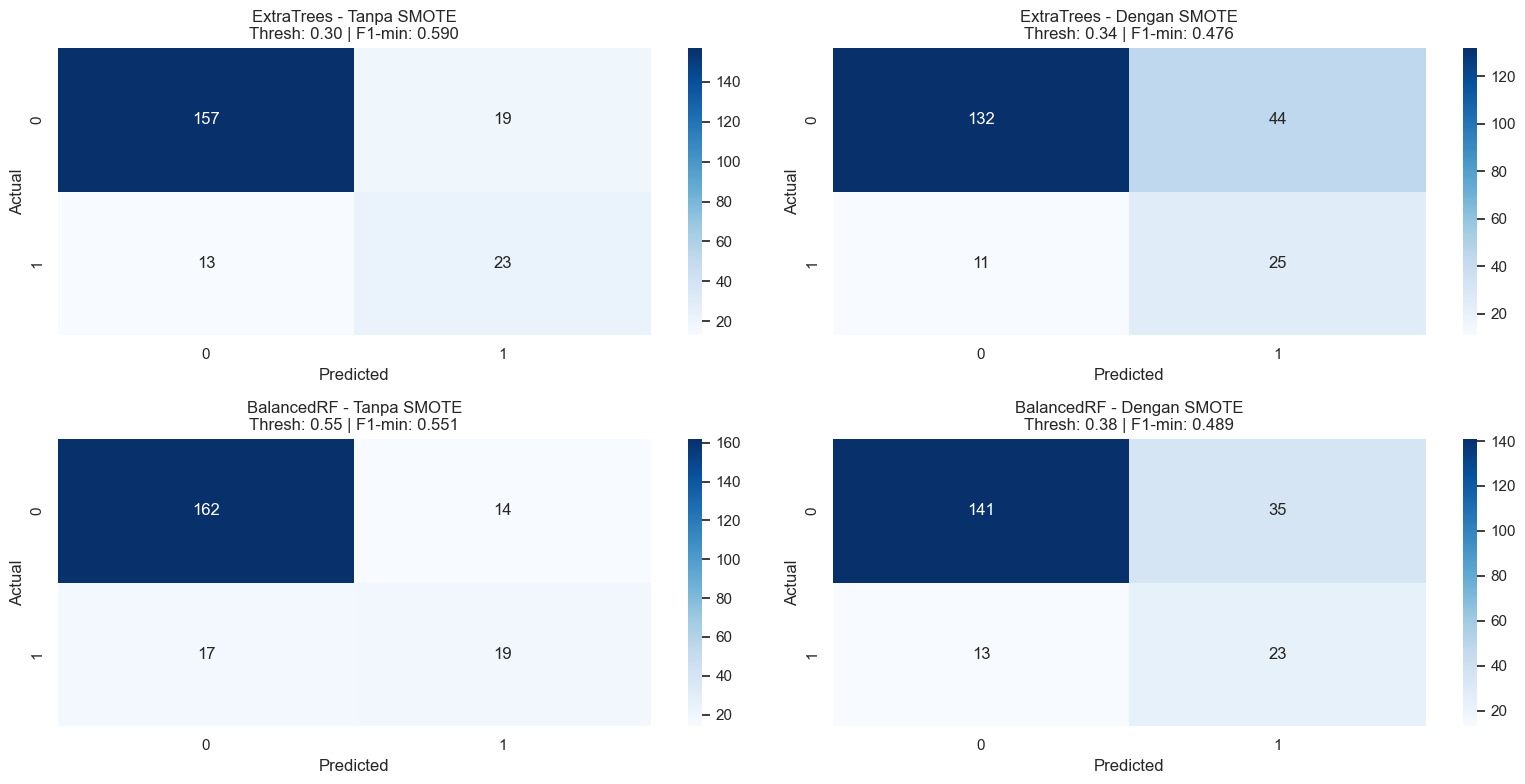


🏆 Model Terbaik:
ExtraTrees - Tanpa SMOTE dengan F1 Kelas Minoritas: 0.590


In [830]:
# Cari threshold optimal berdasarkan F1 minoritas
def find_best_threshold(y_true, y_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx], f1_scores[best_idx]

# Evaluasi model (classification report, confusion matrix, visualisasi)
def evaluate_models(results_dict):
    results = {}
    best_model_name = None
    best_f1 = -1
    best_model_pipeline = None
    for key, val in results_dict.items():
        y_test = val['y_test']
        y_proba = val['y_proba']

        best_thresh, best_f1_score = find_best_threshold(y_test, y_proba)
        y_pred = (y_proba >= best_thresh).astype(int)
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, digits=3)

        results[key] = {
            'threshold': best_thresh,
            'f1_min': best_f1_score,
            'cm': cm,
            'report': report,
            'pipeline': val['pipeline']  # Simpan pipeline-nya
        }

        if best_f1_score > best_f1:
            best_f1 = best_f1_score
            best_model_name = key
            best_model_pipeline = val['pipeline']

        # Perbaikan di sini: Cetak best_f1_score, bukan best_f1
        print(f"\nModel: {key}")
        print(f"Optimal Threshold: {best_thresh:.2f}")
        print(f"F1-score Kelas Minoritas: {best_f1_score:.3f}")
        print(report)

    # Visualisasi
    plt.figure(figsize=(16, 8))
    for i, (key, val) in enumerate(results.items()):
        plt.subplot(2, 2, i+1)
        sns.heatmap(val['cm'], annot=True, fmt='d', cmap='Blues')
        plt.title(f"{key}\nThresh: {val['threshold']:.2f} | F1-min: {val['f1_min']:.3f}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Tampilkan best model
    print("\n==============================")
    print("🏆 Model Terbaik:")
    print(f"{best_model_name} dengan F1 Kelas Minoritas: {best_f1:.3f}")
    print("==============================")

    return results, best_model_pipeline

# Panggil fungsi
evaluasi, best_model = evaluate_models(pipelines)

Kode di atas menjelaskan dua fungsi penting untuk evaluasi model:

1. **Fungsi `find_best_threshold`**
   - Menerima nilai target aktual (`y_true`) dan probabilitas prediksi (`y_proba`)
   - Menghitung precision dan recall untuk berbagai nilai threshold menggunakan `precision_recall_curve`
   - Menghitung F1-score untuk setiap threshold dengan rumus: F1 = 2 * (precision * recall) / (precision + recall)
   - Menemukan threshold yang menghasilkan F1-score tertinggi
   - Mengembalikan threshold optimal dan nilai F1-score-nya

2. **Fungsi `evaluate_models`**
   - Mengevaluasi setiap model dalam dictionary hasil training
   - Untuk setiap model:
     - Mencari threshold optimal menggunakan fungsi `find_best_threshold`
     - Mengkonversi probabilitas menjadi kelas (0/1) menggunakan threshold optimal
     - Menghitung confusion matrix dan laporan klasifikasi (precision, recall, F1-score)
     - Menyimpan semua hasil evaluasi dalam dictionary
   - Mencatat model dengan F1-score tertinggi
   - Membuat visualisasi confusion matrix untuk semua model
   - Menampilkan model terbaik dengan F1-score tertinggi

Setelah mendefinisikan fungsi-fungsi tersebut, kita menjalankan evaluasi model dengan memanggil `evaluate_models(pipelines)`. Hasil evaluasi disimpan dalam variabel `evaluasi` dan model terbaik dalam variabel `best_model`.

Dari hasil evaluasi di atas, kita dapat mengamati:
1. Performa masing-masing model (ExtraTrees dan BalancedRF, dengan dan tanpa SMOTE)
2. Threshold optimal untuk setiap model
3. Nilai F1-score yang dicapai masing-masing model
4. Perbandingan confusion matrix antar model
5. Model terbaik berdasarkan F1-score kelas minoritas

Langkah selanjutnya adalah menganalisis fitur-fitur yang paling berpengaruh dalam model terbaik untuk mendapatkan insight lebih lanjut tentang faktor-faktor yang mempengaruhi attrition karyawan.

### Analisis Fitur Penting (Feature Importance)

Salah satu keuntungan dari menggunakan model berbasis pohon keputusan (decision tree) seperti ExtraTrees dan Random Forest adalah kemampuannya untuk mengukur pentingnya setiap fitur dalam proses pengambilan keputusan.

Feature importance (kepentingan fitur) mengukur seberapa besar kontribusi setiap fitur dalam meningkatkan performa model. Fitur dengan nilai importance yang lebih tinggi berarti memiliki peran yang lebih signifikan dalam memprediksi target (dalam hal ini, attrition karyawan).

Menganalisis feature importance akan memberikan insight yang sangat berharga bagi tim HR untuk memahami faktor-faktor utama yang mempengaruhi keputusan karyawan untuk resign, sehingga dapat mengembangkan strategi retensi yang lebih efektif.

Mari kita ekstrak dan visualisasikan fitur-fitur paling penting dari model terbaik:

10 Fitur Terpenting:
OverTime                   0.074327
Age                        0.040505
MaritalStatus              0.039692
TotalWorkingYears          0.037953
JobInvolvement             0.036722
EnvironmentSatisfaction    0.036590
StockOptionLevel           0.036058
MonthlyIncome              0.035690
WorkLifeBalance            0.035479
JobLevel                   0.033730
dtype: float64


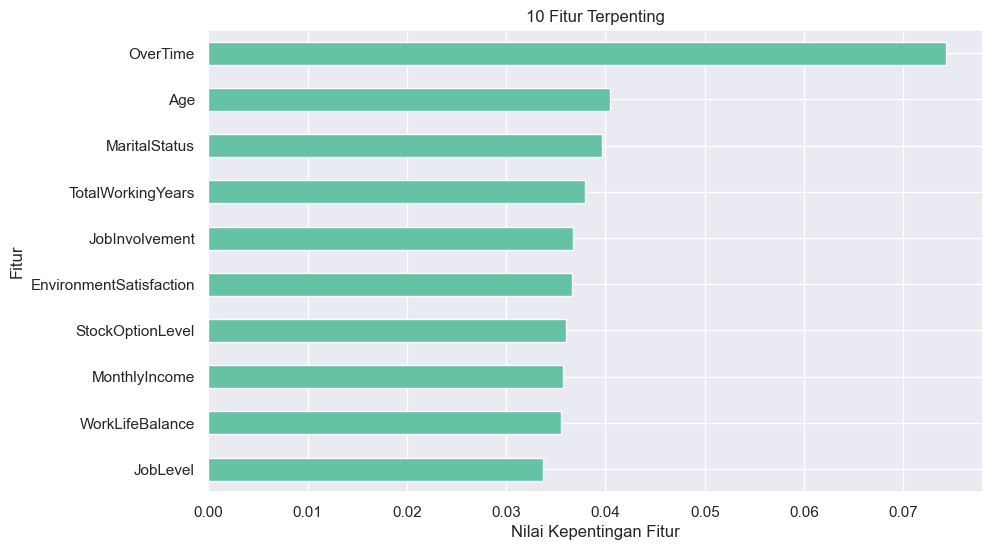

In [833]:
model = best_model.named_steps['clf']

# Mendapatkan nilai feature importances
importances = model.feature_importances_

# Membuat Series Pandas dari feature importances dan nama kolom
feat_importances = pd.Series(importances, index=X.columns)

# Mengurutkan fitur berdasarkan nilai kepentingannya (dari terbesar ke terkecil)
sorted_feat_importances = feat_importances.sort_values(ascending=False)

# Menampilkan 10 fitur teratas dalam bentuk DataFrame
print("10 Fitur Terpenting:")
print(sorted_feat_importances.head(10))

# Membuat plot bar horizontal dari 10 fitur teratas
plt.figure(figsize=(10, 6))
sorted_feat_importances.head(10).plot(kind='barh')
plt.title("10 Fitur Terpenting")
plt.xlabel("Nilai Kepentingan Fitur")
plt.ylabel("Fitur")
plt.gca().invert_yaxis() # Untuk menampilkan fitur dengan kepentingan tertinggi di atas
plt.show()

Kode di atas melakukan langkah-langkah berikut untuk menganalisis fitur penting:

1. **Ekstraksi Model Terbaik**:
   - Mengakses classifier dari pipeline model terbaik dengan `best_model.named_steps['clf']`

2. **Ekstraksi Nilai Kepentingan Fitur**:
   - Mengambil `feature_importances_` dari model, yang merupakan atribut bawaan dari model berbasis pohon keputusan
   - Nilai ini mengukur seberapa banyak setiap fitur berkontribusi dalam meningkatkan kriteria pemisahan (Gini impurity atau information gain)

3. **Pengorganisasian dan Pengurutan Hasil**:
   - Membuat Pandas Series yang mengaitkan nilai kepentingan dengan nama fitur
   - Mengurutkan fitur dari yang paling penting hingga yang kurang penting

4. **Visualisasi**:
   - Menampilkan 10 fitur teratas dalam bentuk tabel
   - Membuat plot bar horizontal untuk memvisualisasikan 10 fitur teratas

Berdasarkan hasil di atas, kita dapat mengidentifikasi faktor-faktor utama yang mempengaruhi attrition karyawan. Fitur-fitur dengan nilai kepentingan tinggi merupakan prediktor kuat untuk attrition dan layak mendapat perhatian khusus dari tim HR. Keputusan resign karyawan paling banyak dipengaruhi oleh faktor pekerjaan (lembur, keterlibatan, job level), demografis (usia, status pernikahan), total tahun bekerja, kepuasan terhadap lingkungan kerja, dan work life balance serta insentif saham yang didapat. Tim HR dapat menggunakan informasi ini untuk mengembangkan strategi retensi yang lebih terarah, misalnya dengan menyesuaikan beban kerja, kebijakan lembur, paket kompensasi, atau program pengembangan karier.

### Simpan Model dan Label Encoder

Setelah mengevaluasi model dan memilih yang terbaik, langkah terakhir adalah menyimpan model tersebut beserta label encoder yang digunakan. Penyimpanan model penting agar kita dapat menggunakan model untuk prediksi di masa depan tanpa perlu melatih ulang.

Kita akan menyimpan dua komponen utama:
1. **Model terbaik**: Untuk melakukan prediksi attrition pada data baru
2. **Label Encoder**: Untuk mengkonversi data kategorikal menjadi numerik dengan cara yang konsisten

Model dan encoder akan disimpan menggunakan format joblib, yang merupakan metode serialisasi yang efisien untuk objek Python, khususnya untuk model machine learning yang berukuran besar.

In [836]:
import os

# Tentukan path direktori yang ingin dibuat
model_directory = 'model'

# Periksa apakah direktori sudah ada
if not os.path.exists(model_directory):
    try:
        # Membuat direktori
        os.makedirs(model_directory)
        print(f"Direktori '{model_directory}' berhasil dibuat.")
    except OSError as e:
        print(f"Gagal membuat direktori '{model_directory}': {e}")
else:
    print(f"Direktori '{model_directory}' sudah ada.")

Direktori 'model' sudah ada.


Kode di atas berfungsi untuk mempersiapkan direktori penyimpanan model:

1. Mengimpor modul `os` untuk operasi sistem file
2. Mendefinisikan nama direktori tempat menyimpan model ('model')
3. Memeriksa apakah direktori tersebut sudah ada dengan `os.path.exists()`
4. Jika direktori belum ada, mencoba membuat direktori baru dengan `os.makedirs()`
5. Menampilkan pesan sesuai dengan hasil (berhasil membuat direktori baru atau direktori sudah ada)

Langkah ini memastikan bahwa kita memiliki lokasi yang tepat untuk menyimpan model tanpa menimpa direktori yang sudah ada.

In [838]:
# konversi model ke format joblib
import joblib
filename = 'model/model.joblib'
joblib.dump(model, filename)
print(f"Model berhasil disimpan ke {filename}")

Model berhasil disimpan ke model/model.joblib


Kode di atas melakukan penyimpanan model terbaik:

1. Mengimpor modul `joblib` untuk serialisasi objek Python
2. Menentukan path file untuk model ('model/model.joblib')
3. Menggunakan `joblib.dump()` untuk menyimpan objek model ke file
4. Menampilkan pesan konfirmasi setelah berhasil menyimpan model

Model yang disimpan berisi semua informasi yang diperlukan untuk melakukan prediksi, termasuk struktur pohon keputusan, parameter, dan atribut lainnya.

In [840]:
# Menyimpan dictionary le_dict menggunakan joblib
filename = 'model/label_encoders.joblib'
joblib.dump(le_dict, filename)
print(f"Dictionary LabelEncoder berhasil disimpan ke {filename}")

# Menyimpan StandardScaler
scaler_filename = 'model/scaler.joblib'
joblib.dump(scaler, scaler_filename)
print(f"StandardScaler berhasil disimpan ke {scaler_filename}")

Dictionary LabelEncoder berhasil disimpan ke model/label_encoders.joblib
StandardScaler berhasil disimpan ke model/scaler.joblib


Kode di atas menyimpan dictionary label encoder yang digunakan untuk mengkonversi data kategorikal:

1. Menentukan path file untuk label encoder ('model/label_encoders.joblib')
2. Menggunakan `joblib.dump()` untuk menyimpan dictionary `le_dict` yang berisi semua label encoder
3. Menampilkan pesan konfirmasi setelah berhasil menyimpan label encoder

Penyimpanan label encoder sangat penting karena:
- Memastikan konsistensi dalam preprocessing data baru (menggunakan encoding yang sama dengan data pelatihan)
- Memungkinkan konversi balik dari nilai numerik ke kategori asli untuk interpretasi hasil

Dengan menyimpan model dan label encoder, kita telah menyelesaikan seluruh proses pemodelan dari data preparation hingga deployment. Model yang disimpan siap digunakan untuk memprediksi attrition karyawan pada data baru, dan tim HR dapat memanfaatkan hasil prediksi untuk mengembangkan strategi retensi yang lebih efektif.

### Kesimpulan Evaluasi

Pada tahap evaluasi ini, kita telah melakukan beberapa langkah penting:

1. **Optimasi Threshold**
   - Menemukan threshold optimal untuk setiap model berdasarkan F1-score
   - Mengatasi ketidakseimbangan kelas dengan penyesuaian threshold

2. **Evaluasi Performa Model**
   - Mengevaluasi model menggunakan berbagai metrik (precision, recall, F1-score)
   - Membandingkan performa antar model dengan visualisasi confusion matrix
   - Mengidentifikasi model terbaik berdasarkan F1-score kelas minoritas

3. **Analisis Fitur Penting**
   - Mengekstrak dan mengurutkan fitur berdasarkan kepentingannya
   - Memvisualisasikan 10 fitur terpenting yang mempengaruhi attrition
   - Mendapatkan insight tentang faktor-faktor utama penyebab karyawan resign

4. **Penyimpanan Model**
   - Menyimpan model terbaik dalam format joblib
   - Menyimpan label encoder untuk konsistensi preprocessing
   - Mempersiapkan model untuk implementasi pada data baru

Hasil evaluasi menunjukkan bahwa model dapat memprediksi kemungkinan seorang karyawan akan resign dengan tingkat akurasi yang cukup baik. Dengan memanfaatkan model ini dan insight dari fitur-fitur penting, tim HR dapat:

- Mengidentifikasi karyawan yang berisiko tinggi untuk resign
- Mengembangkan strategi retensi yang lebih terarah dan efektif
- Mengurangi tingkat attrition dan biaya rekrutmen
- Meningkatkan stabilitas dan produktivitas organisasi

Model prediksi attrition ini merupakan alat yang berharga bagi perusahaan dalam mengelola sumber daya manusia secara lebih proaktif dan strategis.

In [895]:
!pip freeze | findstr /V "file:///" > requirements.txt